<a href="https://colab.research.google.com/github/issamyax/TimberTracer/blob/main/TimberTracer_mixedlandfill_thresubstitution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""import numpy as np
from scipy.stats import weibull_min

# Known parameters of the Weibull distribution
location = 20
scale = 20.33
shape = 5.65

# Total population size
total_population = 850

# Class width
class_width = 2

# Initialize the lower bound of the first class as lambda
lower_bound = location

# Initialize the class number
class_number = 1

# Initialize an empty dictionary to store class information
class_info = {}

while True:
    # Calculate the upper bound of the current class
    upper_bound = lower_bound + class_width

    # Calculate the class center
    class_center = round((lower_bound + upper_bound) / 2,1)

    # Calculate the probability that an individual falls within the current class
    prob_class = weibull_min.cdf(upper_bound, c=shape, loc=location, scale=scale) - weibull_min.cdf(lower_bound, c=shape, loc=location, scale=scale)

    # Calculate the number of individuals in the current class, ensuring it's at least 1
    individuals_in_class = max(1, round(prob_class * total_population))

    # Check if the number of individuals is 5 or more
    if individuals_in_class >= 5:
        # Store class information in the dictionary
        class_info[class_number] = {
            "Center": class_center,
            "Individuals": individuals_in_class
        }

    # Move to the next class
    class_number += 1
    lower_bound = upper_bound

    # Exit the loop if the upper bound goes beyond a practical limit
    if upper_bound > 1000:  # Adjust this limit based on your application
        break

# Print the results as a dictionary with rounded values
print(class_info)"""


'import numpy as np\nfrom scipy.stats import weibull_min\n\n# Known parameters of the Weibull distribution\nlocation = 20\nscale = 20.33\nshape = 5.65\n\n# Total population size\ntotal_population = 850\n\n# Class width\nclass_width = 2\n\n# Initialize the lower bound of the first class as lambda\nlower_bound = location\n\n# Initialize the class number\nclass_number = 1\n\n# Initialize an empty dictionary to store class information\nclass_info = {}\n\nwhile True:\n    # Calculate the upper bound of the current class\n    upper_bound = lower_bound + class_width\n\n    # Calculate the class center\n    class_center = round((lower_bound + upper_bound) / 2,1)\n\n    # Calculate the probability that an individual falls within the current class\n    prob_class = weibull_min.cdf(upper_bound, c=shape, loc=location, scale=scale) - weibull_min.cdf(lower_bound, c=shape, loc=location, scale=scale)\n\n    # Calculate the number of individuals in the current class, ensuring it\'s at least 1\n    indi

In [ ]:
"""import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min

# Known parameters of the Weibull distribution
location = 20
scale = 20.33
shape = 5.65

# Total population size
total_population = 850

# Class information based on the provided results
class_info = {
    1: {"Center": 29, "Individuals": 11},
    2: {"Center": 31, "Individuals": 27},
    3: {"Center": 33, "Individuals": 55},
    4: {"Center": 35, "Individuals": 96},
    5: {"Center": 37, "Individuals": 142},
    6: {"Center": 39, "Individuals": 173},
    7: {"Center": 41, "Individuals": 163},
    8: {"Center": 43, "Individuals": 112},
    9: {"Center": 45, "Individuals": 51},
    10: {"Center": 47, "Individuals": 13}
}

# Create lists to store class boundaries and their frequencies
class_boundaries = []
class_frequencies = []

for class_num, info in class_info.items():
    # Store the class center in the list for plotting
    class_boundaries.append(info["Center"])

    # Store the frequency (number of individuals) in the class
    class_frequencies.append(info["Individuals"])

# Plot the Weibull distribution
x = np.linspace(location, 57.5, 1000)  # Adjust the range as needed
y_weibull = weibull_min.pdf(x, c=shape, loc=location, scale=scale) * total_population

# Plot the class boundaries and their frequencies
plt.bar(class_boundaries, class_frequencies, width=2, align='center', color='lightblue', edgecolor='black', linewidth=1, label="Class Frequencies")

# Set labels and legend with improved styling
plt.xlabel("DBH")
plt.ylabel("PDF / Class Frequencies")
plt.title("Weibull Distribution with Class Boundaries and Frequencies")

legend_label = f"\n\nWeibull Distribution\n\nLocation: {location}, Scale: {scale}, Shape: {shape}"
# Specify labels for each data series in the legend
plt.legend(
    handles=[plt.Rectangle((0, 0), 1, 1, fc="lightblue", ec="black"), plt.Line2D([0], [0], color="red")],
    labels=["Class Frequencies", legend_label],
    bbox_to_anchor=(1, 1))


# Show the plot
plt.plot(x, y_weibull, label="Weibull Distribution", color = 'red')
plt.savefig("weibull_distribution.png", bbox_inches="tight")
plt.show()"""


'import numpy as np\nimport matplotlib.pyplot as plt\nfrom scipy.stats import weibull_min\n\n# Known parameters of the Weibull distribution\nlocation = 20\nscale = 20.33\nshape = 5.65\n\n# Total population size\ntotal_population = 850\n\n# Class information based on the provided results\nclass_info = {\n    1: {"Center": 29, "Individuals": 11},\n    2: {"Center": 31, "Individuals": 27},\n    3: {"Center": 33, "Individuals": 55},\n    4: {"Center": 35, "Individuals": 96},\n    5: {"Center": 37, "Individuals": 142},\n    6: {"Center": 39, "Individuals": 173},\n    7: {"Center": 41, "Individuals": 163},\n    8: {"Center": 43, "Individuals": 112},\n    9: {"Center": 45, "Individuals": 51},\n    10: {"Center": 47, "Individuals": 13}\n}\n\n# Create lists to store class boundaries and their frequencies\nclass_boundaries = []\nclass_frequencies = []\n\nfor class_num, info in class_info.items():\n    # Store the class center in the list for plotting\n    class_boundaries.append(info["Center"])\

## Import librairies

In [ ]:
import numpy as np
from scipy.stats import weibull_min
import pandas as pd
import numpy as np
import pandas as pd
import math
import scipy.stats as stats
import matplotlib.pyplot as plt

##Dendrometer routine

In [ ]:
def dendrometer(scale, shape, total_population, class_width, DBH):

    # Compute location
    location =  DBH - scale * math.gamma(1 + (1 / shape))

    # Initialize the lower bound of the first class as lambda
    lower_bound = location

    # Initialize the class number
    class_number = 1

    # Initialize an empty list to store height_center values
    height_centers = []

    # Initialize an empty dictionary to store class information
    class_info = {}

    while True:
        # Calculate the upper bound of the current class
        upper_bound = lower_bound + class_width

        # Calculate the class center
        class_center = round((lower_bound + upper_bound) / 2, 1)

        # Calculate the probability that an individual falls within the current class
        prob_class = weibull_min.cdf(upper_bound, c=shape, loc=location, scale=scale) - weibull_min.cdf(lower_bound, c=shape, loc=location, scale=scale)

        # Calculate the number of individuals in the current class, ensuring it's at least 1
        individuals_in_class = max(1, round(prob_class * total_population))

        # Check if the number of individuals is 5 or more
        if individuals_in_class >= 5:
            # Apply a quadratic polynomial function to the class center and round it to 2 decimal places
            height_center = round(1.052 + 0.5510 * class_center - 0.002570 * (class_center ** 2), 2)  # Specification of the diameter to height function

            # Append height_center to the list for quartile calculation
            height_centers.append(height_center)

            # Apply another polynomial function to the quadratic result and round it to 2 decimal places
            cbh_center = round(0.8 * (height_center ** 1), 2)  # Specification of the height to CBH function
            basal_area = round(np.pi/4*(class_center**2)*0.0001,3)
            class_info[class_number] = {
                "Diameter_Center": class_center,
                "Individuals": individuals_in_class,
                "Height_Center": height_center,
                "CBH": cbh_center,  # Add the result of the second polynomial
                "BA": basal_area
            }

        # Move to the next class
        class_number += 1
        lower_bound = upper_bound

        # Exit the loop if the upper bound goes beyond a practical limit
        if upper_bound > 1000:  # Adjust this limit based on your application
            break

    # Calculate the 95th height center quartile
    quartile_95 = np.percentile(height_centers, 95)

    # Calculate the mean(CBH)
    mean_cbh = np.mean([class_info[key]["CBH"] for key in class_info])

    # Update the "SC" key based on the specified conditions
    for key, value in class_info.items():
        if value["Height_Center"] > quartile_95:
            value["SC"] = 1
        elif value["Height_Center"] > (0.5 * (mean_cbh + quartile_95)) and value["Height_Center"] <= quartile_95:
            value["SC"] = 2
        elif value["Height_Center"] > mean_cbh and value["Height_Center"] <= (0.5 * (mean_cbh + quartile_95)):
            value["SC"] = 3
        elif value["Height_Center"] < mean_cbh:
            value["SC"] = 4

    # Print the results as a dictionary with rounded values and the "SC" key
    print(class_info)

    df = pd.DataFrame.from_dict(class_info, orient = 'index')
    df.reset_index(drop= True, inplace=True)

    expanded_rows = []

    for idx, row in df.iterrows():
        for _ in range(int(row['Individuals'])):
            expanded_rows.append([None, row['Diameter_Center'], row['Height_Center'], row['CBH'], row['SC'],row['BA']])

    expanded_df = pd.DataFrame(expanded_rows, columns=['ID', 'Diameter_Center', 'Height_Center', 'CBH', 'SC','BA'])

    # Assign simple numeric IDs starting from 1
    expanded_df['ID'] = range(1, len(expanded_df) + 1)

    return expanded_df

##Thinning routine

In [ ]:
def perform_thinning(trees_df, thinning_type, target_sum, tolerance):

    df_copy = trees_df.copy()

    # Define your target sum and tolerance (positive and negative; meaning more or less)
    #target_sum = 8.68
    #tolerance = 0.3

    # Initialize an empty list to store selected tree IDs
    selected_tree_ids = []

    # Initialize variables to keep track of the current sum and number of iterations
    current_sum = 0
    iterations = 0


    if thinning_type == 'above':

        # Loop until the current sum falls within the tolerance range or exceed a maximum number of iterations
        while not (target_sum - tolerance <= current_sum <= target_sum + tolerance) and iterations < 1200:
            # Create masks to filter trees from classes 1, 2, and 3 on each iteration
            class_1_mask = df_copy['SC'] == 1
            class_2_mask = df_copy['SC'] == 2
            class_3_mask = df_copy['SC'] == 3

            # Randomly select a tree from classes 1 and 2 and add their "g" value to the current sum
            if current_sum < (target_sum - tolerance) and (class_1_mask.sum() + class_2_mask.sum()) > 0:
                class_1_or_2 = df_copy[class_1_mask | class_2_mask].sample(n=1)
                current_sum += class_1_or_2['BA'].values[0]  # Sum the "BA" value
                selected_tree_ids.append(class_1_or_2['ID'].values[0])
                df_copy = df_copy.drop(class_1_or_2.index)  # Remove the selected row from the DataFrame

            # If target sum is not reached yet, randomly select a tree from class 3 and add their "g" value to the current sum
            elif current_sum < (target_sum - tolerance) and class_3_mask.sum() > 0:
                class_3 = df_copy[class_3_mask].sample(n=1)
                current_sum += class_3['BA'].values[0]  # Sum the "BA" value
                selected_tree_ids.append(class_3['ID'].values[0])
                df_copy = df_copy.drop(class_3.index)  # Remove the selected row from the DataFrame

            # Increment the number of iterations
            iterations += 1

    elif thinning_type == 'bottom':
        # Loop until the current sum falls within the tolerance range or exceed a maximum number of iterations
        while not (target_sum - tolerance <= current_sum <= target_sum + tolerance) and iterations < 1200:
            # Create masks to filter trees from classes 1, 2, and 3 on each iteration
            class_4_mask = df_copy['SC'] == 4
            class_3_mask = df_copy['SC'] == 3
            class_2_mask = df_copy['SC'] == 2

            # Randomly select a tree from classes 4 and 3 and add their "g" value to the current sum
            if current_sum < (target_sum - tolerance) and (class_4_mask.sum() + class_3_mask.sum()) > 0:
                class_4_or_3 = df_copy[class_4_mask | class_3_mask].sample(n=1)
                current_sum += class_4_or_3['BA'].values[0]  # Sum the "g" value
                selected_tree_ids.append(class_4_or_3['ID'].values[0])
                df_copy = df_copy.drop(class_4_or_3.index)  # Remove the selected row from the DataFrame

            # If target sum is not reached yet, randomly select a tree from class 2 and add their "g" value to the current sum
            elif current_sum < (target_sum - tolerance) and class_2_mask.sum() > 0:
                class_2 = df_copy[class_2_mask].sample(n=1)
                current_sum += class_2['BA'].values[0]  # Sum the "g" value
                selected_tree_ids.append(class_2['ID'].values[0])
                df_copy = df_copy.drop(class_2.index)  # Remove the selected row from the DataFrame

            # Increment the number of iterations
            iterations += 1

    elif thinning_type == 'neutral':
        # Loop until the current sum falls within the tolerance range or exceed a maximum number of iterations
        while not (target_sum - tolerance <= current_sum <= target_sum + tolerance) and iterations < 1000:
        # Randomly select a tree from the entire DataFrame and add their "g" value to the current sum
            if df_copy.shape[0] > 0:
                selected_tree = df_copy.sample(n=1)
                current_sum += selected_tree['BA'].values[0]  # Sum the "g" value
                selected_tree_ids.append(selected_tree['ID'].values[0])
                df_copy = df_copy.drop(selected_tree.index)  # Remove the selected row from the DataFrame

            # Increment the number of iterations
            iterations += 1

    return selected_tree_ids

##Bucking allocation routine

In [ ]:
def taper_equation(z, a1, a2, b1, b2, b3, b4):
    """
    This is the implementation of Max and Burkhart Equation
    z = 1 - hx/ht & dr2 = (dx/DBH)**2
    dx = sqrt(dr2)*DBH
    """
    dr2 = b1 * z + b2 * z ** 2 + b3 * (z > a1) * (z - a1) ** 2 + b4 * (z > a2) * (z - a2) ** 2
    return dr2

def knotted_wood_profile2(z, ht, a1, a2, b1, b2, b3, b4, a, c, alpha, beta):
    """
    This function dress the crown base profile of a tree making it possible to split profile into knotted and intact wood
    This function call 3 other functions : i-taper equation ii-crown base height iii-relation between dbh and ht
    This function will be used for the computation of knotted wood diameter
    Make sure in the plotting that zmin >= a and hc <= a*ht**c
    If zmin <a return taper diameter instead
    """
    # z = 1- hc/ht
    hc = (1-z)*ht
    zc = 1 - a*(hc**(c-1))
    dc = np.sqrt(taper_equation(zc, a1, a2, b1, b2, b3, b4))*alpha*((hc/a)**(1/c))**(beta)
    dx = np.sqrt(taper_equation(z, a1, a2, b1, b2, b3, b4))*alpha*(ht)**(beta)
    condition = 1 - a * (ht ** (c - 1))
    condition_check = z > condition
    return np.where(condition_check, dc, dx)

def sapwood_heartwood(dbh, DBH, sap_area, heart_area):
    """
    This function compute the sapwood width of a tree by leveraging the sapwood and heartwood areas provided by the growth model
    dbh is not the mean of the stand but the individual.
    DBH is the mean diameter
    """
    sap_width = math.sqrt(4/math.pi*(sap_area+heart_area)) - math.sqrt(4/math.pi*heart_area)
    sap_width = sap_width*dbh/DBH
    return sap_width

def sapwood_profile(z, a1, a2, b1, b2, b3, b4, bark, sap_area, heart_area, ht, dbh, DBH):
    """
    Although this function is titled sapwood, it computes the heartwood profile
    This is done by retrieving bark and sapwdidth which are considered fix along the stem
    """
    e = bark + sapwood_heartwood(dbh, DBH, sap_area, heart_area)
    dr2 = b1 * z + b2 * z ** 2 + b3 * (z > a1) * (z - a1) ** 2 + b4 * (z > a2) * (z - a2) ** 2
    dx = np.sqrt(dr2)*dbh
    dx = dx - e
    if dx > 0:
        return dx
    else:
        return 0

def knotted_to_sap(z, a1, a2, b1, b2, b3, b4, bark, ht, a, c, alpha, beta, dbh, DBH, sap_area, heart_area):
    """
    This function computes the ratio of knotted wood to heart wood along the stem
    """
    diameter_sap = sapwood_profile(z,a1,a2,b1,b2,b3,b4,bark,sap_area,heart_area, ht, dbh, DBH)
    diameter_knotted = knotted_wood_profile2(z,ht,a1,a2,b1,b2,b3,b4,a,c,alpha,beta)
    ratio = (diameter_knotted/diameter_sap)**2
    return ratio

def knotted_to_taper(z, ht, a1, a2, b1, b2, b3, b4, a, c, alpha, beta, dbh):
    """
    This function computes the ratio of knotted wood to stem along the stem
    """
    diameter_taper = np.sqrt(taper_equation(z, a1, a2, b1, b2, b3, b4))*dbh
    diameter_knotted = knotted_wood_profile2(z, ht, a1, a2, b1, b2, b3, b4, a, c, alpha, beta)
    ratio = diameter_knotted / diameter_taper
    return ratio

def find_h_above_threshold(threshold, a1, a2, b1, b2, b3, b4, tolerance):
    """
    This function is the implementation of the bisection method (Dichotomie in French)
    This function makes it possible to compute the value of x for a given f(x)
    In our case we compute the height level which satisfy diameter condition
    """
    lower_bound = 0
    upper_bound = 1

    max_iterations = 100
    iterations = 0

    while iterations < max_iterations:
        x = (lower_bound + upper_bound) /2
        y = taper_equation(x, a1, a2, b1, b2, b3, b4)

        if y > threshold:
            upper_bound = x
        else:
            lower_bound = x

        if abs(y - threshold) < tolerance:
            return x

        iterations +=1

        print(iterations)

    return None

def find_h_above_knotted_to_hw(threshold, a1, a2, b1, b2, b3, b4, bark, ht, a, c, alpha, beta, dbh, DBH, sap_area, heart_area, tolerance):
    """
    This function is the implementation of the bisection method (Dichotomie in French)
    This makes it possible to compute the value of x for a given f(x)
    In this case we compute the height level which satisfy the ratio knotted wood to heartwood
    """
    lower_bound = 0
    upper_bound = 1

    max_iterations = 100
    iterations = 0

    while iterations < max_iterations:
        x = (lower_bound + upper_bound) / 2
        y = knotted_to_sap(x,a1, a2, b1, b2, b3, b4, bark, ht, a, c, alpha, beta, dbh, DBH, sap_area, heart_area)

        if y > threshold:
            lower_bound = x
        else:
            upper_bound = x

        if abs(y - threshold) < tolerance:
            return x

        iterations += 1

        print(iterations)

    return None

def find_h_above_knotted_to_diam(threshold, ht, a1, a2, b1, b2, b3, b4, a, c, alpha, beta, dbh, tolerance):
    """
    This function is the implementation of the bisection method (Dichotomie in French)
    This makes it possible to compute the value of x for a given f(x)
    In this case we compute the height level which satisfy the ratio knotted wood to taper
    """
    lower_bound = 0
    upper_bound = 1

    max_iterations = 100
    iterations = 0

    while iterations < max_iterations:
        x = (lower_bound + upper_bound) / 2
        y = knotted_to_taper(x,ht, a1, a2, b1, b2, b3, b4, a, c, alpha, beta, dbh)

        if y > threshold:
            lower_bound = x
        else:
            upper_bound = x

        if abs(y - threshold) < tolerance:
            return x

        iterations += 1

        print(iterations)

    return None

def volume_calculator(start_height, end_height, dbh, ht, a1, a2, b1, b2, b3, b4):
    """
    This function compute the volume within the stem between two defined heights
    start_height stands for lower height and end_height stands for the upper height
    """
    k = math.pi/40000
    zy = 1 - start_height/ht
    zx = 1 - end_height/ht
    volume = k * (dbh**2) * ht * (b1/2 * (zy**2 - zx**2) +
             b2/2 * (zy**3 - zx**3) + b3/3 * ((zy - a1)**3 * (zy > a1) -
             (zx - a1)**3 * (zx > a1))  + b4/3 * ((zy - a2)**3 * (zy > a2) -
             (zx - a2)**3 * (zx > a2)))

    return volume



def bucking_allocation(dbh, ht, a1, a2, b1, b2, b3, b4, bark, a, c, alpha, beta, DBH, sap_area, heart_area, tolerance):

  # here is a definition of tresholds
  threshold7 = (7/dbh)**2
  threshold25 = (25/dbh)**2
  threshold_kw_hw = 0.13
  threshold_kw_diam = 0.3

  # here is a computation of the heights corresponding to those thresholds
  h7 = (1-find_h_above_threshold(threshold7, a1, a2, b1, b2, b3, b4, tolerance))*ht
  h25_calculations = find_h_above_threshold(threshold25, a1, a2, b1, b2, b3, b4, tolerance)
  #h25 = (1-find_h_above_threshold(threshold25, a1, a2, b1, b2, b3, b4, tolerance))*ht
  h25 = None if h25_calculations is None else (1 - h25_calculations)*ht
  h_kw_hw = (1-find_h_above_knotted_to_hw(threshold_kw_hw, a1, a2, b1, b2, b3, b4, bark, ht, a, c, alpha, beta, dbh, DBH, sap_area, heart_area, tolerance))*ht
  h_kw_diam = (1-find_h_above_knotted_to_diam(threshold_kw_diam, ht, a1, a2, b1, b2, b3, b4, a, c, alpha, beta, dbh, tolerance))*ht

  # First product : Stump
  stump = {'product': "Stump", "number": 1, "length": 0.3, "option1": 0.3, "option2": "", "start_height": 0,
             "end_height": 0.3}

  if h25 is None:
    h1 = 0
    h2 = 0
    h3 = 0
    furniture = {'product': "furniture", 'number': 0, "length": 0, 'option1': 0,
                    'option2': 0, "start_height": 0.3, "end_height": 0}
    lumber = {"product": "lumber", 'number': 0, "length": 0, 'option1': 0,
                'option2': 0, "start_height": 0, "end_height": 0}
    sawing = {"product": "sawing", 'number': 0, "length": 0, 'option1': 0,
                'option2': 0, 'start_height': 0, "end_height": 0}

  else:
      # Second product : Furniture
      d1 = min(h25,h_kw_hw) - 0.3
      quot1, remain1 = divmod(d1,5)
      if remain1 >= 3:
          h1 = quot1*5 + remain1
      else:
          h1 = quot1*5
      furniture = {'product': "furniture", 'number': quot1 + (remain1 >= 3)*1, "length": h1, 'option1': 5,
                    'option2': (remain1 >= 3)*remain1, "start_height": 0.3, "end_height": 0.3 + h1}

      # Third product : Lumber
      d2 = min(h25, h_kw_diam) - (0.3 + h1)
      quot2, remain2 = divmod(d2, 6)
      if remain2 >= 3:
          h2 = quot2*6 + remain2
      else:
          h2 = quot2*6
      lumber = {"product": "lumber", 'number': quot2 + (remain2 >= 3)*1, "length": h2, 'option1': 6,
                'option2': (remain2 >= 3)*remain2, "start_height": 0.3 + h1, "end_height": 0.3 + h1 + h2}

      # Fourth product : Sawing
      d3 = h25 - (0.3 + h1 + h2)
      quot3, remain3 = divmod(d3, 5)
      if remain3 >= 3:
          h3 = quot3*5 + remain3
      else:
          h3 = quot3*5
      sawing = {"product": "sawing", 'number': quot3 + (remain3 >= 3)*1, "length": h3, 'option1': 5,
                'option2': (remain3 >= 3)*remain3, 'start_height': 0.3 + h1 + h2, "end_height": 0.3 + h1 + h2 + h3}


  # Fifth product : Particle boards
  d4 = h7 - (0.3 + h1 + h2 + h3)
  quot4, remain4 = divmod(d4, 2.2)
  if quot4 >= 3:
      h4 = 3*2.2
  elif remain4 >= 2:
      h4 = quot4*2.2 + remain4
  else:
      h4 = quot4*2.2
  particle = {"product": "particle", 'number': quot4 + (quot4 < 3)*(remain4 >= 2)*1, "length": h4, 'option1': 2.2,
              'option2': (quot4 < 3)*(remain4 >= 2)*remain4, 'start_height': 0.3 + h1 + h2 + h3,
              "end_height": 0.3 + h1 + h2 + h3 + h4}

  # Sixth product : Paper pulp
  d5 = h7 - (0.3 + h1 + h2 + h3 + h4)
  quot5, remain5 = divmod(d5, 4.8)
  if remain5 >= 2.4:
      h5 = quot5*4.8 + remain5
  else:
      h5 = quot5*4.8
  paper = {"product": "paper", 'number': quot5 + (remain5 >= 2.4)*1, "length": h5, 'option1': 4.8,
            'option2': (remain5 >= 2.4)*remain5, 'start_height': 0.3 + h1 + h2 + h3 + h4,
            "end_height": 0.3 + h1 + h2 + h3 + h4 + h5}

  # Seventh product : Firewood
  d6 = h7 - (0.3 + h1 + h2 + h3 + h4 + h5)
  quot6, remain6 = divmod(d6, 1)
  if remain6 >= 0.5:
      h6 = quot6 * 1 + remain6
  else:
      h6 = quot6 * 1
  fire = {"product": "fire", 'number': quot6 + (remain6 >= 0.5) * 1, "length": h6, 'option1': 1,
          'option2': (remain6 >= 0.5) * remain6, 'start_height': 0.3 + h1 + h2 + h3 + h4 + h5,
          "end_height": 0.3 + h1 + h2 + h3 + h4 + h5 + h6}

  # Eight product: Toplog
  toplog = {"product": "toplog", 'number' : 1, 'length': ht - (0.3 + h1 + h2 + h3 + h4 + h5 + h6), "option1": "",
            "option2": "", 'start_height': 0.3 + h1 + h2 + h3 + h4 + h5 + h6,
            "end_height": ht}

  dico = [stump, furniture, lumber, sawing, particle, paper, fire, toplog]
  df = pd.DataFrame.from_dict(dico)
  df = df[df['number'] > 0]
  df['volume'] = df.apply(lambda row: volume_calculator(row['start_height'], row['end_height'],dbh, ht, a1, a2, b1, b2, b3, b4), axis = 1)

  return df


In [ ]:
def bucking_allocation1(dbh, ht, a1, a2, b1, b2, b3, b4, bark, a, c, alpha, beta, DBH, sap_area, heart_area, tolerance):

  # here is a definition of tresholds
  threshold7 = (7/dbh)**2
  threshold25 = (25/dbh)**2
  threshold_kw_hw = 0.13
  threshold_kw_diam = 0.3

  # here is a computation of the heights corresponding to those thresholds
  h7 = (1-find_h_above_threshold(threshold7, a1, a2, b1, b2, b3, b4, tolerance))*ht
  h25 = (1-find_h_above_threshold(threshold25, a1, a2, b1, b2, b3, b4, tolerance))*ht
  h_kw_hw = (1-find_h_above_knotted_to_hw(threshold_kw_hw, a1, a2, b1, b2, b3, b4, bark, ht, a, c, alpha, beta, dbh, DBH, sap_area, heart_area, tolerance))*ht
  h_kw_diam = (1-find_h_above_knotted_to_diam(threshold_kw_diam, ht, a1, a2, b1, b2, b3, b4, a, c, alpha, beta, dbh, tolerance))*ht

  # First product : Stump
  stump = {'product': "Stump", "number": 1, "length": 0.3, "option1": 0.3, "option2": "", "start_height": 0,
             "end_height": 0.3}


  # Second product : Furniture
  d1 = min(h25,h_kw_hw) - 0.3
  quot1, remain1 = divmod(d1,5)
  if remain1 >= 3:
      h1 = quot1*5 + remain1
  else:
      h1 = quot1*5
  furniture = {'product': "furniture", 'number': quot1 + (remain1 >= 3)*1, "length": h1, 'option1': 5,
                'option2': (remain1 >= 3)*remain1, "start_height": 0.3, "end_height": 0.3 + h1}

  # Third product : Lumber
  d2 = min(h25, h_kw_diam) - (0.3 + h1)
  quot2, remain2 = divmod(d2, 6)
  if remain2 >= 3:
      h2 = quot2*6 + remain2
  else:
      h2 = quot2*6
  lumber = {"product": "lumber", 'number': quot2 + (remain2 >= 3)*1, "length": h2, 'option1': 6,
            'option2': (remain2 >= 3)*remain2, "start_height": 0.3 + h1, "end_height": 0.3 + h1 + h2}

  # Fourth product : Sawing
  d3 = h25 - (0.3 + h1 + h2)
  quot3, remain3 = divmod(d3, 5)
  if remain3 >= 3:
      h3 = quot3*5 + remain3
  else:
      h3 = quot3*5
  sawing = {"product": "sawing", 'number': quot3 + (remain3 >= 3)*1, "length": h3, 'option1': 5,
            'option2': (remain3 >= 3)*remain3, 'start_height': 0.3 + h1 + h2, "end_height": 0.3 + h1 + h2 + h3}

  # Fifth product : Particle boards
  d4 = h7 - (0.3 + h1 + h2 + h3)
  quot4, remain4 = divmod(d4, 2.2)
  if quot4 >= 3:
      h4 = 3*2.2
  elif remain4 >= 2:
      h4 = quot4*2.2 + remain4
  else:
      h4 = quot4*2.2
  particle = {"product": "particle", 'number': quot4 + (quot4 < 3)*(remain4 >= 2)*1, "length": h4, 'option1': 2.2,
              'option2': (quot4 < 3)*(remain4 >= 2)*remain4, 'start_height': 0.3 + h1 + h2 + h3,
              "end_height": 0.3 + h1 + h2 + h3 + h4}

  # Sixth product : Paper pulp
  d5 = h7 - (0.3 + h1 + h2 + h3 + h4)
  quot5, remain5 = divmod(d5, 4.8)
  if remain5 >= 2.4:
      h5 = quot5*4.8 + remain3
  else:
      h5 = quot5*4.8
  paper = {"product": "paper", 'number': quot5 + (remain5 >= 2.4)*1, "length": h5, 'option1': 4.8,
            'option2': (remain5 >= 2.4)*remain5, 'start_height': 0.3 + h1 + h2 + h3 + h4,
            "end_height": 0.3 + h1 + h2 + h3 + h4 + h5}

  # Seventh product : Firewood
  d6 = h7 - (0.3 + h1 + h2 + h3 + h4 + h5)
  quot6, remain6 = divmod(d6, 1)
  if remain6 >= 0.5:
      h6 = quot6 * 1 + remain6
  else:
      h6 = quot6 * 1
  fire = {"product": "fire", 'number': quot6 + (remain6 >= 0.5) * 1, "length": h6, 'option1': 1,
          'option2': (remain6 >= 0.5) * remain6, 'start_height': 0.3 + h1 + h2 + h3 + h4 + h5,
          "end_height": 0.3 + h1 + h2 + h3 + h4 + h5 + h6}

  # Eight product: Toplog
  toplog = {"product": "toplog", 'number' : 1, 'length': ht - (0.3 + h1 + h2 + h3 + h4 + h5 + h6), "option1": "",
            "option2": "", 'start_height': 0.3 + h1 + h2 + h3 + h4 + h5 + h6,
            "end_height": ht}

  dico = [stump, furniture, lumber, sawing, particle, paper, fire, toplog]
  df = pd.DataFrame.from_dict(dico)
  df = df[df['number'] > 0]
  df['volume'] = df.apply(lambda row: volume_calculator(row['start_height'], row['end_height'],dbh, ht, a1, a2, b1, b2, b3, b4), axis = 1)

  return df

In [ ]:
def bucking_allocation2(dbh, ht, a1, a2, b1, b2, b3, b4, bark, a, c, alpha, beta, DBH, sap_area, heart_area, tolerance):

  # here is a definition of tresholds
  threshold7 = (7/dbh)**2
  threshold25 = (25/dbh)**2
  threshold_kw_hw = 0.13
  threshold_kw_diam = 0.3

  # here is a computation of the heights corresponding to those thresholds
  h7 = (1-find_h_above_threshold(threshold7, a1, a2, b1, b2, b3, b4, tolerance))*ht
  h25_calculations = find_h_above_threshold(threshold25, a1, a2, b1, b2, b3, b4, tolerance)
  #h25 = (1-find_h_above_threshold(threshold25, a1, a2, b1, b2, b3, b4, tolerance))*ht
  h25 = None if h25_calculations is None else (1 - h25_calculations)*ht
  h_kw_hw = (1-find_h_above_knotted_to_hw(threshold_kw_hw, a1, a2, b1, b2, b3, b4, bark, ht, a, c, alpha, beta, dbh, DBH, sap_area, heart_area, tolerance))*ht
  h_kw_diam = (1-find_h_above_knotted_to_diam(threshold_kw_diam, ht, a1, a2, b1, b2, b3, b4, a, c, alpha, beta, dbh, tolerance))*ht

  # First product : Stump
  stump = {'product': "Stump", "number": 1, "length": 0.3, "option1": 0.3, "option2": "", "start_height": 0,
             "end_height": 0.3}

  if h25 is None:
    h1 = 0
    h2 = 0
    h3 = 0
    furniture = {'product': "furniture", 'number': 0, "length": 0, 'option1': 0,
                    'option2': 0, "start_height": 0.3, "end_height": 0}
    lumber = {"product": "lumber", 'number': 0, "length": 0, 'option1': 0,
                'option2': 0, "start_height": 0, "end_height": 0}
    sawing = {"product": "sawing", 'number': 0, "length": 0, 'option1': 0,
                'option2': 0, 'start_height': 0, "end_height": 0}


  else:
      # Second product : Furniture
      d1 = min(h25,h_kw_hw) - 0.3
      quot1, remain1 = divmod(d1,5)
      if remain1 >= 3:
          h1 = quot1*5 + remain1
      else:
          h1 = quot1*5
      furniture = {'product': "furniture", 'number': quot1 + (remain1 >= 3)*1, "length": h1, 'option1': 5,
                    'option2': (remain1 >= 3)*remain1, "start_height": 0.3, "end_height": 0.3 + h1}

      # Third product : Lumber
      d2 = min(h25, h_kw_diam) - (0.3 + h1)
      quot2, remain2 = divmod(d2, 6)
      if remain2 >= 3:
          h2 = quot2*6 + remain2
      else:
          h2 = quot2*6
      lumber = {"product": "lumber", 'number': quot2 + (remain2 >= 3)*1, "length": h2, 'option1': 6,
                'option2': (remain2 >= 3)*remain2, "start_height": 0.3 + h1, "end_height": 0.3 + h1 + h2}

      # Fourth product : Sawing
      d3 = h25 - (0.3 + h1 + h2)
      quot3, remain3 = divmod(d3, 5)
      if remain3 >= 3:
          h3 = quot3*5 + remain3
      else:
          h3 = quot3*5
      sawing = {"product": "sawing", 'number': quot3 + (remain3 >= 3)*1, "length": h3, 'option1': 5,
                'option2': (remain3 >= 3)*remain3, 'start_height': 0.3 + h1 + h2, "end_height": 0.3 + h1 + h2 + h3}


  # Fifth product : Particle boards
  d4 = h7 - (0.3 + h1 + h2 + h3)
  quot4, remain4 = divmod(d4, 2.2)
  if quot4 >= 3:
      h4 = 3*2.2
  elif remain4 >= 2:
      h4 = quot4*2.2 + remain4
  else:
      h4 = quot4*2.2
  particle = {"product": "particle", 'number': quot4 + (quot4 < 3)*(remain4 >= 2)*1, "length": h4, 'option1': 2.2,
              'option2': (quot4 < 3)*(remain4 >= 2)*remain4, 'start_height': 0.3 + h1 + h2 + h3,
              "end_height": 0.3 + h1 + h2 + h3 + h4}

  # Sixth product : Paper pulp
  d5 = h7 - (0.3 + h1 + h2 + h3 + h4)
  quot5, remain5 = divmod(d5, 4.8)
  if remain5 >= 2.4:
      h5 = quot5*4.8 + remain5
  else:
      h5 = quot5*4.8
  paper = {"product": "paper", 'number': quot5 + (remain5 >= 2.4)*1, "length": h5, 'option1': 4.8,
            'option2': (remain5 >= 2.4)*remain5, 'start_height': 0.3 + h1 + h2 + h3 + h4,
            "end_height": 0.3 + h1 + h2 + h3 + h4 + h5}

  # Seventh product : Firewood
  d6 = h7 - (0.3 + h1 + h2 + h3 + h4 + h5)
  quot6, remain6 = divmod(d6, 1)
  if remain6 >= 0.5:
      h6 = quot6 * 1 + remain6
  else:
      h6 = quot6 * 1
  fire = {"product": "fire", 'number': quot6 + (remain6 >= 0.5) * 1, "length": h6, 'option1': 1,
          'option2': (remain6 >= 0.5) * remain6, 'start_height': 0.3 + h1 + h2 + h3 + h4 + h5,
          "end_height": 0.3 + h1 + h2 + h3 + h4 + h5 + h6}

  # Eight product: Toplog
  toplog = {"product": "toplog", 'number' : 1, 'length': ht - (0.3 + h1 + h2 + h3 + h4 + h5 + h6), "option1": "",
            "option2": "", 'start_height': 0.3 + h1 + h2 + h3 + h4 + h5 + h6,
            "end_height": ht}

  dico = [stump, furniture, lumber, sawing, particle, paper, fire, toplog]
  df = pd.DataFrame.from_dict(dico)
  df = df[df['number'] > 0]
  df['volume'] = df.apply(lambda row: volume_calculator(row['start_height'], row['end_height'],dbh, ht, a1, a2, b1, b2, b3, b4), axis = 1)

  return df

## Processor routine

In [ ]:
def processor(df, efficiency, loss_allocation):
    df['post_process_volume'] = df['product'].map(efficiency) * df['volume']
    # Create an empty DataFrame to store the reallocated data
    reallocated_df = pd.DataFrame(columns=["product", "volume", "post_process_volume"])

    # Iterate through the original DataFrame and apply the loss allocation to the reallocated DataFrame
    for _, row in df.iterrows():
        product = row['product']
        if product in loss_allocation:
            allocation = loss_allocation[product]
            for target, fraction in allocation.items():
                if target in reallocated_df['product'].values:
                    reallocated_df.loc[reallocated_df['product'] == target, 'post_process_volume'] += row['post_process_volume'] * fraction
                else:
                    #reallocated_df = reallocated_df.append({"product": target, "volume": 0, "post_process_volume": row['post_process_volume'] * fraction}, ignore_index=True)
                    reallocated_df = pd.concat([reallocated_df, pd.DataFrame({"product": [target],
                                                               "volume": [0],
                                                               "post_process_volume": [row['post_process_volume'] * fraction]})],
                               ignore_index=True)

    # Concatenate the original DataFrame and the reallocated DataFrame
    result_df = pd.concat([df, reallocated_df], ignore_index=True)

    # Create the aggregated dataframe
    result_agg = result_df.groupby("product").agg({"volume": "sum", "post_process_volume": "sum"}).reset_index()

    # Specify the product categories you want to merge
    categories_to_merge = ['Stump', 'fire', 'toplog']  # Modify this list as needed; possibly to add the BGB in the future if needed (depends on the silviculture)

    # Sum the volume values for the specified categories
    merged_volume = result_agg[result_agg['product'].isin(categories_to_merge)]['post_process_volume'].sum()

    # Create a new DataFrame with the merged category and summed volume
    merged_df = pd.DataFrame({'product': ['fire'], 'post_process_volume': [merged_volume]})

    # Concatenate the merged DataFrame with the original DataFrame
    result_agg = pd.concat([result_agg[~result_agg['product'].isin(categories_to_merge)], merged_df], ignore_index=True)[['product', 'post_process_volume']]

    # Print the updated DataFrame
    return result_agg


## Recycling routine

Recycling base function

In [ ]:
def compute_R(n, r, init_stock, lifespan):
    """
    This function computes the annual recycling (for a period of n years) of a product, given its initial stock, recycling rate, and lifespan
    """
    # Distribution function of the decay
    distribution = stats.norm(lifespan, lifespan/3)
    R = [0]  # Initialize R[0] with the given value
    R.append(init_stock * (distribution.cdf(1) - distribution.cdf(0)) * r)  # Compute R[1]

    # This loop computes the annual recycling for the rest of the years (n-2)
    for i in range(3, n+1):
        term_sum = 0
        # Here the annual decay of recycling is computed
        for j in range(1, i):
            term_sum += R[j-1] * (distribution.cdf(i-j) - distribution.cdf(i-j-1))
        # Here we are adding the annual recycling to the decay of the initial stock
        R_i = term_sum * r + init_stock * (distribution.cdf(i-1) - distribution.cdf(i-2)) * r # i -> i-1 & i-1 -> i-2
        R.append(R_i)

    return R

Decay base function

In [ ]:
def compute_D(n, r, init_stock, lifespan, k):
    """
    This function computes the annual production of landfill or firewood propotionally to the annual decay of the wood stock (k being the proportion)
    """
    # Distribution function of the decay
    distribution = stats.norm(lifespan, lifespan/3)
    D = [0] # Initialize D[0] with the given value
    R = [0] # Initialize R[0] with the given value
    D.append(init_stock*(distribution.cdf(1) - distribution.cdf(0))*k) # Compute D[1]
    R.append(init_stock * (distribution.cdf(1) - distribution.cdf(0)) * r) # Compute R[1]

    # This loop computes the annual wood decay for the remaining years (n-"")
    for i in range(3,n+1):
      term_sum = 0

      for j in range(1,i):
          term_sum += R[j-1] * (distribution.cdf(i-j) - distribution.cdf(i-j-1))

      R_i = term_sum * r + init_stock * (distribution.cdf(i-1) - distribution.cdf(i-2)) * r # i -> i-1 & i-1 -> i-2
      R.append(R_i)
      # Computing the annual production of landfill or firewood by multiplying the decay by the proportion k
      D_i = (term_sum + init_stock*(distribution.cdf(i-1) - distribution.cdf(i-2)))*k
      D.append(D_i)

    return D

Stock base function

In [ ]:
def compute_S(r, init_stock, lifespan, n):
    """
    This function computes the annual stock of a given product given its initial stock, lifespan and recycling rate, during the period n
    """
    distribution = stats.norm(lifespan, lifespan/3)
    S = [init_stock]  # Initialize S[0] with the given value
    S.append(init_stock * (distribution.cdf(1) - distribution.cdf(0)) * r + init_stock * (1- distribution.cdf(1) ))  # Compute S[1]
    R = [0]  # Initialize R[0] with the given value
    R.append(init_stock * (distribution.cdf(1) - distribution.cdf(0)) * r)  # Compute R[1]

    # This loop computes the product stock for the remaining years (n-2)
    for i in range(3, n+1):
        term_sum = 0
        term_sum2 = 0
        for j in range(1, i):
            term_sum += R[j-1] * (distribution.cdf(i-j) - distribution.cdf(i-j-1))
            term_sum2 += R[j-1] * (1 - distribution.cdf(i-j))
        # Annual recycling computation
        R_i = term_sum * r + init_stock * (distribution.cdf(i-1) - distribution.cdf(i-2))*r
        R.append(R_i)
        # Adding the recycling to the total current stock composed from both the initial stock and the new stock which is constituted from recyclings
        S_i = R_i +   init_stock * (1 - distribution.cdf(i-1)) + term_sum2
        S.append(S_i)

    return S

Total recycling calculator (in tC x10)

In [ ]:
def total_recycling_calculator(df, recycling_matrix, decay_matrix, n):
  """
  This function computes the total annual recycing of all the products given their proper use properties (Recycling rate, Lifespan)
  """
  result_list = []
  # Iterate through the DataFrame rows
  for index, row in df.iterrows():
      product = row['product']
      if product in recycling_matrix:
          r1 = recycling_matrix[product]['r']
          init_stock = row['post_process_volume']
          lifespan = recycling_matrix[product]['ls']
          result = compute_R(n, r1, init_stock, lifespan)
          result_list.append(result)

  # Sum the elements at corresponding positions in the lists
  sum_result = [sum(x) for x in zip(*result_list)]
  sum_result = [x*K*D*CC*10 for x in sum_result] #10 just for the scale, to get the real results you must remove multiplication by 10

  return sum_result

Total stock calculator (in tC)

In [ ]:
def total_stock_calculator(df, recycling_matrix, decay_matrix, n):
    """
    This function computes the total annual stock including the product stock, the landfill stock, and the millsite stock
    """
    result_list = []
    result_list1 = []
    total_s = sum(df['post_process_volume'])*K*D*CC

    # 1) Calculate the stock of landfill
    # Iterate through the DataFrame rows
    for index, row in df.iterrows():
        product = row['product']
        if product in recycling_matrix:
            r1 = recycling_matrix[product]['r']
            r2 = recycling_matrix[product]['landfill']
            init_stock = row['post_process_volume']
            lifespan = recycling_matrix[product]['ls']
            result1 = compute_D(n, r1, init_stock, lifespan, r2)
            result_list.append(result1)

    # Sum the elements at corresponding positions in the lists
    sum_result = [sum(x) for x in zip(*result_list)]

    # Create a normal distribution
    distribution = stats.norm(decay_matrix["landfill"], decay_matrix["landfill"]/3)

    # Initialize LF list with a 0 at index 0
    LF = [0]

    # Calculate LF values for indices 1 to n+1
    for i in range(2, n+1):
        termo = 0
        for j in range(1, i+1):
            termo += sum_result[j-1] * (1 - distribution.cdf(i-j))

        LF.append(termo)


    # 2) Calculate stock of millsite
    distribution_mill = stats.norm(decay_matrix["millsite"], decay_matrix["millsite"] / 3)
    millsite_init_value = df[df['product']== 'millsite']['post_process_volume'].iloc[0]
    MS = [millsite_init_value]
    for i in range(2,n+1):
      stock_i = millsite_init_value * (1 - distribution_mill.cdf(i-1))
      MS.append(stock_i)

    # 3) Calculate the stock in products
    # Iterate through the DataFrame rows
    for index, row in df.iterrows():
        product1 = row['product']
        if product1 in recycling_matrix:
            r1 = recycling_matrix[product1]['r']
            init_stock1 = row['post_process_volume']
            lifespan1 = recycling_matrix[product1]['ls']
            result1 = compute_S(r1, init_stock1, lifespan1, n)
            result_list1.append(result1)

    # Sum the elements at corresponding positions in the lists
    sum_result1 = [sum(x) for x in zip(*result_list1)]

    resultat = [sum(x) for x in zip(LF, MS, sum_result1)]
    resultat = [x*K*D*CC for x in resultat] # K: Drying, D: Density, CC: Carbon content
    resultat[0] = total_s
    return resultat

Total stock calculator (in tC) - slight changes applied to the landfill following the IPCC approach

In [ ]:
def total_stock_calculator_ipcc(df, recycling_matrix, decay_matrix, n, t05, L0, f, D, MC, CC, MM_CO2 = 44, MM_C= 12, MM_CH4= 16, GWP_CH4= 28):
    """
    This function computes the total annual stock including the product stock, the landfill stock, and the millsite stock
    L0 = 0.047 - Methane generation potential (tCH4 / tWM) - (Augenstein, 1992)
    t05 = 30 - Half-life period for the degradation (yr) - https://www.fpl.fs.usda.gov/documnts/pdf1997/mical97a.pdf - (Augenstein, 1992)
    k = math.log(2)/t05 - Methane generation rate constant (1/yr)
    Rx - Amount of waste disposed at year (t/yr) - Wet matter
    x - Year of Waste input
    f = 0.5 - Fraction of methane in the relased landfill GHG - (IPCC default)
    MM_C = 12 - Molar mass of C (g/mol)
    MM_CO2 = 44 - Molar mass of CO2 (g/mol)
    MM_CH4 = 16  - Molar mass of CH4 (g/mol)
    GWP_CH4 = 28 - Global warming potential of CH4 (g/mol - eq CO2)
    """
    k = math.log(2)/t05

    result_list = []
    result_list1 = []
    total_s = sum(df['post_process_volume'])*K*D*CC

    # 1) Calculate the stock of landfill
    # Iterate through the DataFrame rows
    for index, row in df.iterrows():
        product = row['product']
        if product in recycling_matrix:
            r1 = recycling_matrix[product]['r']
            r2 = recycling_matrix[product]['landfill']
            init_stock = row['post_process_volume']
            lifespan = recycling_matrix[product]['ls']
            result1 = compute_D(n, r1, init_stock, lifespan, r2)
            result_list.append(result1)

    # Sum the elements at corresponding positions in the lists
    sum_result = [sum(x) for x in zip(*result_list)]
    sum_result = [x*D*(1+MC)  for x in sum_result] #converting m3 of wood to wet weight as required by IPCC

    # Create a normal distribution
    # distribution = stats.norm(decay_matrix["landfill"], decay_matrix["landfill"]/3) # No need anymore for that since we are using the IPCC approach instead

    # Initialize LF list with a 0 at index 0
    LF = [0]

    # Calculate LF values for indices 1 to n+1
    for i in range(2, n+1):
        termo = 0
        for j in range(1, i+1):
            termo += sum_result[j-1] * (CC/(1+MC) - 1/f * k * L0 * np.exp(-k * (i - j))* MM_C / MM_CH4)
        LF.append(termo)


    # 2) Calculate stock of millsite
    distribution_mill = stats.norm(decay_matrix["millsite"], decay_matrix["millsite"] / 3)
    millsite_init_value = df[df['product']== 'millsite']['post_process_volume'].iloc[0]
    MS = [millsite_init_value]
    for i in range(2,n+1):
      stock_i = millsite_init_value * (1 - distribution_mill.cdf(i-1))
      MS.append(stock_i)

    # 3) Calculate the stock in products
    # Iterate through the DataFrame rows
    for index, row in df.iterrows():
        product1 = row['product']
        if product1 in recycling_matrix:
            r1 = recycling_matrix[product1]['r']
            init_stock1 = row['post_process_volume']
            lifespan1 = recycling_matrix[product1]['ls']
            result1 = compute_S(r1, init_stock1, lifespan1, n)
            result_list1.append(result1)

    # Sum the elements at corresponding positions in the lists
    sum_result1 = [sum(x) for x in zip(*result_list1)]

    resultat = [sum(x) for x in zip(MS, sum_result1)]
    resultat = [x*K*D*CC for x in resultat] # K: Drying, D: Density, CC: Carbon content
    resultat = [sum(x) for x in zip(LF, resultat)]
    resultat[0] = total_s
    return resultat

Total emissions calculator (in tC)

In [ ]:
def total_emission_calculator(df, recycling_matrix, decay_matrix, n):
  """
  This function computes the total emissions from firewood, landfill and, millsite
  """
  result_list = []
  result_list1 = []

  # 1) Compute emissions from landfill
  # Iterate through the DataFrame rows
  for index, row in df.iterrows():
      product = row['product']
      if product in recycling_matrix:
          r1 = recycling_matrix[product]['r']
          r2 = recycling_matrix[product]['landfill']
          init_stock = row['post_process_volume']
          lifespan = recycling_matrix[product]['ls']
          result1 = compute_D(n, r1, init_stock, lifespan, r2)
          result_list.append(result1)

  # Sum the elements at corresponding positions in the lists
  sum_result = [sum(x) for x in zip(*result_list)]

  # Create a normal distribution
  distribution = stats.norm(decay_matrix["landfill"], decay_matrix["landfill"] / 3)

  LFE = [0,0]
  # Calculate LF values for indices 3 to n
  for i in range(3, n+1):
    termo = 0
    for j in range(2, i):
      termo += sum_result[j-1] * (distribution.cdf(i-j) - distribution.cdf(i-j-1))
    LFE.append(termo)

  # 2) Compute emissions from fire
  # Iterate through the DataFrame rows
  for index, row in df.iterrows():
      product1 = row['product']
      if product1 in recycling_matrix:
          r1 = recycling_matrix[product1]['r']
          r2 = recycling_matrix[product1]['fire']
          init_stock1 = row['post_process_volume']
          lifespan1 = recycling_matrix[product1]['ls']
          result2 = compute_D(n, r1, init_stock1, lifespan1, r2)
          result_list1.append(result2)

  # Sum the elements at corresponding positions in the lists
  sum_result1 = [sum(x) for x in zip(*result_list1)]
  sum_result1[0] = df[df['product']== 'fire']['post_process_volume'].iloc[0]

  # Create a normal distribution
  distribution1 = stats.norm(decay_matrix["fire"], decay_matrix["fire"] / 3)

  FRE = [0]
  # Calculate FRE values for indices 2 to n
  for i in range(2, n+1):
    termo = 0
    for j in range(1, i):
      termo += sum_result1[j-1] * (distribution1.cdf(i-j) - distribution1.cdf(i-j-1))
    FRE.append(termo)

  # 3) Compute emissions from millsite
  MSE = [0]
  distribution_mill = stats.norm(decay_matrix["millsite"], decay_matrix["millsite"] / 3)
  millsite_init_value = df[df['product']== 'millsite']['post_process_volume'].iloc[0]
  for i in range(2,n+1):
    stock_i = millsite_init_value * (distribution_mill.cdf(i-1)- distribution_mill.cdf(i-2))
    MSE.append(stock_i)

  #return MSE
  resultat = [sum(x) for x in zip(LFE, FRE, MSE)]
  resultat =[x*K*D*CC for x in resultat] # K: drying, D: Density, CC: Carbon content
  return resultat

Total emissions calculator considering methane from landfill (in tC)

In [ ]:
def total_emission_calculator_methane(df, recycling_matrix, decay_matrix, n, t05, L0, f, D, MC, CC, K, MM_CO2 = 44 , MM_C = 12 , MM_CH4 = 16, GWP_CH4 = 28):
  """
  This function computes the total emissions from firewood, landfill including methane and, millsite
  L0 = 0.047 - Methane generation potential (tCH4 / tWmM) - (Augenstein, 1992)
  t05 = 30 - Half-life period for the degradation (yr) - https://www.fpl.fs.usda.gov/documnts/pdf1997/mical97a.pdf - (Augenstein, 1992)
  k = math.log(2)/t05 - Methane generation rate constant (1/yr)
  Rx - Amount of waste disposed at year (tWM/yr)
  x - Year of Waste input
  f = 0.5 - Fraction of methane in the relased landfill GHG - (IPCC default)
  MM_C = 12 - Molar mass of C (g/mol)
  MM_CO2 = 44 - Molar mass of CO2 (g/mol)
  MM_CH4 = 16  - Molar mass of CH4 (g/mol)
  GWP_CH4 = 28 - Global warming potential of CH4 (g/mol)
  """
  k = math.log(2)/t05
  result_list = []
  result_list1 = []

  # Methane generation rate constant
  k = math.log(2)/t05

  # 1) Compute emissions from landfill
  # Iterate through the DataFrame rows
  for index, row in df.iterrows():
      product = row['product']
      if product in recycling_matrix:
          r1 = recycling_matrix[product]['r']
          r2 = recycling_matrix[product]['landfill']
          init_stock = row['post_process_volume']
          lifespan = recycling_matrix[product]['ls']
          result1 = compute_D(n, r1, init_stock, lifespan, r2)
          result_list.append(result1)

  # Sum the elements at corresponding positions in the lists
  sum_result = [sum(x) for x in zip(*result_list)]

  # Convert the landfill in sum_result from m3 (volume) to wet weight (Mg) as required by the IPCC formula
  sum_result = [x*D*(1+MC)  for x in sum_result] #MC is the wood moisture content used to convert dry density to wet density

  LFE = [0,0] # Landfill initialization - no GHG produced during the first two years (logic: year of consumption - year of waste input - year of start release)

  # Calculate LF values for indices 3 to n
  # Implementing the new IPCC accounting method for the methane emissions as suggested by the review of Carbon Balance and Management
  for i in range(3,n+1):
    methane_LF = 0
    carbon_LF = 0
    methane_carbon_LF = 0
    for j in range(2,i):
      # Equivalent CO2 of the emitted CH4 following the IPCC first-order decay approach
      methane_LF += k * sum_result[j-1] * L0 * np.exp(-k * (i - j)) * MM_C / MM_CO2 * GWP_CH4 # when you multiply by GWP_CH4 the result is reported in eq-CO2
      # Emitted CO2 following the IPCC first-order decay approach - fraction (f) of CH4
      carbon_LF += k * sum_result[j-1] * L0 * np.exp(-k * (i - j)) * MM_C / MM_CH4 * (1 - f) /f
      # Sum of the CH4 and CO2 components
      methane_carbon_LF += (k * sum_result[j-1] * L0 * np.exp(-k * (i - j)) * MM_C / MM_CO2 * GWP_CH4) + (k * sum_result[j-1] * L0 * np.exp(-k * (i - j)) * MM_C / MM_CH4 * (1 - f) /f)
    LFE.append(methane_carbon_LF)


  # 2) Compute emissions from fire
  # Iterate through the DataFrame rows
  for index, row in df.iterrows():
      product1 = row['product']
      if product1 in recycling_matrix:
          r1 = recycling_matrix[product1]['r']
          r2 = recycling_matrix[product1]['fire']
          init_stock1 = row['post_process_volume']
          lifespan1 = recycling_matrix[product1]['ls']
          result2 = compute_D(n, r1, init_stock1, lifespan1, r2)
          result_list1.append(result2)

  # Sum the elements at corresponding positions in the lists
  sum_result1 = [sum(x) for x in zip(*result_list1)]
  sum_result1[0] = df[df['product']== 'fire']['post_process_volume'].iloc[0]

  # Create a normal distribution
  distribution1 = stats.norm(decay_matrix["fire"], decay_matrix["fire"] / 3)

  FRE = [0]
  # Calculate FRE values for indices 2 to n
  for i in range(2, n+1):
    termo = 0
    for j in range(1, i):
      termo += sum_result1[j-1] * (distribution1.cdf(i-j) - distribution1.cdf(i-j-1))
    FRE.append(termo)

  # 3) Compute emissions from millsite
  MSE = [0]
  distribution_mill = stats.norm(decay_matrix["millsite"], decay_matrix["millsite"] / 3)
  millsite_init_value = df[df['product']== 'millsite']['post_process_volume'].iloc[0]
  for i in range(2,n+1):
    stock_i = millsite_init_value * (distribution_mill.cdf(i-1)- distribution_mill.cdf(i-2))
    MSE.append(stock_i)

  #return MSE
  resultat_inter = [sum(x) for x in zip(FRE, MSE)]
  resultat_inter =[x*K*D*CC for x in resultat_inter] # K: drying, D: Density, CC: Carbon content
  resultat_final = [sum(x) for x in zip(LFE, resultat_inter)]
  return resultat_final

## Substitution routine

Energy substitution (in tC)


In [ ]:
def energy_sub(df, recycling_matrix, substitution_matrix, decay_matrix, C_CO2, n):
  """
  This function computes the annual energy substitution
  """
  result_list1 = []
  SEF = substitution_matrix['fire']
  # Iterate through the DataFrame rows
  for index, row in df.iterrows():
      product1 = row['product']
      filtered_substitution_matrix = {key: value for key, value in substitution_matrix.items() if key != 'fire'}
      if product1 in filtered_substitution_matrix:
          r1 = recycling_matrix[product1]['r']
          r2 = recycling_matrix[product1]['fire']
          init_stock1 = row['post_process_volume']*K #K drying
          lifespan1 = recycling_matrix[product1]['ls']
          result2 = compute_D(n, r1, init_stock1, lifespan1, r2)
          result_list1.append(result2)


  # Sum the elements at corresponding positions in the lists
  sum_result1 = [sum(x) for x in zip(*result_list1)]
  sum_result1[0] = df[df['product']== 'fire']['post_process_volume'].iloc[0]


  # Create a normal distribution
  distribution1 = stats.norm(decay_matrix["fire"], decay_matrix["fire"] / 3)

  FRE = [0]
  # Calculate FRE values for indices 2 to n
  for i in range(2, n+1):
    termo = 0
    for j in range(1, i):
      termo += sum_result1[j-1] * (distribution1.cdf(i-j) - distribution1.cdf(i-j-1))
    FRE.append(termo)

  FRE = [x*SEF/C_CO2 for x in FRE] # SEF: Substitution for Energy, C_CO2: C to CO2 conversion factor
  return FRE

Material substitution (in tC)

In [ ]:
def material_sub(df, recycling_matrix, substitution_matrix, decay_matrix, C_CO2, n):
  """
  This function computes the annual material substitution
  """
  result_list1 = []
  # Iterate through the DataFrame rows
  for index, row in df.iterrows():
      product1 = row['product']
      filtered_substitution_matrix = {key: value for key, value in substitution_matrix.items() if key != 'fire'}
      if product1 in filtered_substitution_matrix:
          r1 = recycling_matrix[product1]['r']
          SC = filtered_substitution_matrix[product1]
          init_stock1 = row['post_process_volume']*K #K drying
          lifespan1 = recycling_matrix[product1]['ls']
          result2 = compute_R(n, r1, init_stock1, lifespan1)
          result2[0] = init_stock1
          result2 = [x*SC for x in result2]
          result_list1.append(result2)

  sum_result1 = [sum(x) for x in zip(*result_list1)]
  sum_result1 = [x/C_CO2 for x in sum_result1]

  return sum_result1

Dynamic substitution factors computation

In [ ]:
def substitution_factors_dynamic(ref_year, PH):
  """
  This function computes the dynamic substitution factors
  The dynamic_sub excel file contains the evolution of emissions by time + the referential substitution
  """
  df_emiss = pd.read_excel('dynamic_subs.xlsx')
  substitution_ref = df_emiss[['furniture', 'lumber', 'sawing', 'particle', 'fire']].iloc[0].to_dict()
  df_ref = df_emiss[['year', 'emiss']]

  # Filter the dataframe for the specified period
  df_ref2 = df_ref[(df_ref['year'] >= ref_year) & (df_ref['year'] <= (ref_year + PH))].reset_index(drop=True)

  # Handle the case when the period extends beyond the available emission data
  if (ref_year + PH) > df_ref['year'].max():
    # Append additional rows with extrapolated years and placeholder emissions (initially same as the last known year)
    additional_years = pd.DataFrame({
        'year': range(df_ref['year'].max() + 1, ref_year + PH + 1),
        'emiss': df_ref['emiss'].iloc[-1]  # Placeholder, to be updated with extrapolation
    })
    df_ref2 = pd.concat([df_ref2, additional_years]).reset_index(drop=True) # concatenation of available emissions with extrapolated ones

  # Empty dictionary to store dynamic substitution values
  substitution_over_time = {}

  # Substitution initialization
  previous_year_substitution_values = substitution_ref.copy()

  # First year emission
  previous_year_emissions_values = df_ref2.iloc[0]['emiss']

  # First year substitution in dictionary
  substitution_over_time[df_ref2.iloc[0]['year']] = previous_year_substitution_values

  # Loop through the dataframe
  for index in range(1, len(df_ref2)):
      year = df_ref2.iloc[index]['year']
      if year <= df_ref['year'].max():
          current_emissions = df_ref2.iloc[index]['emiss']
          change = (current_emissions - previous_year_emissions_values) / previous_year_emissions_values
      else:
          # Use the last known change for years beyond the data # basically the change within the year 2100
          change = (df_ref['emiss'].iloc[-1] - df_ref['emiss'].iloc[-2]) / df_ref['emiss'].iloc[-2]
          current_emissions = previous_year_emissions_values * (1 + change)
          df_ref2.at[index, 'emiss'] = current_emissions  # Update the placeholder emissions

      # Calculate the current substitution values
      current_substitution = {product: previous_value * (1 + change) for product, previous_value in previous_year_substitution_values.items()}
      substitution_over_time[year] = current_substitution

      # Update for the next iteration
      previous_year_substitution_values = current_substitution
      previous_year_emissions_values = current_emissions

  # Convert dictionary to a dataframe
  substitution_df = pd.DataFrame(substitution_over_time).transpose().round(3)
  substitution_df = substitution_df.reset_index(names = 'year')

  return substitution_df

In [ ]:
substitution_df = substitution_factors_dynamic(2010,140)

In [ ]:
substitution_df

year  furniture  lumber  sawing  particle   fire
0    2010.0      0.820   0.060   0.320     0.200  0.480
1    2011.0      0.825   0.060   0.322     0.201  0.483
2    2012.0      0.829   0.061   0.324     0.202  0.485
3    2013.0      0.834   0.061   0.325     0.203  0.488
4    2014.0      0.838   0.061   0.327     0.204  0.491
..      ...        ...     ...     ...       ...    ...
136  2146.0      0.047   0.003   0.018     0.011  0.028
137  2147.0      0.047   0.003   0.019     0.012  0.028
138  2148.0      0.048   0.004   0.019     0.012  0.028
139  2149.0      0.048   0.004   0.019     0.012  0.028
140  2150.0      0.049   0.004   0.019     0.012  0.028

[141 rows x 6 columns]

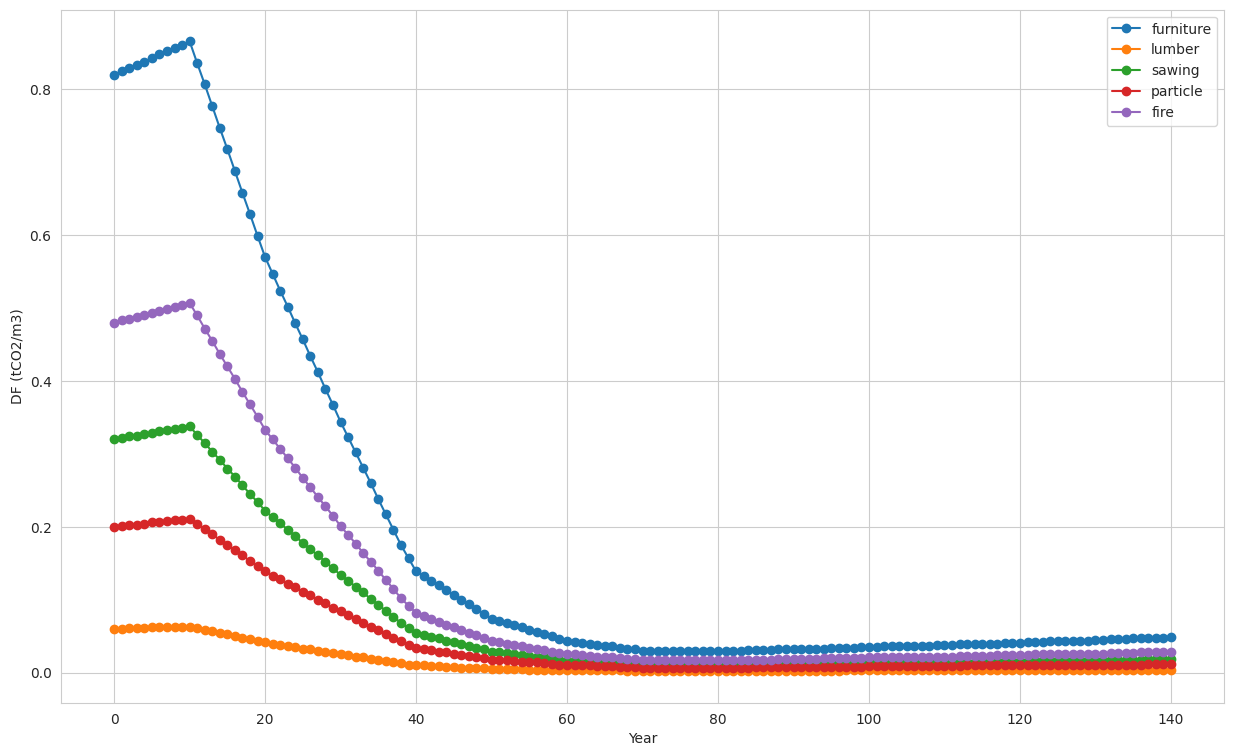

In [ ]:
import seaborn as sns
sns.set_style("whitegrid")

# Create a figure and axis object
plt.figure(figsize=(15, 9))

# Specify the variable to exclude
exclude_variable = 'year'

# Plot each variable in the DataFrame except the excluded one
for column in substitution_df.columns[0:]:
    if column != exclude_variable:
        plt.plot(substitution_df.index, substitution_df[column], marker='o', label=column)

# Add titles and labels
#plt.title('Dynamic displacement factors')
plt.xlabel('Year')
plt.ylabel('DF (tCO2/m3)')
plt.legend()

plt.savefig('dynamic_displacement_factors.jpg')
plt.show()

Dynamic energy substitution (in tC)

In [ ]:
def energy_sub_dynamic(df, recycling_matrix, substitution_df, decay_matrix, C_CO2, n, K): # n will be affected PP+1 because by definition years = period +1
  """
  This function computes the annual dynamic energy substitution
  """
  result_list1 = []
  SEF = substitution_df['fire']
  #SEF = substitution_matrix['fire']
  # rendering columns from substitution_df => [year|emiss|furniture|lumber|sawing|particle|fire]
  listo = substitution_df.columns.tolist()
  # Iterate through the DataFrame rows
  for index, row in df.iterrows():
      product1 = row['product']
      filtered_substitution_matrix = [x for x in listo if x not in ['year', 'emiss', 'fire']]
      if product1 in filtered_substitution_matrix:
          r1 = recycling_matrix[product1]['r']
          r2 = recycling_matrix[product1]['fire']
          init_stock1 = row['post_process_volume']*K #K drying
          lifespan1 = recycling_matrix[product1]['ls']
          result2 = compute_D(n, r1, init_stock1, lifespan1, r2)
          result_list1.append(result2)

  # Sum the elements at corresponding positions in the lists
  sum_result1 = [sum(x) for x in zip(*result_list1)]
  sum_result1[0] = df[df['product']== 'fire']['post_process_volume'].iloc[0]


  # Create a normal distribution
  distribution1 = stats.norm(decay_matrix["fire"], decay_matrix["fire"] / 3)

  FRE = [0]
  # Calculate FRE values for indices 2 to (n+1)
  for i in range(2, n+1):
    termo = 0
    for j in range(1, i):
      termo += sum_result1[j-1] * (distribution1.cdf(i-j) - distribution1.cdf(i-j-1))
    FRE.append(termo)

  # Multiply the emissions from wood combustion by the time-corresponding substitution factor
  FRE = [a * b / C_CO2 for a, b in zip(SEF, FRE)]  # SEF: Substitution for Energy, C_CO2: C to CO2 conversion factor
  return FRE

Dynamic material substitution (in tC)

In [ ]:
def material_sub_dynamic(df, recycling_matrix, substitution_df, decay_matrix, C_CO2, n):
  """
  This function computes the annual dynamic material substitution
  """
  result_list1 = []
  # rendering columns from substitution_df => [year|emiss|furniture|lumber|sawing|particle|fire]
  listo = substitution_df.columns.tolist()
  # Iterate through the DataFrame rows
  for index, row in df.iterrows():
      product1 = row['product']
      filtered_substitution_matrix = [x for x in listo if x not in ['year', 'emiss', 'fire']]
      if product1 in filtered_substitution_matrix:
          SMF = substitution_df[product1] # material substitution factor for this product
          r1 = recycling_matrix[product1]['r']
          #SC = filtered_substitution_matrix[product1] # To suppress
          init_stock1 = row['post_process_volume']*K # K drying
          lifespan1 = recycling_matrix[product1]['ls']
          result2 = compute_R(n, r1, init_stock1, lifespan1)
          result2[0] = init_stock1 # the direct product of the stem in the first position
          result2 = [a * b  for a, b in zip(SMF, result2)] # multiplying by the DF - here the SMF is a product-specific displacement factor and has to be updated during each iteration (product)
          result_list1.append(result2)

  sum_result1 = [sum(x) for x in zip(*result_list1)] # summation of substitutions from all products
  sum_result1 = [x/C_CO2 for x in sum_result1]

  return sum_result1

##Plotting routine

Emission plots (in tC)

In [ ]:
def plot_results(init_stock, products_stock, yearly_emissions, material_sub, energy_sub, yearly_recycling,n):
    """
    This function render plots of wood stock, emissions, energy and material substitution as well as the annual recycling
    """

    # initial total stock in m3
    total_stock = round(sum(init_stock['post_process_volume']),2)

    # Prepare data:
    # f2 is the cumulative list of yearly_emissions
    f2 = [yearly_emissions[0]]
    for i in range(2, n + 1):
        f2.append(f2[i - 2] + yearly_emissions[i - 1])

    # s2 is the cumulative list of material_sub
    s2 = [material_sub[0]]
    for i in range(2, n + 1):
        s2.append(s2[i - 2] + material_sub[i - 1])

    # s4 is the cumulative list of energy_sub
    s4 = [energy_sub[0]]
    for i in range(2, n + 1):
        s4.append(s4[i - 2] + energy_sub[i - 1])

    # Create a figure and three subplots
    fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

    # Plot the first plot in the first subplot
    axes[0].plot(range(1, n+1), energy_sub, label="annual substitution")
    axes[0].plot(range(1, n+1), s4, label="cumulative substitution")
    axes[0].set_title('Material substitution \n(Initial stock ~{} m3)'.format(total_stock))
    axes[0].set_xlabel('time')
    axes[0].set_ylabel('tC')
    axes[0].legend()

    # Plot the second plot in the second subplot
    axes[1].plot(range(1, n+1), f2, label="cumulative emissions")
    axes[1].plot(range(1, n+1), products_stock, label="Wood stock evolution")
    axes[1].set_title('Stock and emissions evolution \n(Initial stock ~{} m3)'.format(total_stock))
    axes[1].set_xlabel('time')
    axes[1].set_ylabel('tC')
    axes[1].legend()

    # Plot the third plot in the third subplot
    axes[2].plot(range(1, n+1), s2, label='cumulative substitution')
    axes[2].plot(range(1, n+1), material_sub, label='annual substitution')
    axes[2].set_title('Energy substitution \n(Initial stock ~{} m3)'.format(total_stock))
    axes[2].set_xlabel('time')
    axes[2].set_ylabel('tC')
    axes[2].legend()

    # Plot the fourth plot in the fourth subplot
    axes[3].plot(range(1, n+1), yearly_recycling)
    axes[3].set_title('annual recycling \n(Initial stock ~{} m3)'.format(total_stock))
    axes[3].set_xlabel('time')
    axes[3].set_ylabel('tC x10')

    # Adjust the subplot layout
    plt.subplots_adjust(bottom=0.2)

    # Return the figure
    return fig


## Run the model

Input data

In [ ]:
"""
Here we present the parameters and inputs data necessary to running the model
"""

###########################
# Block wood use parameters
###########################

# Efficiency of the industrial processes
efficiency = {"Stump": 1, "fire": 1, "furniture": 0.45, "lumber": 0.5, "paper": 0.8 , "particle": 0.76, "sawing": 0.40, "toplog": 1}

# Reallocation of the industrial loss
loss_allocation = {"furniture": {"fire": 0.15, "particle": 0.1, "paper": 0.2, "millsite": 0.1},
                   "lumber": {"fire": 0.15 , "particle": 0.1, "paper": 0.15, "millsite": 0.10},
                   "sawing": {"fire": 0.2, "particle": 0.2, "paper": 0, "millsite": 0.1},
                   "particle":{"fire": 0.14, "particle":0, "paper": 0, "millsite": 0.2},
                   "paper": {"fire": 0, "particle": 0, "paper": 0, "millsite": 0.2}}

# Recycling data on products
recycling = {"furniture": {'r': 0.1, 'ls': 40 , 'fire': 0.8 , 'landfill': 0.1},
             "lumber": {'r': 0.1, 'ls': 60, 'fire': 0.8, 'landfill': 0.1},
             "paper": {'r': 0.1, 'ls': 1, 'fire': 0.8, 'landfill': 0.1},
             "sawing": {'r': 0.1, 'ls': 50, 'fire': 0.8, 'landfill': 0.1},
             "particle": {'r': 0.1, 'ls': 20, 'fire': 0.8 , 'landfill': 0.1}}


# Half-lifetime of "non-main-products"
decay = {"landfill": 50, "millsite": 25, "fire" : 1}

# Matrix of substitution coefficient. Values are by reference to the dry volume tCO2 / m3 (dry volume)
substitution_matrix = {"furniture": 0.82,
                       "lumber": 0.06,
                       "sawing": 0.32,
                       "particle": 0.2,
                       "fire": 0.48}

# Moisture content
MC = 0.22
K = 1/(1+MC)

# Density and carbon content
D = 0.588 #t/m3 # https://doi.org/10.1007/s13595-018-0734-6 (source from where density has been extracted)
CC = 0.5 # proportion of carbon in the dry biomass
C_CO2 = 3.67 # The conversion factor from C to CO2

################################
# Block dendrometric parameters
################################

#scale = 20.33
#shape = 5.65
#tolerance_g = 0.3
#tolerance_hfind = 0.0001
#a1 = 0.6626
#a2 = 0.8769
#b1 = 0.9712
#b2 = -0.2774
#b3 = 1.1107
#b4 = 26.4390
#a = 0.7
#c = 1
#alpha = 0.04
#beta = 2.10
#class_width = 1

#########################################
# Values to be inputed in each simulation
#########################################

#bark = 2 ; 3DCMCC
#total_population = 850 ; 3DCMCC
#DBH = 100  ; 3DCMCC
#target_sum = 8.65  ; (%G)*G ; 3DCMCC
#sap_area = 1700 ; 3DCMCC
#heart_area = 1600 ; 3DCMCC
#thinning_type = 'above'
#rotat_num = 4
#rotation = 60
#thinning_age = 20
#planning_horizon = 300
#projection_period (n) = planning_horizon - (rotat_num - 1)*rotation - thinning_age



Run the model

In [ ]:
"""
This code runs the model and renders the graphs. It should be improved to accept multiple simulations and to be rather implemented as a function
Add the possibility to read the inputs directly from an excel file
Add the possibility to export the outputs as an excel file
"""
# generate the stand
first_step = dendrometer(scale = 20.33, shape = 5.65, total_population = 850, class_width = 1, DBH = 100)
# Perform the thinning
second_step = perform_thinning(trees_df = first_step, thinning_type= 'above', target_sum = 8.65, tolerance = 0.3)
second_step = first_step[first_step['ID'].isin(second_step)]
# Perform the dissagregation
third_step = second_step.apply(lambda row: bucking_allocation(dbh = row['Diameter_Center'], ht = row['Height_Center'], a1 = 0.6626, a2 = 0.8769, b1 = 0.9712, b2 = -0.2774, b3 = 1.1107, b4 = 26.4390, bark = 2, a = 0.7, c = 1, alpha = 0.04, beta = 2.10, DBH = 100, sap_area = 1700, heart_area = 1600, tolerance = 0.0001), axis=1)
resultat = pd.concat(third_step.tolist())
resultat = resultat.groupby('product')['volume'].sum().reset_index()
# Wood processing
resultat_reallocation = processor(resultat, efficiency = efficiency, loss_allocation = loss_allocation)
# Compute stock evolution
f = total_stock_calculator(resultat_reallocation, recycling, decay, 100)
# Compute yearly emissions
f1 = total_emission_calculator(resultat_reallocation, recycling, decay, 100)
# Compute energy substitution
s1 = energy_sub(resultat_reallocation, recycling, substitution_matrix, decay, C_CO2, 100)
# Compute material substitution
s3 = material_sub(resultat_reallocation, recycling, substitution_matrix, decay, C_CO2, 100)
# Total recycling
rec = total_recycling_calculator(resultat_reallocation, recycling, decay, 100)
# Plot the results
fig = plot_results(resultat_reallocation, f, f1, s1, s3, rec, 100)
# Show the plot
plt.show()

In [ ]:
management_clearcut = {"N_rotation": [1, 1],
               "age": [39, 84],
               "total_pop" : [1396, 275],
               "target_sum": [10.47, 41.83],
               "DBH": [19.54, 44.01],
               "bark": [1.5, 1.5],
               "sap_area": [199.72, 698.16],
               "heart_area": [100.31, 823.18],
               "thinning_type": ['above', 'neutral']}

In [ ]:
# generate the stand
first_step = dendrometer(scale = 20.33, shape = 5.65, total_population = 275, class_width = 1, DBH = 44.01)
# Perform the thinning
second_step = perform_thinning(trees_df = first_step, thinning_type= 'neutral', target_sum = 41.83, tolerance = 0.3)
second_step = first_step[first_step['ID'].isin(second_step)]
# Perform the dissagregation
third_step = second_step.apply(lambda row: bucking_allocation(dbh = row['Diameter_Center'], ht = row['Height_Center'], a1 = 0.6626, a2 = 0.8769, b1 = 0.9712, b2 = -0.2774, b3 = 1.1107, b4 = 26.4390, bark = 1.5, a = 0.7, c = 1, alpha = 0.04, beta = 2.10, DBH = 100, sap_area = 698.16, heart_area = 823.18, tolerance = 0.0001), axis=1)
resultat = pd.concat(third_step.tolist())
resultat = resultat.groupby('product')['volume'].sum().reset_index()
# Wood processing
resultat_reallocation2 = processor(resultat, efficiency = efficiency, loss_allocation = loss_allocation)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
1

<ipython-input-7-180f5108f289>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  reallocated_df = reallocated_df.append({"product": target, "volume": 0, "post_process_volume": row['post_process_volume'] * fraction}, ignore_index=True)
<ipython-input-7-180f5108f289>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  reallocated_df = reallocated_df.append({"product": target, "volume": 0, "post_process_volume": row['post_process_volume'] * fraction}, ignore_index=True)
<ipython-input-7-180f5108f289>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  reallocated_df = reallocated_df.append({"product": target, "volume": 0, "post_process_volume": row['post_process_volume'] * fraction}, ignore_index=True)
<ipython-input-7-180f5108f28

In [ ]:
resultat_reallocation2["post_process_volume"] = resultat_reallocation2["post_process_volume"]*K*D*CC

In [ ]:
resultat_reallocation2

product  post_process_volume
0  furniture            24.889603
1   millsite             5.079276
2      paper             5.738540
3   particle            13.836426
4     sawing             2.811644
5       fire             9.815365

Run one simulation

In [ ]:
def run_simulation(scale, shape, total_population, class_width, DBH, thinning_type, target_sum, tolerance_g, a1, a2, b1, b2, b3, b4, bark, a, c, alpha,
                   beta, sap_area, heart_area, tolerance_hfind, efficiency, loss_allocation, recycling, substitution_matrix, decay, n):
  # generate the stand
  first_step = dendrometer(scale = scale, shape = shape, total_population = total_population, class_width = class_width, DBH = DBH)
  # perform the thinning
  second_step = perform_thinning(trees_df= first_step, thinning_type= thinning_type, target_sum = target_sum, tolerance = tolerance_g)
  second_step = first_step[first_step['ID'].isin(second_step)]
  # perform the dissagregation
  third_step = second_step.apply(lambda row: bucking_allocation(dbh = row['Diameter_Center'], ht = row['Height_Center'], a1 = a1, a2 = a2, b1 = b1, b2 = b2, b3 = b3, b4 = b4, bark = bark, a = a, c = c, alpha = alpha, beta = beta, DBH = DBH, sap_area = sap_area, heart_area = heart_area, tolerance = tolerance_hfind), axis=1)
  resultat = pd.concat(third_step.tolist())
  resultat = resultat.groupby('product')['volume'].sum().reset_index()
  # Wood processing
  resultat_reallocation = processor(resultat, efficiency = efficiency, loss_allocation = loss_allocation)
  # Compute stock
  f = total_stock_calculator(resultat_reallocation, recycling, decay, n)
  f = total_stock_calculator_ipcc(resultat_reallocation, recycling, decay, n, t05, L0, f, MM_CO2 = 44, MM_C= 12, MM_CH4= 16, GWP_CH4= 28, D, MC, CC):
  # Compute emissions
  f1 = total_emission_calculator(resultat_reallocation, recycling, decay, n)
  # Compute energy substitution
  s1 = energy_sub(resultat_reallocation, recycling, substitution_matrix, decay, C_CO2, n)
  # Compute material substitution
  s3 = material_sub(resultat_reallocation, recycling, substitution_matrix, decay, C_CO2, n)
  # Total recycling *10
  rec = total_recycling_calculator(resultat_reallocation, recycling, decay, n)
  # Cumulative list of yearly_emissions
  f2 = [0]#[s3[0]]
  for i in range(2, n + 1):
      f2.append(f2[i - 2] + f1[i - 1])
  # Cumulative list of material_sub
  s2 = [s3[0]]
  for i in range(2, n + 1):
      s2.append(s2[i - 2] + s3[i - 1])
  # Cumulative list of energy_sub
  s4 = [s1[0]]
  for i in range(2, n + 1):
      s4.append(s4[i - 2] + s1[i - 1])
  # Organize outputs into a dataframe
  df = pd.DataFrame(list(zip(range(1,n+1),f, f1, f2, s1, s4, s3, s2, rec)), columns = ['Time','C_Stock', 'Y_Emissions', 'C_Emissions', 'Y_ESUB', 'C_ESUB', 'Y_MSUB', 'C_MSUB', 'Y_REC'])
  return df

In [ ]:
run_simulation(scale=20.33, shape= 5.65, total_population= 850, class_width= 1, DBH= 100, thinning_type = 'above', target_sum = 8.65, tolerance_g = 0.3,
                       a1 = 0.6626, a2 = 0.8769, b1 = 0.9712, b2 = -0.2774, b3 = 1.1107, b4 = 26.4390, bark = 2, a = 0.7, c = 1, alpha = 0.04, beta = 2.10,
                       sap_area = 1700, heart_area = 1600, tolerance_hfind = 0.0001, efficiency = efficiency, loss_allocation = loss_allocation, recycling = recycling,
                       substitution_matrix = substitution_matrix, decay = decay, n = 100)

In [ ]:
management_sim = {"N_rotation": [1, 1, 1, 1,  2, 2],
               "age": [20, 40, 60, 80, 40, 60],
               "total_pop" : [1000, 800, 600, 400, 1000, 800],
               "target_sum": [8.65, 8.65, 8.65, 8.65, 8.65, 8.65],
               "DBH": [40, 60, 80, 100, 40, 60],
               "bark": [2, 2, 2, 2, 2, 2],
               "sap_area": [1700, 1700, 1700, 1700, 1700, 1700],
               "heart_area": [1600, 1600, 1600, 1600, 1600, 1600],
               "thinning_type": ['above', 'bottom', 'above', 'above', 'bottom', 'above']}

management_sim

{'N_rotation': [1, 1, 1, 1, 2, 2],
 'age': [20, 40, 60, 80, 40, 60],
 'total_pop': [1000, 800, 600, 400, 1000, 800],
 'target_sum': [8.65, 8.65, 8.65, 8.65, 8.65, 8.65],
 'DBH': [40, 60, 80, 100, 40, 60],
 'bark': [2, 2, 2, 2, 2, 2],
 'sap_area': [1700, 1700, 1700, 1700, 1700, 1700],
 'heart_area': [1600, 1600, 1600, 1600, 1600, 1600],
 'thinning_type': ['above', 'bottom', 'above', 'above', 'bottom', 'above']}

Run multiple simulations

In [ ]:
def run_model(scale, shape, class_width, tolerance_g, a1, a2, b1, b2, b3, b4, a, c, alpha,
              beta, tolerance_hfind, efficiency, loss_allocation, recycling, decay, PH, R, management_dic,
              t05 = 10, L0 = 0.1, MM_C= 12, MM_CO2 = 44, MM_CH4 = 16, GWP_CH4 = 28, f = 0.5, C_CO2 = 3.67, D = 0.588 , MC = 0.22, CC = 0.5, K = 1/1.22):

  # initiate an empty dataframe where to store resulting variables
  result_df = pd.DataFrame()

  # read the emission trend by https://www.science.org/doi/10.1126/science.aah3443
  df_DSEF = substitution_factors_dynamic(2010, PH) # where 2010 is the reference year here by default as set by Rockstrom - please consult the function documentation more above for further infos

  # loop over the management interventions
  for i in range(0, len(next(iter(management_dic.values())))):
    # dictionnary of an individual intervention
    dico =  {key: value[i] for key, value in management_dic.items()}
    # Projection period
    PP = PH - (dico.get('N_rotation') - 1)* R - dico.get('age')
    # Remaining period (that should receive 0)
    RP = PH - PP
    # filter the df_DSEF to include only the years of interest - between [2010 + (N°Rotation -1).R + age ] && [2010 + PH]
    df_DSEF_filtered = df_DSEF[(df_DSEF['year'] >= 2010 + (dico.get('N_rotation') - 1)*R + dico.get('age')) & (df_DSEF['year'] <= PH + 2010)] # total rows == PP + 1
    # generate the stand
    first_step = dendrometer(scale = scale, shape = shape, total_population = dico.get('total_pop'), class_width = class_width, DBH = dico.get('DBH'))
    # perform the thinning
    second_step = perform_thinning(trees_df= first_step, thinning_type= dico.get('thinning_type'), target_sum = dico.get('target_sum'), tolerance = tolerance_g)
    second_step = first_step[first_step['ID'].isin(second_step)]
    # perform the dissagregation
    third_step = second_step.apply(lambda row: bucking_allocation(dbh = row['Diameter_Center'], ht = row['Height_Center'], a1 = a1, a2 = a2, b1 = b1, b2 = b2, b3 = b3, b4 = b4, bark = dico.get('bark'), a = a, c = c, alpha = alpha, beta = beta, DBH = dico.get('DBH'), sap_area = dico.get('sap_area'), heart_area = dico.get('heart_area'), tolerance = tolerance_hfind), axis=1)
    resultat = pd.concat(third_step.tolist())
    resultat = resultat.groupby('product')['volume'].sum().reset_index()
    # Wood processing
    resultat_reallocation = processor(resultat, efficiency = efficiency, loss_allocation = loss_allocation)
    # Generate list of 0s before the start of projection
    list0 = [0] * RP
    # Compute stock
    f0 = total_stock_calculator_ipcc(resultat_reallocation, recycling, decay, PP+1, t05, L0, f,  D, MC, CC, MM_CO2, MM_C, MM_CH4, GWP_CH4) #modified from number of years to period from PP -> PP+1
    # Compute emissions
    f1 = total_emission_calculator_methane(resultat_reallocation, recycling, decay, PP+1, t05, L0, f, D, MC, CC, K, MM_CO2, MM_C, MM_CH4, GWP_CH4) #modified from number of years to period from PP -> PP+1
    # Compute energy substitution
    s1 = energy_sub_dynamic(resultat_reallocation, recycling, df_DSEF_filtered , decay, C_CO2, PP+1, K) #modified from number of years to period from PP -> PP+1
    # Compute material substitution
    s3 = material_sub_dynamic(resultat_reallocation, recycling, df_DSEF_filtered, decay, C_CO2, PP+1) #modified from number of years to period from PP -> PP+1
    # Total recycling *10
    rec = total_recycling_calculator(resultat_reallocation, recycling, decay, PP+1) #modified from number of years to period from PP -> PP+1
    # Cumulative list of yearly emissions
    f2 = [0]#[s3[0]]
    for i in range(2, PP + 2): # changed from PP+1 => PP+2 because range doesn't account for the last element and the number of years = period + 1
        f2.append(f2[i - 2] + f1[i - 1])
    f2 = list0 + f2
    # Cumulative list of material substitution
    s2 = [s3[0]]
    for i in range(2, PP + 2): # changed from PP+1 => PP+2 because range doesn't account for the last element and the number of years = period + 1
        s2.append(s2[i - 2] + s3[i - 1])
    s2 = list0 + s2
    # Cumulative list of energy substitution
    s4 = [s1[0]]
    for i in range(2, PP + 2): # changed from PP+1 => PP+2 because range doesn't account for the last element and the number of years = period + 1
        s4.append(s4[i - 2] + s1[i - 1])
    s4 = list0 + s4
    # Add list0 before the starting of simulations
    f0 = list0 + f0
    f1 = list0 + f1
    s1 = list0 + s1
    s3 = list0 + s3
    rec = list0 + rec
    # Organize outputs into a dataframe
    df = pd.DataFrame(list(zip(f0, f1, f2, s1, s4, s3, s2, rec)), columns = ['C_Stock', 'Y_Emissions', 'C_Emissions', 'Y_ESUB', 'C_ESUB', 'Y_MSUB', 'C_MSUB', 'Y_REC'])
    # add dataframes contents
    result_df = result_df.add(df, fill_value = 0)

  return result_df


#run_model(scale = 20.33, shape= 5.65, class_width = 1 , tolerance_g = 0.3, a1 = 0.6626, a2 = 0.8769, b1= 0.9712, b2 = -0.2774, b3 = 1.1107, b4 = 26.4390,
#          a = 0.7, c = 1, alpha = 0.04, beta = 2.10, tolerance_hfind = 0.0001, efficiency = efficiency , loss_allocation = loss_allocation , recycling = recycling,
#          substitution_matrix = substitution_matrix, decay = decay, PH = 300, R = 100, management_dic = management_sim)

## RESULTS

In [ ]:
output1 = run_model(scale = 20.33, shape = 5.65, class_width = 1, tolerance_g = 0.3, a1 = 0.6626, a2 = 0.8769, b1 = 0.9712, b2 = -0.2774, b3 = 1.1107, b4 = 26.4390, a = 0.7,
                    c = 1, alpha = 0.04, beta = 2.10, tolerance_hfind = 0.0001, efficiency = efficiency, loss_allocation = loss_allocation, recycling = recycling_BAU, decay = decay,
                    PH = 140, R = 0, management_dic = management_jardin, t05 = 10, L0 = 0.1, MM_C= 12, MM_CO2 = 44, MM_CH4 = 16, GWP_CH4 = 28, f = 0.6, C_CO2 = 3.67, D = 0.588 , MC = 0.12, CC = 0.5, K = 1/1.12)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6


<ipython-input-7-9105cf99a9f9>:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reallocated_df = pd.concat([reallocated_df, pd.DataFrame({"product": [target],


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
7
8
9
10
11
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7


<ipython-input-7-9105cf99a9f9>:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reallocated_df = pd.concat([reallocated_df, pd.DataFrame({"product": [target],


{12: {'Diameter_Center': 33.8, 'Individuals': 6, 'Height_Center': 16.74, 'CBH': 13.39, 'BA': 0.09, 'SC': 3}, 13: {'Diameter_Center': 34.8, 'Individuals': 9, 'Height_Center': 17.11, 'CBH': 13.69, 'BA': 0.095, 'SC': 3}, 14: {'Diameter_Center': 35.8, 'Individuals': 12, 'Height_Center': 17.48, 'CBH': 13.98, 'BA': 0.101, 'SC': 3}, 15: {'Diameter_Center': 36.8, 'Individuals': 16, 'Height_Center': 17.85, 'CBH': 14.28, 'BA': 0.106, 'SC': 3}, 16: {'Diameter_Center': 37.8, 'Individuals': 20, 'Height_Center': 18.21, 'CBH': 14.57, 'BA': 0.112, 'SC': 3}, 17: {'Diameter_Center': 38.8, 'Individuals': 24, 'Height_Center': 18.56, 'CBH': 14.85, 'BA': 0.118, 'SC': 2}, 18: {'Diameter_Center': 39.8, 'Individuals': 28, 'Height_Center': 18.91, 'CBH': 15.13, 'BA': 0.124, 'SC': 2}, 19: {'Diameter_Center': 40.8, 'Individuals': 31, 'Height_Center': 19.25, 'CBH': 15.4, 'BA': 0.131, 'SC': 2}, 20: {'Diameter_Center': 41.8, 'Individuals': 33, 'Height_Center': 19.59, 'CBH': 15.67, 'BA': 0.137, 'SC': 2}, 21: {'Diamete

<ipython-input-7-9105cf99a9f9>:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reallocated_df = pd.concat([reallocated_df, pd.DataFrame({"product": [target],


{13: {'Diameter_Center': 46.3, 'Individuals': 5, 'Height_Center': 21.05, 'CBH': 16.84, 'BA': 0.168, 'SC': 3}, 14: {'Diameter_Center': 47.3, 'Individuals': 7, 'Height_Center': 21.36, 'CBH': 17.09, 'BA': 0.176, 'SC': 2}, 15: {'Diameter_Center': 48.3, 'Individuals': 10, 'Height_Center': 21.67, 'CBH': 17.34, 'BA': 0.183, 'SC': 2}, 16: {'Diameter_Center': 49.3, 'Individuals': 12, 'Height_Center': 21.97, 'CBH': 17.58, 'BA': 0.191, 'SC': 2}, 17: {'Diameter_Center': 50.3, 'Individuals': 15, 'Height_Center': 22.26, 'CBH': 17.81, 'BA': 0.199, 'SC': 2}, 18: {'Diameter_Center': 51.3, 'Individuals': 17, 'Height_Center': 22.55, 'CBH': 18.04, 'BA': 0.207, 'SC': 2}, 19: {'Diameter_Center': 52.3, 'Individuals': 19, 'Height_Center': 22.84, 'CBH': 18.27, 'BA': 0.215, 'SC': 2}, 20: {'Diameter_Center': 53.3, 'Individuals': 20, 'Height_Center': 23.12, 'CBH': 18.5, 'BA': 0.223, 'SC': 2}, 21: {'Diameter_Center': 54.3, 'Individuals': 19, 'Height_Center': 23.39, 'CBH': 18.71, 'BA': 0.232, 'SC': 2}, 22: {'Diamet

<ipython-input-7-9105cf99a9f9>:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reallocated_df = pd.concat([reallocated_df, pd.DataFrame({"product": [target],


{14: {'Diameter_Center': 60.0, 'Individuals': 5, 'Height_Center': 24.86, 'CBH': 19.89, 'BA': 0.283, 'SC': 2}, 15: {'Diameter_Center': 61.0, 'Individuals': 6, 'Height_Center': 25.1, 'CBH': 20.08, 'BA': 0.292, 'SC': 2}, 16: {'Diameter_Center': 62.0, 'Individuals': 8, 'Height_Center': 25.33, 'CBH': 20.26, 'BA': 0.302, 'SC': 2}, 17: {'Diameter_Center': 63.0, 'Individuals': 10, 'Height_Center': 25.56, 'CBH': 20.45, 'BA': 0.312, 'SC': 2}, 18: {'Diameter_Center': 64.0, 'Individuals': 11, 'Height_Center': 25.79, 'CBH': 20.63, 'BA': 0.322, 'SC': 2}, 19: {'Diameter_Center': 65.0, 'Individuals': 12, 'Height_Center': 26.01, 'CBH': 20.81, 'BA': 0.332, 'SC': 2}, 20: {'Diameter_Center': 66.0, 'Individuals': 13, 'Height_Center': 26.22, 'CBH': 20.98, 'BA': 0.342, 'SC': 2}, 21: {'Diameter_Center': 67.0, 'Individuals': 12, 'Height_Center': 26.43, 'CBH': 21.14, 'BA': 0.353, 'SC': 2}, 22: {'Diameter_Center': 68.0, 'Individuals': 11, 'Height_Center': 26.64, 'CBH': 21.31, 'BA': 0.363, 'SC': 2}, 23: {'Diamete

<ipython-input-7-9105cf99a9f9>:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reallocated_df = pd.concat([reallocated_df, pd.DataFrame({"product": [target],


In [ ]:
output1['balance'] = output1["C_Stock"] + output1["C_ESUB"] + output1["C_MSUB"] - output1["C_Emissions"]

In [ ]:
output2 = run_model(scale = 20.33, shape = 5.65, class_width = 1, tolerance_g = 0.3, a1 = 0.6626, a2 = 0.8769, b1 = 0.9712, b2 = -0.2774, b3 = 1.1107, b4 = 26.4390, a = 0.7,
                    c = 1, alpha = 0.04, beta = 2.10, tolerance_hfind = 0.0001, efficiency = efficiency, loss_allocation = loss_allocation, recycling = recycling_RR10, decay = decay,
                    PH = 140, R = 0, management_dic = management_jardin, t05 = 10, L0 = 0.1, MM_C= 12, MM_CO2 = 44, MM_CH4 = 16, GWP_CH4 = 28, f = 0.6, C_CO2 = 3.67, D = 0.588 , MC = 0.12, CC = 0.5, K = 1/1.12)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5


<ipython-input-7-9105cf99a9f9>:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reallocated_df = pd.concat([reallocated_df, pd.DataFrame({"product": [target],


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
7
8
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6

<ipython-input-7-9105cf99a9f9>:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reallocated_df = pd.concat([reallocated_df, pd.DataFrame({"product": [target],


{12: {'Diameter_Center': 33.8, 'Individuals': 6, 'Height_Center': 16.74, 'CBH': 13.39, 'BA': 0.09, 'SC': 3}, 13: {'Diameter_Center': 34.8, 'Individuals': 9, 'Height_Center': 17.11, 'CBH': 13.69, 'BA': 0.095, 'SC': 3}, 14: {'Diameter_Center': 35.8, 'Individuals': 12, 'Height_Center': 17.48, 'CBH': 13.98, 'BA': 0.101, 'SC': 3}, 15: {'Diameter_Center': 36.8, 'Individuals': 16, 'Height_Center': 17.85, 'CBH': 14.28, 'BA': 0.106, 'SC': 3}, 16: {'Diameter_Center': 37.8, 'Individuals': 20, 'Height_Center': 18.21, 'CBH': 14.57, 'BA': 0.112, 'SC': 3}, 17: {'Diameter_Center': 38.8, 'Individuals': 24, 'Height_Center': 18.56, 'CBH': 14.85, 'BA': 0.118, 'SC': 2}, 18: {'Diameter_Center': 39.8, 'Individuals': 28, 'Height_Center': 18.91, 'CBH': 15.13, 'BA': 0.124, 'SC': 2}, 19: {'Diameter_Center': 40.8, 'Individuals': 31, 'Height_Center': 19.25, 'CBH': 15.4, 'BA': 0.131, 'SC': 2}, 20: {'Diameter_Center': 41.8, 'Individuals': 33, 'Height_Center': 19.59, 'CBH': 15.67, 'BA': 0.137, 'SC': 2}, 21: {'Diamete

<ipython-input-7-9105cf99a9f9>:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reallocated_df = pd.concat([reallocated_df, pd.DataFrame({"product": [target],


{13: {'Diameter_Center': 46.3, 'Individuals': 5, 'Height_Center': 21.05, 'CBH': 16.84, 'BA': 0.168, 'SC': 3}, 14: {'Diameter_Center': 47.3, 'Individuals': 7, 'Height_Center': 21.36, 'CBH': 17.09, 'BA': 0.176, 'SC': 2}, 15: {'Diameter_Center': 48.3, 'Individuals': 10, 'Height_Center': 21.67, 'CBH': 17.34, 'BA': 0.183, 'SC': 2}, 16: {'Diameter_Center': 49.3, 'Individuals': 12, 'Height_Center': 21.97, 'CBH': 17.58, 'BA': 0.191, 'SC': 2}, 17: {'Diameter_Center': 50.3, 'Individuals': 15, 'Height_Center': 22.26, 'CBH': 17.81, 'BA': 0.199, 'SC': 2}, 18: {'Diameter_Center': 51.3, 'Individuals': 17, 'Height_Center': 22.55, 'CBH': 18.04, 'BA': 0.207, 'SC': 2}, 19: {'Diameter_Center': 52.3, 'Individuals': 19, 'Height_Center': 22.84, 'CBH': 18.27, 'BA': 0.215, 'SC': 2}, 20: {'Diameter_Center': 53.3, 'Individuals': 20, 'Height_Center': 23.12, 'CBH': 18.5, 'BA': 0.223, 'SC': 2}, 21: {'Diameter_Center': 54.3, 'Individuals': 19, 'Height_Center': 23.39, 'CBH': 18.71, 'BA': 0.232, 'SC': 2}, 22: {'Diamet

<ipython-input-7-9105cf99a9f9>:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reallocated_df = pd.concat([reallocated_df, pd.DataFrame({"product": [target],


{14: {'Diameter_Center': 60.0, 'Individuals': 5, 'Height_Center': 24.86, 'CBH': 19.89, 'BA': 0.283, 'SC': 2}, 15: {'Diameter_Center': 61.0, 'Individuals': 6, 'Height_Center': 25.1, 'CBH': 20.08, 'BA': 0.292, 'SC': 2}, 16: {'Diameter_Center': 62.0, 'Individuals': 8, 'Height_Center': 25.33, 'CBH': 20.26, 'BA': 0.302, 'SC': 2}, 17: {'Diameter_Center': 63.0, 'Individuals': 10, 'Height_Center': 25.56, 'CBH': 20.45, 'BA': 0.312, 'SC': 2}, 18: {'Diameter_Center': 64.0, 'Individuals': 11, 'Height_Center': 25.79, 'CBH': 20.63, 'BA': 0.322, 'SC': 2}, 19: {'Diameter_Center': 65.0, 'Individuals': 12, 'Height_Center': 26.01, 'CBH': 20.81, 'BA': 0.332, 'SC': 2}, 20: {'Diameter_Center': 66.0, 'Individuals': 13, 'Height_Center': 26.22, 'CBH': 20.98, 'BA': 0.342, 'SC': 2}, 21: {'Diameter_Center': 67.0, 'Individuals': 12, 'Height_Center': 26.43, 'CBH': 21.14, 'BA': 0.353, 'SC': 2}, 22: {'Diameter_Center': 68.0, 'Individuals': 11, 'Height_Center': 26.64, 'CBH': 21.31, 'BA': 0.363, 'SC': 2}, 23: {'Diamete

<ipython-input-7-9105cf99a9f9>:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reallocated_df = pd.concat([reallocated_df, pd.DataFrame({"product": [target],


In [ ]:
output2['balance'] = output2["C_Stock"] + output2["C_ESUB"] + output2["C_MSUB"] - output2["C_Emissions"]

In [ ]:
output3 = run_model(scale = 20.33, shape = 5.65, class_width = 1, tolerance_g = 0.3, a1 = 0.6626, a2 = 0.8769, b1 = 0.9712, b2 = -0.2774, b3 = 1.1107, b4 = 26.4390, a = 0.7,
                    c = 1, alpha = 0.04, beta = 2.10, tolerance_hfind = 0.0001, efficiency = efficiency, loss_allocation = loss_allocation, recycling = recycling_LS10, decay = decay,
                    PH = 140, R = 0, management_dic = management_jardin, t05 = 10, L0 = 0.1, MM_C= 12, MM_CO2 = 44, MM_CH4 = 16, GWP_CH4 = 28, f = 0.6, C_CO2 = 3.67, D = 0.588 , MC = 0.12, CC = 0.5, K = 1/1.12)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6


<ipython-input-7-9105cf99a9f9>:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reallocated_df = pd.concat([reallocated_df, pd.DataFrame({"product": [target],


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9

<ipython-input-7-9105cf99a9f9>:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reallocated_df = pd.concat([reallocated_df, pd.DataFrame({"product": [target],


{12: {'Diameter_Center': 33.8, 'Individuals': 6, 'Height_Center': 16.74, 'CBH': 13.39, 'BA': 0.09, 'SC': 3}, 13: {'Diameter_Center': 34.8, 'Individuals': 9, 'Height_Center': 17.11, 'CBH': 13.69, 'BA': 0.095, 'SC': 3}, 14: {'Diameter_Center': 35.8, 'Individuals': 12, 'Height_Center': 17.48, 'CBH': 13.98, 'BA': 0.101, 'SC': 3}, 15: {'Diameter_Center': 36.8, 'Individuals': 16, 'Height_Center': 17.85, 'CBH': 14.28, 'BA': 0.106, 'SC': 3}, 16: {'Diameter_Center': 37.8, 'Individuals': 20, 'Height_Center': 18.21, 'CBH': 14.57, 'BA': 0.112, 'SC': 3}, 17: {'Diameter_Center': 38.8, 'Individuals': 24, 'Height_Center': 18.56, 'CBH': 14.85, 'BA': 0.118, 'SC': 2}, 18: {'Diameter_Center': 39.8, 'Individuals': 28, 'Height_Center': 18.91, 'CBH': 15.13, 'BA': 0.124, 'SC': 2}, 19: {'Diameter_Center': 40.8, 'Individuals': 31, 'Height_Center': 19.25, 'CBH': 15.4, 'BA': 0.131, 'SC': 2}, 20: {'Diameter_Center': 41.8, 'Individuals': 33, 'Height_Center': 19.59, 'CBH': 15.67, 'BA': 0.137, 'SC': 2}, 21: {'Diamete

<ipython-input-7-9105cf99a9f9>:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reallocated_df = pd.concat([reallocated_df, pd.DataFrame({"product": [target],


{13: {'Diameter_Center': 46.3, 'Individuals': 5, 'Height_Center': 21.05, 'CBH': 16.84, 'BA': 0.168, 'SC': 3}, 14: {'Diameter_Center': 47.3, 'Individuals': 7, 'Height_Center': 21.36, 'CBH': 17.09, 'BA': 0.176, 'SC': 2}, 15: {'Diameter_Center': 48.3, 'Individuals': 10, 'Height_Center': 21.67, 'CBH': 17.34, 'BA': 0.183, 'SC': 2}, 16: {'Diameter_Center': 49.3, 'Individuals': 12, 'Height_Center': 21.97, 'CBH': 17.58, 'BA': 0.191, 'SC': 2}, 17: {'Diameter_Center': 50.3, 'Individuals': 15, 'Height_Center': 22.26, 'CBH': 17.81, 'BA': 0.199, 'SC': 2}, 18: {'Diameter_Center': 51.3, 'Individuals': 17, 'Height_Center': 22.55, 'CBH': 18.04, 'BA': 0.207, 'SC': 2}, 19: {'Diameter_Center': 52.3, 'Individuals': 19, 'Height_Center': 22.84, 'CBH': 18.27, 'BA': 0.215, 'SC': 2}, 20: {'Diameter_Center': 53.3, 'Individuals': 20, 'Height_Center': 23.12, 'CBH': 18.5, 'BA': 0.223, 'SC': 2}, 21: {'Diameter_Center': 54.3, 'Individuals': 19, 'Height_Center': 23.39, 'CBH': 18.71, 'BA': 0.232, 'SC': 2}, 22: {'Diamet

<ipython-input-7-9105cf99a9f9>:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reallocated_df = pd.concat([reallocated_df, pd.DataFrame({"product": [target],


{14: {'Diameter_Center': 60.0, 'Individuals': 5, 'Height_Center': 24.86, 'CBH': 19.89, 'BA': 0.283, 'SC': 2}, 15: {'Diameter_Center': 61.0, 'Individuals': 6, 'Height_Center': 25.1, 'CBH': 20.08, 'BA': 0.292, 'SC': 2}, 16: {'Diameter_Center': 62.0, 'Individuals': 8, 'Height_Center': 25.33, 'CBH': 20.26, 'BA': 0.302, 'SC': 2}, 17: {'Diameter_Center': 63.0, 'Individuals': 10, 'Height_Center': 25.56, 'CBH': 20.45, 'BA': 0.312, 'SC': 2}, 18: {'Diameter_Center': 64.0, 'Individuals': 11, 'Height_Center': 25.79, 'CBH': 20.63, 'BA': 0.322, 'SC': 2}, 19: {'Diameter_Center': 65.0, 'Individuals': 12, 'Height_Center': 26.01, 'CBH': 20.81, 'BA': 0.332, 'SC': 2}, 20: {'Diameter_Center': 66.0, 'Individuals': 13, 'Height_Center': 26.22, 'CBH': 20.98, 'BA': 0.342, 'SC': 2}, 21: {'Diameter_Center': 67.0, 'Individuals': 12, 'Height_Center': 26.43, 'CBH': 21.14, 'BA': 0.353, 'SC': 2}, 22: {'Diameter_Center': 68.0, 'Individuals': 11, 'Height_Center': 26.64, 'CBH': 21.31, 'BA': 0.363, 'SC': 2}, 23: {'Diamete

<ipython-input-7-9105cf99a9f9>:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reallocated_df = pd.concat([reallocated_df, pd.DataFrame({"product": [target],


In [ ]:
output3['balance'] = output3["C_Stock"] + output3["C_ESUB"] + output3["C_MSUB"] - output3["C_Emissions"]

In [ ]:
output4 = run_model(scale = 20.33, shape = 5.65, class_width = 1, tolerance_g = 0.3, a1 = 0.6626, a2 = 0.8769, b1 = 0.9712, b2 = -0.2774, b3 = 1.1107, b4 = 26.4390, a = 0.7,
                    c = 1, alpha = 0.04, beta = 2.10, tolerance_hfind = 0.0001, efficiency = efficiency, loss_allocation = loss_allocation, recycling = recycling_RRLS10, decay = decay,
                    PH = 140, R = 0, management_dic = management_jardin, t05 = 10, L0 = 0.1, MM_C= 12, MM_CO2 = 44, MM_CH4 = 16, GWP_CH4 = 28, f = 0.6, C_CO2 = 3.67, D = 0.588 , MC = 0.12, CC = 0.5, K = 1/1.12)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5


<ipython-input-7-9105cf99a9f9>:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reallocated_df = pd.concat([reallocated_df, pd.DataFrame({"product": [target],


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8

<ipython-input-7-9105cf99a9f9>:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reallocated_df = pd.concat([reallocated_df, pd.DataFrame({"product": [target],


{12: {'Diameter_Center': 33.8, 'Individuals': 6, 'Height_Center': 16.74, 'CBH': 13.39, 'BA': 0.09, 'SC': 3}, 13: {'Diameter_Center': 34.8, 'Individuals': 9, 'Height_Center': 17.11, 'CBH': 13.69, 'BA': 0.095, 'SC': 3}, 14: {'Diameter_Center': 35.8, 'Individuals': 12, 'Height_Center': 17.48, 'CBH': 13.98, 'BA': 0.101, 'SC': 3}, 15: {'Diameter_Center': 36.8, 'Individuals': 16, 'Height_Center': 17.85, 'CBH': 14.28, 'BA': 0.106, 'SC': 3}, 16: {'Diameter_Center': 37.8, 'Individuals': 20, 'Height_Center': 18.21, 'CBH': 14.57, 'BA': 0.112, 'SC': 3}, 17: {'Diameter_Center': 38.8, 'Individuals': 24, 'Height_Center': 18.56, 'CBH': 14.85, 'BA': 0.118, 'SC': 2}, 18: {'Diameter_Center': 39.8, 'Individuals': 28, 'Height_Center': 18.91, 'CBH': 15.13, 'BA': 0.124, 'SC': 2}, 19: {'Diameter_Center': 40.8, 'Individuals': 31, 'Height_Center': 19.25, 'CBH': 15.4, 'BA': 0.131, 'SC': 2}, 20: {'Diameter_Center': 41.8, 'Individuals': 33, 'Height_Center': 19.59, 'CBH': 15.67, 'BA': 0.137, 'SC': 2}, 21: {'Diamete

<ipython-input-7-9105cf99a9f9>:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reallocated_df = pd.concat([reallocated_df, pd.DataFrame({"product": [target],


{13: {'Diameter_Center': 46.3, 'Individuals': 5, 'Height_Center': 21.05, 'CBH': 16.84, 'BA': 0.168, 'SC': 3}, 14: {'Diameter_Center': 47.3, 'Individuals': 7, 'Height_Center': 21.36, 'CBH': 17.09, 'BA': 0.176, 'SC': 2}, 15: {'Diameter_Center': 48.3, 'Individuals': 10, 'Height_Center': 21.67, 'CBH': 17.34, 'BA': 0.183, 'SC': 2}, 16: {'Diameter_Center': 49.3, 'Individuals': 12, 'Height_Center': 21.97, 'CBH': 17.58, 'BA': 0.191, 'SC': 2}, 17: {'Diameter_Center': 50.3, 'Individuals': 15, 'Height_Center': 22.26, 'CBH': 17.81, 'BA': 0.199, 'SC': 2}, 18: {'Diameter_Center': 51.3, 'Individuals': 17, 'Height_Center': 22.55, 'CBH': 18.04, 'BA': 0.207, 'SC': 2}, 19: {'Diameter_Center': 52.3, 'Individuals': 19, 'Height_Center': 22.84, 'CBH': 18.27, 'BA': 0.215, 'SC': 2}, 20: {'Diameter_Center': 53.3, 'Individuals': 20, 'Height_Center': 23.12, 'CBH': 18.5, 'BA': 0.223, 'SC': 2}, 21: {'Diameter_Center': 54.3, 'Individuals': 19, 'Height_Center': 23.39, 'CBH': 18.71, 'BA': 0.232, 'SC': 2}, 22: {'Diamet

<ipython-input-7-9105cf99a9f9>:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reallocated_df = pd.concat([reallocated_df, pd.DataFrame({"product": [target],


{14: {'Diameter_Center': 60.0, 'Individuals': 5, 'Height_Center': 24.86, 'CBH': 19.89, 'BA': 0.283, 'SC': 2}, 15: {'Diameter_Center': 61.0, 'Individuals': 6, 'Height_Center': 25.1, 'CBH': 20.08, 'BA': 0.292, 'SC': 2}, 16: {'Diameter_Center': 62.0, 'Individuals': 8, 'Height_Center': 25.33, 'CBH': 20.26, 'BA': 0.302, 'SC': 2}, 17: {'Diameter_Center': 63.0, 'Individuals': 10, 'Height_Center': 25.56, 'CBH': 20.45, 'BA': 0.312, 'SC': 2}, 18: {'Diameter_Center': 64.0, 'Individuals': 11, 'Height_Center': 25.79, 'CBH': 20.63, 'BA': 0.322, 'SC': 2}, 19: {'Diameter_Center': 65.0, 'Individuals': 12, 'Height_Center': 26.01, 'CBH': 20.81, 'BA': 0.332, 'SC': 2}, 20: {'Diameter_Center': 66.0, 'Individuals': 13, 'Height_Center': 26.22, 'CBH': 20.98, 'BA': 0.342, 'SC': 2}, 21: {'Diameter_Center': 67.0, 'Individuals': 12, 'Height_Center': 26.43, 'CBH': 21.14, 'BA': 0.353, 'SC': 2}, 22: {'Diameter_Center': 68.0, 'Individuals': 11, 'Height_Center': 26.64, 'CBH': 21.31, 'BA': 0.363, 'SC': 2}, 23: {'Diamete

<ipython-input-7-9105cf99a9f9>:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reallocated_df = pd.concat([reallocated_df, pd.DataFrame({"product": [target],


In [ ]:
output4['balance'] = output4["C_Stock"] + output4["C_ESUB"] + output4["C_MSUB"] - output4["C_Emissions"]

In [ ]:
dataframes_JARDIN = [output1, output2, output3, output4]

In [ ]:
output11 = run_model(scale = 20.33, shape = 5.65, class_width = 1, tolerance_g = 0.3, a1 = 0.6626, a2 = 0.8769, b1 = 0.9712, b2 = -0.2774, b3 = 1.1107, b4 = 26.4390, a = 0.7,
                    c = 1, alpha = 0.04, beta = 2.10, tolerance_hfind = 0.0001, efficiency = efficiency, loss_allocation = loss_allocation, recycling = recycling_BAU, decay = decay,
                    PH = 140, R = 0, management_dic = management_clearcut, t05 = 10, L0 = 0.1, MM_C= 12, MM_CO2 = 44, MM_CH4 = 16, GWP_CH4 = 28, f = 0.6, C_CO2 = 3.67, D = 0.588 , MC = 0.12, CC = 0.5, K = 1/1.12)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10

<ipython-input-7-9105cf99a9f9>:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reallocated_df = pd.concat([reallocated_df, pd.DataFrame({"product": [target],


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
6
7
8
9
10
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5

<ipython-input-7-9105cf99a9f9>:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reallocated_df = pd.concat([reallocated_df, pd.DataFrame({"product": [target],


In [ ]:
output11['balance'] = output11["C_Stock"] + output11["C_ESUB"] + output11["C_MSUB"] - output11["C_Emissions"]

In [ ]:
output21 = run_model(scale = 20.33, shape = 5.65, class_width = 1, tolerance_g = 0.3, a1 = 0.6626, a2 = 0.8769, b1 = 0.9712, b2 = -0.2774, b3 = 1.1107, b4 = 26.4390, a = 0.7,
                    c = 1, alpha = 0.04, beta = 2.10, tolerance_hfind = 0.0001, efficiency = efficiency, loss_allocation = loss_allocation, recycling = recycling_RR10, decay = decay,
                    PH = 140, R = 0, management_dic = management_clearcut, t05 = 10, L0 = 0.1, MM_C= 12, MM_CO2 = 44, MM_CH4 = 16, GWP_CH4 = 28, f = 0.6, C_CO2 = 3.67, D = 0.588 , MC = 0.12, CC = 0.5, K = 1/1.12)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
1

<ipython-input-7-9105cf99a9f9>:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reallocated_df = pd.concat([reallocated_df, pd.DataFrame({"product": [target],


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
6
7
8
9
10
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5

<ipython-input-7-9105cf99a9f9>:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reallocated_df = pd.concat([reallocated_df, pd.DataFrame({"product": [target],


In [ ]:
output21['balance'] = output21["C_Stock"] + output21["C_ESUB"] + output21["C_MSUB"] - output21["C_Emissions"]

In [ ]:
output31 = run_model(scale = 20.33, shape = 5.65, class_width = 1, tolerance_g = 0.3, a1 = 0.6626, a2 = 0.8769, b1 = 0.9712, b2 = -0.2774, b3 = 1.1107, b4 = 26.4390, a = 0.7,
                    c = 1, alpha = 0.04, beta = 2.10, tolerance_hfind = 0.0001, efficiency = efficiency, loss_allocation = loss_allocation, recycling = recycling_LS10, decay = decay,
                    PH = 140, R = 0, management_dic = management_clearcut, t05 = 10, L0 = 0.1, MM_C= 12, MM_CO2 = 44, MM_CH4 = 16, GWP_CH4 = 28, f = 0.6, C_CO2 = 3.67, D = 0.588 , MC = 0.12, CC = 0.5, K = 1/1.12)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9


<ipython-input-7-9105cf99a9f9>:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reallocated_df = pd.concat([reallocated_df, pd.DataFrame({"product": [target],


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
6
7
8
9
10
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5

<ipython-input-7-9105cf99a9f9>:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reallocated_df = pd.concat([reallocated_df, pd.DataFrame({"product": [target],


In [ ]:
output31['balance'] = output31["C_Stock"] + output31["C_ESUB"] + output31["C_MSUB"] - output31["C_Emissions"]

In [ ]:
output41 = run_model(scale = 20.33, shape = 5.65, class_width = 1, tolerance_g = 0.3, a1 = 0.6626, a2 = 0.8769, b1 = 0.9712, b2 = -0.2774, b3 = 1.1107, b4 = 26.4390, a = 0.7,
                    c = 1, alpha = 0.04, beta = 2.10, tolerance_hfind = 0.0001, efficiency = efficiency, loss_allocation = loss_allocation, recycling = recycling_RRLS10, decay = decay,
                    PH = 140, R = 0, management_dic = management_clearcut, t05 = 10, L0 = 0.1, MM_C= 12, MM_CO2 = 44, MM_CH4 = 16, GWP_CH4 = 28, f = 0.6, C_CO2 = 3.67, D = 0.588 , MC = 0.12, CC = 0.5, K = 1/1.12)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7


<ipython-input-7-9105cf99a9f9>:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reallocated_df = pd.concat([reallocated_df, pd.DataFrame({"product": [target],


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
6
7
8
9
10
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5

<ipython-input-7-9105cf99a9f9>:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reallocated_df = pd.concat([reallocated_df, pd.DataFrame({"product": [target],


In [ ]:
output41['balance'] = output41["C_Stock"] + output41["C_ESUB"] + output41["C_MSUB"] - output41["C_Emissions"]

In [ ]:
dataframes_CC = [output11, output21, output31, output41]

In [ ]:
output12 = run_model(scale = 20.33, shape = 5.65, class_width = 1, tolerance_g = 0.3, a1 = 0.6626, a2 = 0.8769, b1 = 0.9712, b2 = -0.2774, b3 = 1.1107, b4 = 26.4390, a = 0.7,
                    c = 1, alpha = 0.04, beta = 2.10, tolerance_hfind = 0.0001, efficiency = efficiency, loss_allocation = loss_allocation, recycling = recycling_BAU, decay = decay,
                    PH = 140, R = 0, management_dic = management_shelter, t05 = 10, L0 = 0.1, MM_C= 12, MM_CO2 = 44, MM_CH4 = 16, GWP_CH4 = 28, f = 0.6, C_CO2 = 3.67, D = 0.588 , MC = 0.12, CC = 0.5, K = 1/1.12)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9


<ipython-input-7-9105cf99a9f9>:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reallocated_df = pd.concat([reallocated_df, pd.DataFrame({"product": [target],


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
9
10
11
12
1
2
3
4
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
1
2
3


<ipython-input-7-9105cf99a9f9>:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reallocated_df = pd.concat([reallocated_df, pd.DataFrame({"product": [target],


{11: {'Diameter_Center': 29.4, 'Individuals': 5, 'Height_Center': 15.03, 'CBH': 12.02, 'BA': 0.068, 'SC': 3}, 12: {'Diameter_Center': 30.4, 'Individuals': 7, 'Height_Center': 15.43, 'CBH': 12.34, 'BA': 0.073, 'SC': 3}, 13: {'Diameter_Center': 31.4, 'Individuals': 10, 'Height_Center': 15.82, 'CBH': 12.66, 'BA': 0.077, 'SC': 3}, 14: {'Diameter_Center': 32.4, 'Individuals': 14, 'Height_Center': 16.21, 'CBH': 12.97, 'BA': 0.082, 'SC': 3}, 15: {'Diameter_Center': 33.4, 'Individuals': 19, 'Height_Center': 16.59, 'CBH': 13.27, 'BA': 0.088, 'SC': 3}, 16: {'Diameter_Center': 34.4, 'Individuals': 24, 'Height_Center': 16.97, 'CBH': 13.58, 'BA': 0.093, 'SC': 3}, 17: {'Diameter_Center': 35.4, 'Individuals': 29, 'Height_Center': 17.34, 'CBH': 13.87, 'BA': 0.098, 'SC': 2}, 18: {'Diameter_Center': 36.4, 'Individuals': 34, 'Height_Center': 17.7, 'CBH': 14.16, 'BA': 0.104, 'SC': 2}, 19: {'Diameter_Center': 37.4, 'Individuals': 37, 'Height_Center': 18.06, 'CBH': 14.45, 'BA': 0.11, 'SC': 2}, 20: {'Diamete

<ipython-input-7-9105cf99a9f9>:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reallocated_df = pd.concat([reallocated_df, pd.DataFrame({"product": [target],


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3

<ipython-input-7-9105cf99a9f9>:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reallocated_df = pd.concat([reallocated_df, pd.DataFrame({"product": [target],


{18: {'Diameter_Center': 58.3, 'Individuals': 5, 'Height_Center': 24.44, 'CBH': 19.55, 'BA': 0.267, 'SC': 2}, 19: {'Diameter_Center': 59.3, 'Individuals': 5, 'Height_Center': 24.69, 'CBH': 19.75, 'BA': 0.276, 'SC': 2}, 20: {'Diameter_Center': 60.3, 'Individuals': 5, 'Height_Center': 24.93, 'CBH': 19.94, 'BA': 0.286, 'SC': 2}, 21: {'Diameter_Center': 61.3, 'Individuals': 5, 'Height_Center': 25.17, 'CBH': 20.14, 'BA': 0.295, 'SC': 2}, 22: {'Diameter_Center': 62.3, 'Individuals': 5, 'Height_Center': 25.4, 'CBH': 20.32, 'BA': 0.305, 'SC': 1}}
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11

<ipython-input-7-9105cf99a9f9>:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reallocated_df = pd.concat([reallocated_df, pd.DataFrame({"product": [target],


In [ ]:
output12['balance'] = output12["C_Stock"] + output12["C_ESUB"] + output12["C_MSUB"] - output12["C_Emissions"]

In [ ]:
output22 = run_model(scale = 20.33, shape = 5.65, class_width = 1, tolerance_g = 0.3, a1 = 0.6626, a2 = 0.8769, b1 = 0.9712, b2 = -0.2774, b3 = 1.1107, b4 = 26.4390, a = 0.7,
                    c = 1, alpha = 0.04, beta = 2.10, tolerance_hfind = 0.0001, efficiency = efficiency, loss_allocation = loss_allocation, recycling = recycling_RR10, decay = decay,
                    PH = 140, R = 0, management_dic = management_shelter, t05 = 10, L0 = 0.1, MM_C= 12, MM_CO2 = 44, MM_CH4 = 16, GWP_CH4 = 28, f = 0.6, C_CO2 = 3.67, D = 0.588 , MC = 0.12, CC = 0.5, K = 1/1.12)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4


<ipython-input-7-9105cf99a9f9>:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reallocated_df = pd.concat([reallocated_df, pd.DataFrame({"product": [target],


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13

<ipython-input-7-9105cf99a9f9>:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reallocated_df = pd.concat([reallocated_df, pd.DataFrame({"product": [target],


{11: {'Diameter_Center': 29.4, 'Individuals': 5, 'Height_Center': 15.03, 'CBH': 12.02, 'BA': 0.068, 'SC': 3}, 12: {'Diameter_Center': 30.4, 'Individuals': 7, 'Height_Center': 15.43, 'CBH': 12.34, 'BA': 0.073, 'SC': 3}, 13: {'Diameter_Center': 31.4, 'Individuals': 10, 'Height_Center': 15.82, 'CBH': 12.66, 'BA': 0.077, 'SC': 3}, 14: {'Diameter_Center': 32.4, 'Individuals': 14, 'Height_Center': 16.21, 'CBH': 12.97, 'BA': 0.082, 'SC': 3}, 15: {'Diameter_Center': 33.4, 'Individuals': 19, 'Height_Center': 16.59, 'CBH': 13.27, 'BA': 0.088, 'SC': 3}, 16: {'Diameter_Center': 34.4, 'Individuals': 24, 'Height_Center': 16.97, 'CBH': 13.58, 'BA': 0.093, 'SC': 3}, 17: {'Diameter_Center': 35.4, 'Individuals': 29, 'Height_Center': 17.34, 'CBH': 13.87, 'BA': 0.098, 'SC': 2}, 18: {'Diameter_Center': 36.4, 'Individuals': 34, 'Height_Center': 17.7, 'CBH': 14.16, 'BA': 0.104, 'SC': 2}, 19: {'Diameter_Center': 37.4, 'Individuals': 37, 'Height_Center': 18.06, 'CBH': 14.45, 'BA': 0.11, 'SC': 2}, 20: {'Diamete

<ipython-input-7-9105cf99a9f9>:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reallocated_df = pd.concat([reallocated_df, pd.DataFrame({"product": [target],


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11


<ipython-input-7-9105cf99a9f9>:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reallocated_df = pd.concat([reallocated_df, pd.DataFrame({"product": [target],


{18: {'Diameter_Center': 58.3, 'Individuals': 5, 'Height_Center': 24.44, 'CBH': 19.55, 'BA': 0.267, 'SC': 2}, 19: {'Diameter_Center': 59.3, 'Individuals': 5, 'Height_Center': 24.69, 'CBH': 19.75, 'BA': 0.276, 'SC': 2}, 20: {'Diameter_Center': 60.3, 'Individuals': 5, 'Height_Center': 24.93, 'CBH': 19.94, 'BA': 0.286, 'SC': 2}, 21: {'Diameter_Center': 61.3, 'Individuals': 5, 'Height_Center': 25.17, 'CBH': 20.14, 'BA': 0.295, 'SC': 2}, 22: {'Diameter_Center': 62.3, 'Individuals': 5, 'Height_Center': 25.4, 'CBH': 20.32, 'BA': 0.305, 'SC': 1}}
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11

<ipython-input-7-9105cf99a9f9>:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reallocated_df = pd.concat([reallocated_df, pd.DataFrame({"product": [target],


In [ ]:
output22['balance'] = output22["C_Stock"] + output22["C_ESUB"] + output22["C_MSUB"] - output22["C_Emissions"]

In [ ]:
output32 = run_model(scale = 20.33, shape = 5.65, class_width = 1, tolerance_g = 0.3, a1 = 0.6626, a2 = 0.8769, b1 = 0.9712, b2 = -0.2774, b3 = 1.1107, b4 = 26.4390, a = 0.7,
                    c = 1, alpha = 0.04, beta = 2.10, tolerance_hfind = 0.0001, efficiency = efficiency, loss_allocation = loss_allocation, recycling = recycling_LS10, decay = decay,
                    PH = 140, R = 0, management_dic = management_shelter, t05 = 10, L0 = 0.1, MM_C= 12, MM_CO2 = 44, MM_CH4 = 16, GWP_CH4 = 28, f = 0.6, C_CO2 = 3.67, D = 0.588 , MC = 0.12, CC = 0.5, K = 1/1.12)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
1

<ipython-input-7-9105cf99a9f9>:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reallocated_df = pd.concat([reallocated_df, pd.DataFrame({"product": [target],


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6

<ipython-input-7-9105cf99a9f9>:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reallocated_df = pd.concat([reallocated_df, pd.DataFrame({"product": [target],


{11: {'Diameter_Center': 29.4, 'Individuals': 5, 'Height_Center': 15.03, 'CBH': 12.02, 'BA': 0.068, 'SC': 3}, 12: {'Diameter_Center': 30.4, 'Individuals': 7, 'Height_Center': 15.43, 'CBH': 12.34, 'BA': 0.073, 'SC': 3}, 13: {'Diameter_Center': 31.4, 'Individuals': 10, 'Height_Center': 15.82, 'CBH': 12.66, 'BA': 0.077, 'SC': 3}, 14: {'Diameter_Center': 32.4, 'Individuals': 14, 'Height_Center': 16.21, 'CBH': 12.97, 'BA': 0.082, 'SC': 3}, 15: {'Diameter_Center': 33.4, 'Individuals': 19, 'Height_Center': 16.59, 'CBH': 13.27, 'BA': 0.088, 'SC': 3}, 16: {'Diameter_Center': 34.4, 'Individuals': 24, 'Height_Center': 16.97, 'CBH': 13.58, 'BA': 0.093, 'SC': 3}, 17: {'Diameter_Center': 35.4, 'Individuals': 29, 'Height_Center': 17.34, 'CBH': 13.87, 'BA': 0.098, 'SC': 2}, 18: {'Diameter_Center': 36.4, 'Individuals': 34, 'Height_Center': 17.7, 'CBH': 14.16, 'BA': 0.104, 'SC': 2}, 19: {'Diameter_Center': 37.4, 'Individuals': 37, 'Height_Center': 18.06, 'CBH': 14.45, 'BA': 0.11, 'SC': 2}, 20: {'Diamete

<ipython-input-7-9105cf99a9f9>:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reallocated_df = pd.concat([reallocated_df, pd.DataFrame({"product": [target],


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
6
7
8
9
10
11
12
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
1

<ipython-input-7-9105cf99a9f9>:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reallocated_df = pd.concat([reallocated_df, pd.DataFrame({"product": [target],


{18: {'Diameter_Center': 58.3, 'Individuals': 5, 'Height_Center': 24.44, 'CBH': 19.55, 'BA': 0.267, 'SC': 2}, 19: {'Diameter_Center': 59.3, 'Individuals': 5, 'Height_Center': 24.69, 'CBH': 19.75, 'BA': 0.276, 'SC': 2}, 20: {'Diameter_Center': 60.3, 'Individuals': 5, 'Height_Center': 24.93, 'CBH': 19.94, 'BA': 0.286, 'SC': 2}, 21: {'Diameter_Center': 61.3, 'Individuals': 5, 'Height_Center': 25.17, 'CBH': 20.14, 'BA': 0.295, 'SC': 2}, 22: {'Diameter_Center': 62.3, 'Individuals': 5, 'Height_Center': 25.4, 'CBH': 20.32, 'BA': 0.305, 'SC': 1}}
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11

<ipython-input-7-9105cf99a9f9>:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reallocated_df = pd.concat([reallocated_df, pd.DataFrame({"product": [target],


In [ ]:
output32['balance'] = output32["C_Stock"] + output32["C_ESUB"] + output32["C_MSUB"] - output32["C_Emissions"]

In [ ]:
output42 = run_model(scale = 20.33, shape = 5.65, class_width = 1, tolerance_g = 0.3, a1 = 0.6626, a2 = 0.8769, b1 = 0.9712, b2 = -0.2774, b3 = 1.1107, b4 = 26.4390, a = 0.7,
                    c = 1, alpha = 0.04, beta = 2.10, tolerance_hfind = 0.0001, efficiency = efficiency, loss_allocation = loss_allocation, recycling = recycling_RRLS10, decay = decay,
                    PH = 140, R = 0, management_dic = management_shelter, t05 = 10, L0 = 0.1, MM_C= 12, MM_CO2 = 44, MM_CH4 = 16, GWP_CH4 = 28, f = 0.6, C_CO2 = 3.67, D = 0.588 , MC = 0.12, CC = 0.5, K = 1/1.12)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8


<ipython-input-7-9105cf99a9f9>:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reallocated_df = pd.concat([reallocated_df, pd.DataFrame({"product": [target],


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
9
10
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
13
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
8
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4

<ipython-input-7-9105cf99a9f9>:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reallocated_df = pd.concat([reallocated_df, pd.DataFrame({"product": [target],


{11: {'Diameter_Center': 29.4, 'Individuals': 5, 'Height_Center': 15.03, 'CBH': 12.02, 'BA': 0.068, 'SC': 3}, 12: {'Diameter_Center': 30.4, 'Individuals': 7, 'Height_Center': 15.43, 'CBH': 12.34, 'BA': 0.073, 'SC': 3}, 13: {'Diameter_Center': 31.4, 'Individuals': 10, 'Height_Center': 15.82, 'CBH': 12.66, 'BA': 0.077, 'SC': 3}, 14: {'Diameter_Center': 32.4, 'Individuals': 14, 'Height_Center': 16.21, 'CBH': 12.97, 'BA': 0.082, 'SC': 3}, 15: {'Diameter_Center': 33.4, 'Individuals': 19, 'Height_Center': 16.59, 'CBH': 13.27, 'BA': 0.088, 'SC': 3}, 16: {'Diameter_Center': 34.4, 'Individuals': 24, 'Height_Center': 16.97, 'CBH': 13.58, 'BA': 0.093, 'SC': 3}, 17: {'Diameter_Center': 35.4, 'Individuals': 29, 'Height_Center': 17.34, 'CBH': 13.87, 'BA': 0.098, 'SC': 2}, 18: {'Diameter_Center': 36.4, 'Individuals': 34, 'Height_Center': 17.7, 'CBH': 14.16, 'BA': 0.104, 'SC': 2}, 19: {'Diameter_Center': 37.4, 'Individuals': 37, 'Height_Center': 18.06, 'CBH': 14.45, 'BA': 0.11, 'SC': 2}, 20: {'Diamete

<ipython-input-7-9105cf99a9f9>:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reallocated_df = pd.concat([reallocated_df, pd.DataFrame({"product": [target],


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
12
1
2
3
4
5
6
7
1
2
3
4
5
6
7
8
9


<ipython-input-7-9105cf99a9f9>:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reallocated_df = pd.concat([reallocated_df, pd.DataFrame({"product": [target],


{18: {'Diameter_Center': 58.3, 'Individuals': 5, 'Height_Center': 24.44, 'CBH': 19.55, 'BA': 0.267, 'SC': 2}, 19: {'Diameter_Center': 59.3, 'Individuals': 5, 'Height_Center': 24.69, 'CBH': 19.75, 'BA': 0.276, 'SC': 2}, 20: {'Diameter_Center': 60.3, 'Individuals': 5, 'Height_Center': 24.93, 'CBH': 19.94, 'BA': 0.286, 'SC': 2}, 21: {'Diameter_Center': 61.3, 'Individuals': 5, 'Height_Center': 25.17, 'CBH': 20.14, 'BA': 0.295, 'SC': 2}, 22: {'Diameter_Center': 62.3, 'Individuals': 5, 'Height_Center': 25.4, 'CBH': 20.32, 'BA': 0.305, 'SC': 1}}
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11
1
2
3
4
5
6
7
8
9
10
11

<ipython-input-7-9105cf99a9f9>:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reallocated_df = pd.concat([reallocated_df, pd.DataFrame({"product": [target],


In [ ]:
output42['balance'] = output42["C_Stock"] + output42["C_ESUB"] + output42["C_MSUB"] - output42["C_Emissions"]

In [ ]:
dataframes_SW = [output12, output22, output32, output42]

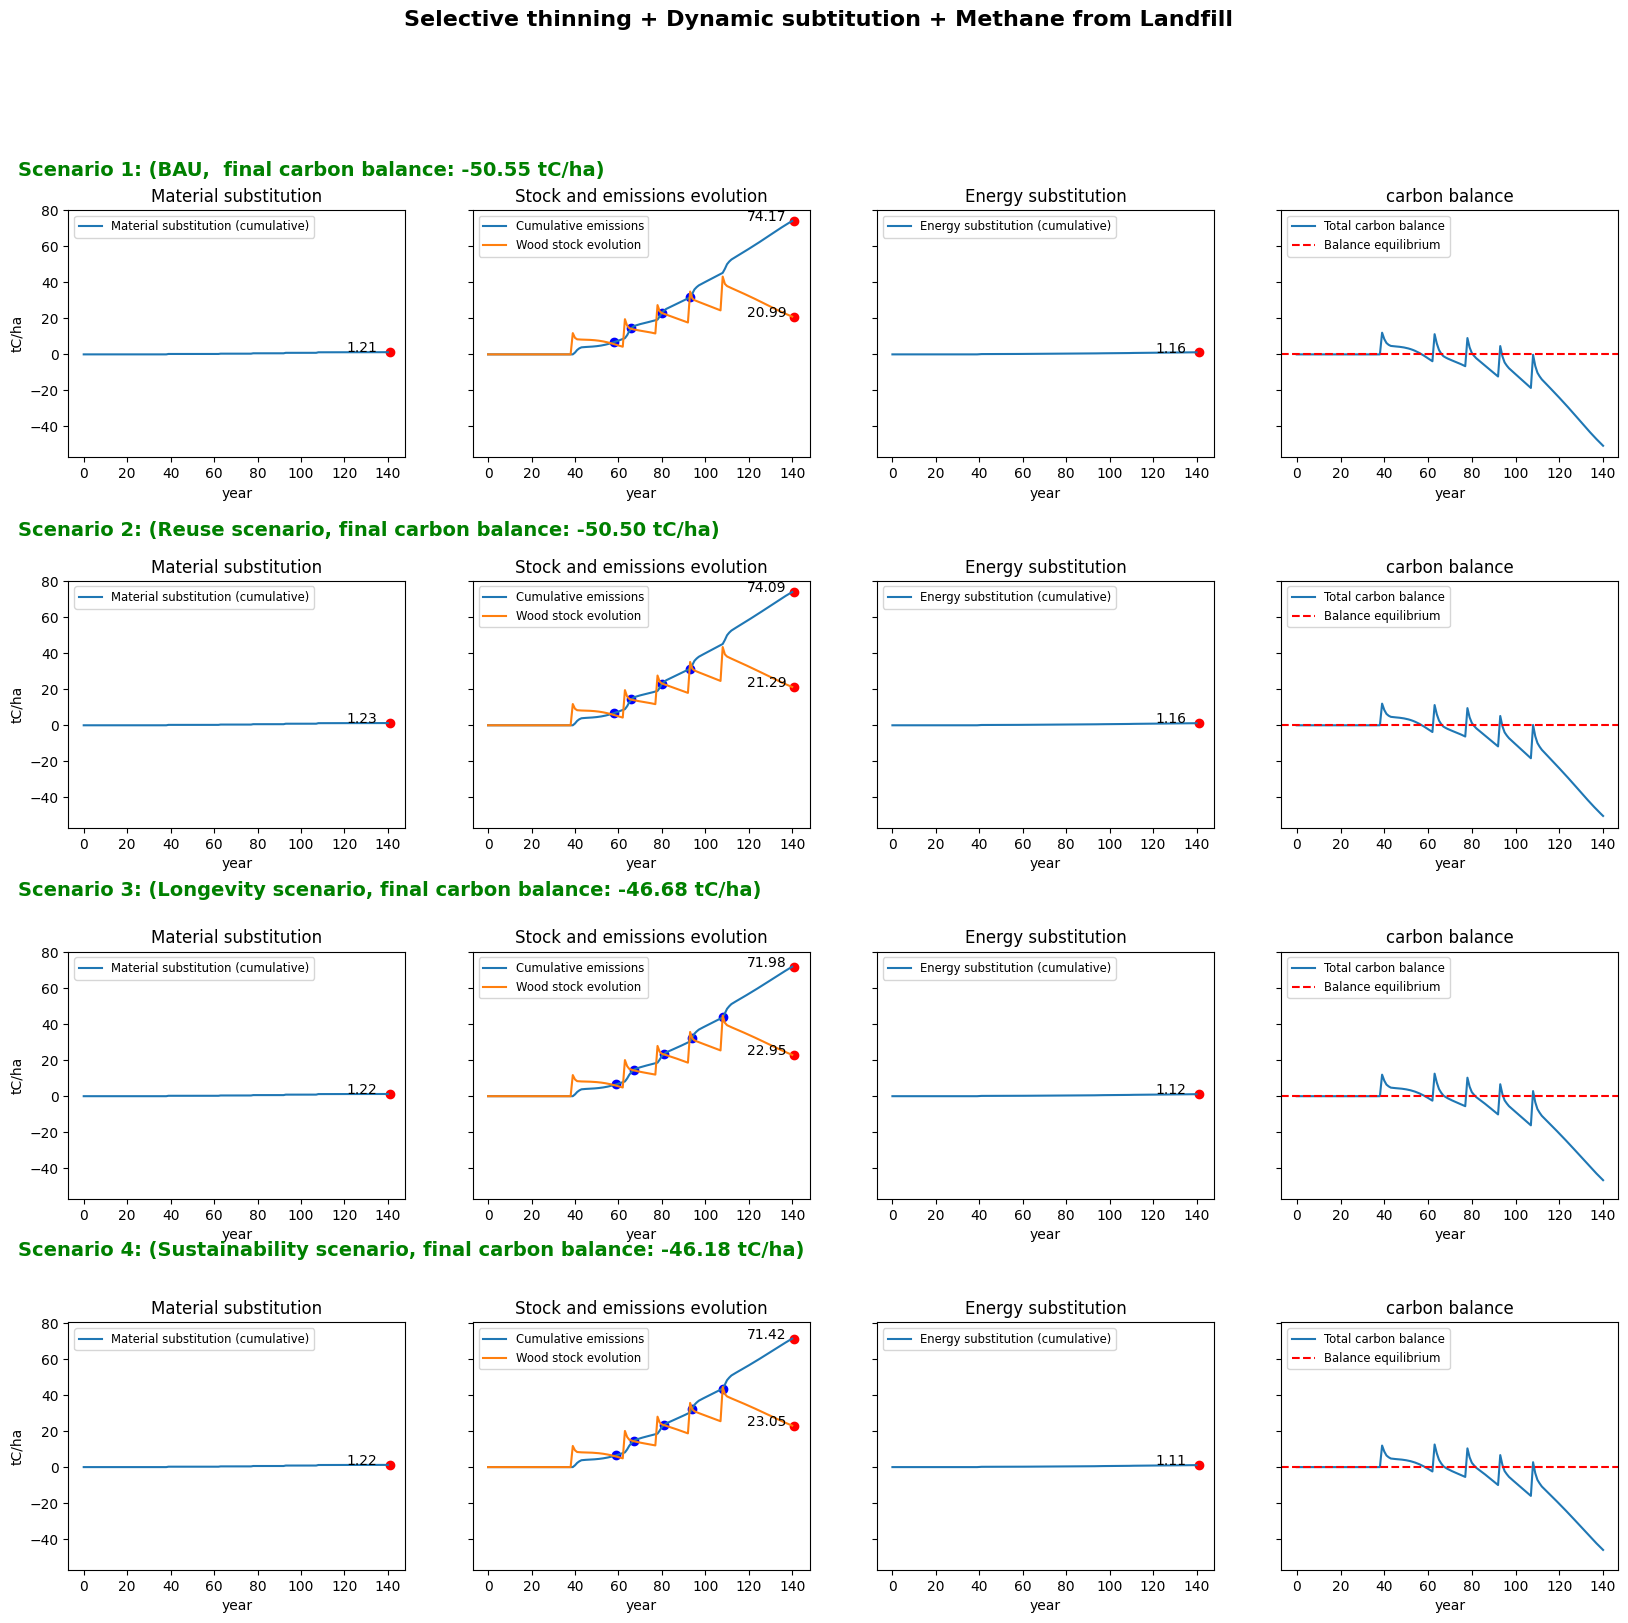

In [ ]:
# Create a figure and 16 subplots (4 for each dataframe)
fig, axes = plt.subplots(4, 4, figsize=(20, 20), sharey=True)

# Titles for each row
row_titles = [
    "Scenario 1: (BAU,  final carbon balance: -50.55 tC/ha)",
    "Scenario 2: (Reuse scenario, final carbon balance: -50.50 tC/ha)",
    "Scenario 3: (Longevity scenario, final carbon balance: -46.68 tC/ha)",
    "Scenario 4: (Sustainability scenario, final carbon balance: -46.18 tC/ha)"
]

# Loop over dataframes and corresponding subplots
for i, (df, ax_row, row_title) in enumerate(zip(dataframes_JARDIN, axes, row_titles)):
    # Set the row title using fig.text
    fig.text(0.1, 0.9 - i * 0.18, row_title, fontsize=14, ha='left', va='center', color='green', weight='bold')

    for j, ax in enumerate(ax_row):
        # Determine the type of plot to be shown in each column
        if j % 4 == 0:
            ax.plot(list(range(0, 141)), df['C_MSUB'], label="Material substitution (cumulative)")
            ax.scatter(141, df['C_MSUB'].iloc[-1], color='red')  # Highlight the last value
            ax.annotate(f"{df['C_MSUB'].iloc[-1]:.2f}", (141, df['C_MSUB'].iloc[-1]), textcoords="offset points", xytext=(-20, 0), ha='center')
            ax.set_title('Material substitution')  # You can customize the title as needed
            ax.set_xlabel('year')
            ax.set_ylabel('tC/ha')
            ax.legend(loc='upper left', fontsize='small')
        elif j % 4 == 1:
            ax.plot(list(range(0, 141)), df['C_Emissions'], label="Cumulative emissions")
            ax.plot(list(range(0, 141)), df['C_Stock'], label="Wood stock evolution")
            ax.scatter(141, df['C_Emissions'].iloc[-1], color='red')  # Highlight the last value
            ax.scatter(141, df['C_Stock'].iloc[-1], color='red')  # Highlight the last value

            if i<2:
              ax.scatter(58, df['C_Emissions'].iloc[58], color='blue')
              ax.scatter(66, df['C_Emissions'].iloc[66], color='blue')
              ax.scatter(80, df['C_Emissions'].iloc[80], color='blue')
              ax.scatter(93, df['C_Emissions'].iloc[93], color='blue')
              #ax.scatter(108, df['C_Emissions'].iloc[108], color='blue')
            else:
              ax.scatter(59, df['C_Emissions'].iloc[59], color='blue')
              ax.scatter(67, df['C_Emissions'].iloc[67], color='blue')
              ax.scatter(81, df['C_Emissions'].iloc[81], color='blue')
              ax.scatter(94, df['C_Emissions'].iloc[94], color='blue')
              ax.scatter(108, df['C_Emissions'].iloc[108], color='blue')

            ax.annotate(f"{df['C_Emissions'].iloc[-1]:.2f}", (141, df['C_Emissions'].iloc[-1]), textcoords="offset points", xytext=(-20, 0), ha='center')
            ax.annotate(f"{df['C_Stock'].iloc[-1]:.2f}", (141, df['C_Stock'].iloc[-1]), textcoords="offset points", xytext=(-20, 0), ha='center')
            ax.set_title('Stock and emissions evolution')  # You can customize the title as needed
            ax.set_xlabel('year')
            #ax.set_ylabel('tC/ha')
            ax.legend(loc='upper left', fontsize='small')
        elif j % 4 == 2:
            ax.plot(list(range(0, 141)), df['C_ESUB'], label='Energy substitution (cumulative)')
            ax.scatter(141, df['C_ESUB'].iloc[-1], color='red')  # Highlight the last value
            ax.annotate(f"{df['C_ESUB'].iloc[-1]:.2f}", (141, df['C_ESUB'].iloc[-1]), textcoords="offset points", xytext=(-20, 0), ha='center')
            ax.set_title('Energy substitution')  # You can customize the title as needed
            ax.set_xlabel('year')
            #ax.set_ylabel('tC/ha')
            ax.legend(loc='upper left', fontsize='small')
        elif j % 4 == 3:
            ax.plot(list(range(0, 141)), df['balance'], label='Total carbon balance')
            ax.axhline(y=0, color='red', linestyle='--', label='Balance equilibrium')
            #ax.scatter(142, df['C_ESUB'].iloc[-1], color='red')  # Highlight the last value
            #ax.annotate(f"{df['C_ESUB'].iloc[-1]:.2f}", (142, df['C_ESUB'].iloc[-1]), textcoords="offset points", xytext=(-20, 0), ha='center')
            ax.set_title('carbon balance')  # You can customize the title as needed
            ax.set_xlabel('year')
            #ax.set_ylabel('tC/ha')
            ax.legend(loc='upper left', fontsize='small')

# Adjust the subplot layout
plt.subplots_adjust(bottom=0.2, hspace=0.5)
fig.suptitle("Selective thinning + Dynamic subtitution + Methane from Landfill", fontsize=16, weight='bold')
#plt.savefig("Jardin_latest_year.png")
# Return the figure
plt.show()


In [ ]:
output11['balance'].iloc[-1], output21['balance'].iloc[-1], output31['balance'].iloc[-1], output41['balance'].iloc[-1]

(-56.64579078180131,
 -56.10725328386668,
 -51.602876596089644,
 -51.158072828939375)

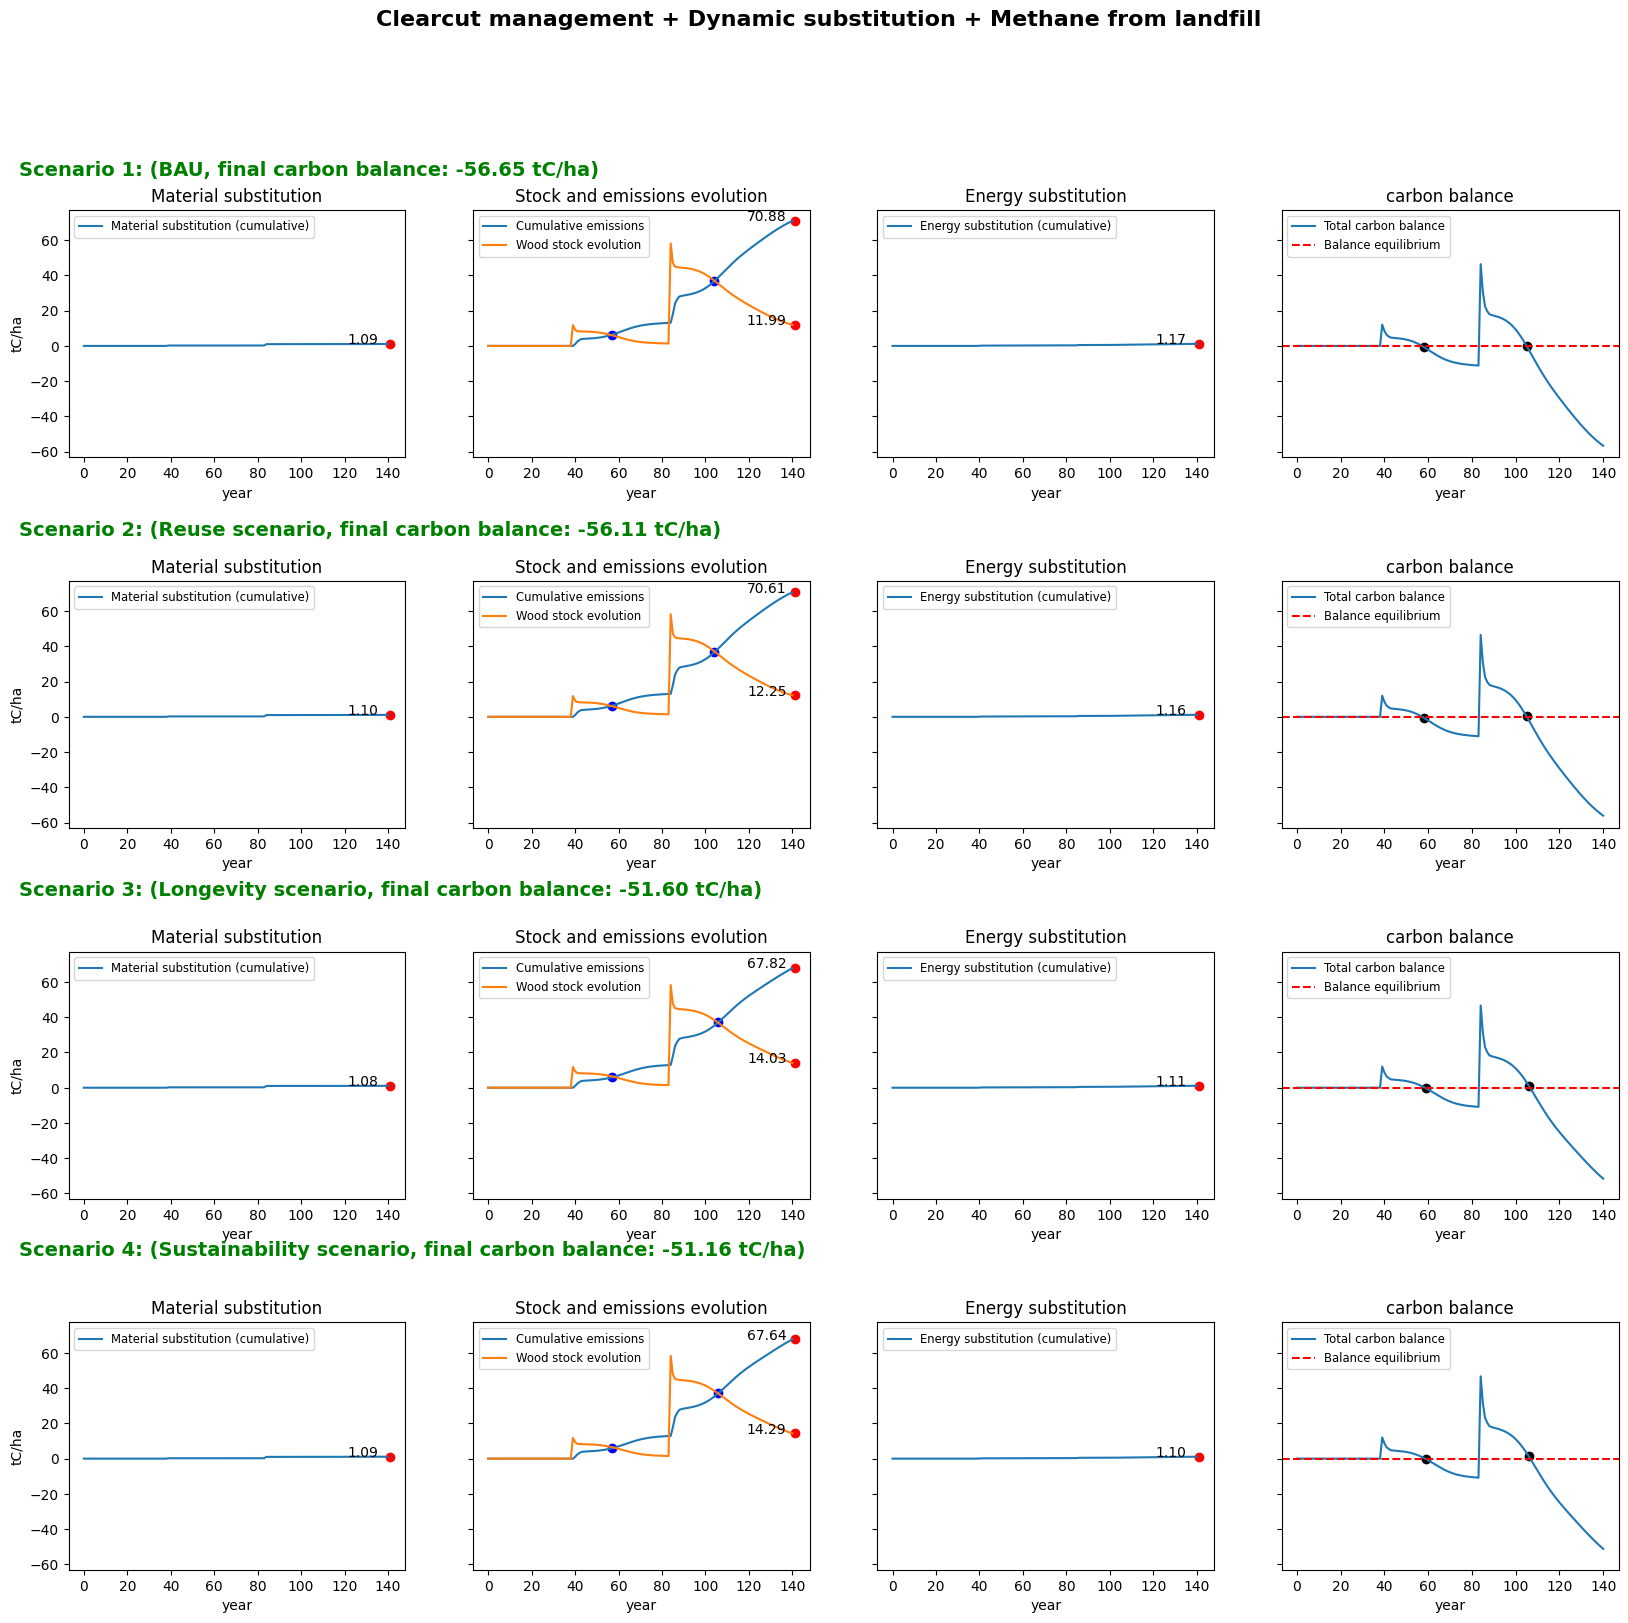

In [ ]:
# Create a figure and 16 subplots (4 for each dataframe)
fig, axes = plt.subplots(4, 4, figsize=(20, 20), sharey=True)

# Titles for each row
row_titles = [
    "Scenario 1: (BAU, final carbon balance: -56.65 tC/ha)",
    "Scenario 2: (Reuse scenario, final carbon balance: -56.11 tC/ha)",
    "Scenario 3: (Longevity scenario, final carbon balance: -51.60 tC/ha)",
    "Scenario 4: (Sustainability scenario, final carbon balance: -51.16 tC/ha)"
]

# Loop over dataframes and corresponding subplots
for i, (df, ax_row, row_title) in enumerate(zip(dataframes_CC, axes, row_titles)):
    # Set the row title using fig.text
    fig.text(0.1, 0.9 - i * 0.18, row_title, fontsize=14, ha='left', va='center', color='green', weight='bold')

    for j, ax in enumerate(ax_row):
        # Determine the type of plot to be shown in each column
        if j % 4 == 0:
            ax.plot(list(range(0, 141)), df['C_MSUB'], label="Material substitution (cumulative)")
            ax.scatter(141, df['C_MSUB'].iloc[-1], color='red')  # Highlight the last value
            ax.annotate(f"{df['C_MSUB'].iloc[-1]:.2f}", (141, df['C_MSUB'].iloc[-1]), textcoords="offset points", xytext=(-20, 0), ha='center')
            ax.set_title('Material substitution')  # You can customize the title as needed
            ax.set_xlabel('year')
            ax.set_ylabel('tC/ha')
            ax.legend(loc='upper left', fontsize='small')
        elif j % 4 == 1:
            ax.plot(list(range(0, 141)), df['C_Emissions'], label="Cumulative emissions")
            ax.plot(list(range(0, 141)), df['C_Stock'], label="Wood stock evolution")
            ax.scatter(141, df['C_Emissions'].iloc[-1], color='red')  # Highlight the last value
            ax.scatter(141, df['C_Stock'].iloc[-1], color='red')  # Highlight the last value
            if i<2:
              ax.scatter(57, df['C_Emissions'].iloc[57], color='blue')
              ax.scatter(104, df['C_Emissions'].iloc[104], color='blue')

            else:
              ax.scatter(57, df['C_Emissions'].iloc[57], color='blue')
              ax.scatter(106, df['C_Emissions'].iloc[106], color='blue')

            ax.annotate(f"{df['C_Emissions'].iloc[-1]:.2f}", (141, df['C_Emissions'].iloc[-1]), textcoords="offset points", xytext=(-20, 0), ha='center')
            ax.annotate(f"{df['C_Stock'].iloc[-1]:.2f}", (141, df['C_Stock'].iloc[-1]), textcoords="offset points", xytext=(-20, 0), ha='center')
            ax.set_title('Stock and emissions evolution')  # You can customize the title as needed
            ax.set_xlabel('year')
            #ax.set_ylabel('tC/ha')
            ax.legend(loc='upper left', fontsize='small')

        elif j % 4 == 2:
            ax.plot(list(range(0, 141)), df['C_ESUB'], label='Energy substitution (cumulative)')
            ax.scatter(141, df['C_ESUB'].iloc[-1], color='red')  # Highlight the last value
            ax.annotate(f"{df['C_ESUB'].iloc[-1]:.2f}", (141, df['C_ESUB'].iloc[-1]), textcoords="offset points", xytext=(-20, 0), ha='center')
            ax.set_title('Energy substitution')  # You can customize the title as needed
            ax.set_xlabel('year')
            #ax.set_ylabel('tC/ha')
            ax.legend(loc='upper left', fontsize='small')
        elif j % 4 == 3:
            ax.plot(list(range(0, 141)), df['balance'], label='Total carbon balance')
            ax.axhline(y=0, color='red', linestyle='--', label='Balance equilibrium')
            if i<2:
              ax.scatter(58, df['balance'].iloc[58], color='black')
              ax.scatter(105, df['balance'].iloc[105], color='black')

            else:
              ax.scatter(59, df['balance'].iloc[59], color='black')
              ax.scatter(106, df['balance'].iloc[106], color='black')
            #ax.scatter(142, df['C_ESUB'].iloc[-1], color='red')  # Highlight the last value
            #ax.annotate(f"{df['C_ESUB'].iloc[-1]:.2f}", (142, df['C_ESUB'].iloc[-1]), textcoords="offset points", xytext=(-20, 0), ha='center')
            ax.set_title('carbon balance')  # You can customize the title as needed
            ax.set_xlabel('year')
            #ax.set_ylabel('tC/ha')
            ax.legend(loc='upper left', fontsize='small')

# Adjust the subplot layout
plt.subplots_adjust(bottom=0.2, hspace=0.5)
fig.suptitle("Clearcut management + Dynamic substitution + Methane from landfill", fontsize=16, weight='bold')
#plt.savefig("CC_latest_year.png")
# Return the figure
plt.show()


In [ ]:
dataframes_SW[0]['balance'].iloc[-1], dataframes_SW[1]['balance'].iloc[-1], dataframes_SW[2]['balance'].iloc[-1], dataframes_SW[3]['balance'].iloc[-1]

(-75.61364050131165,
 -75.35155155508326,
 -69.91554944788285,
 -69.23019404440595)

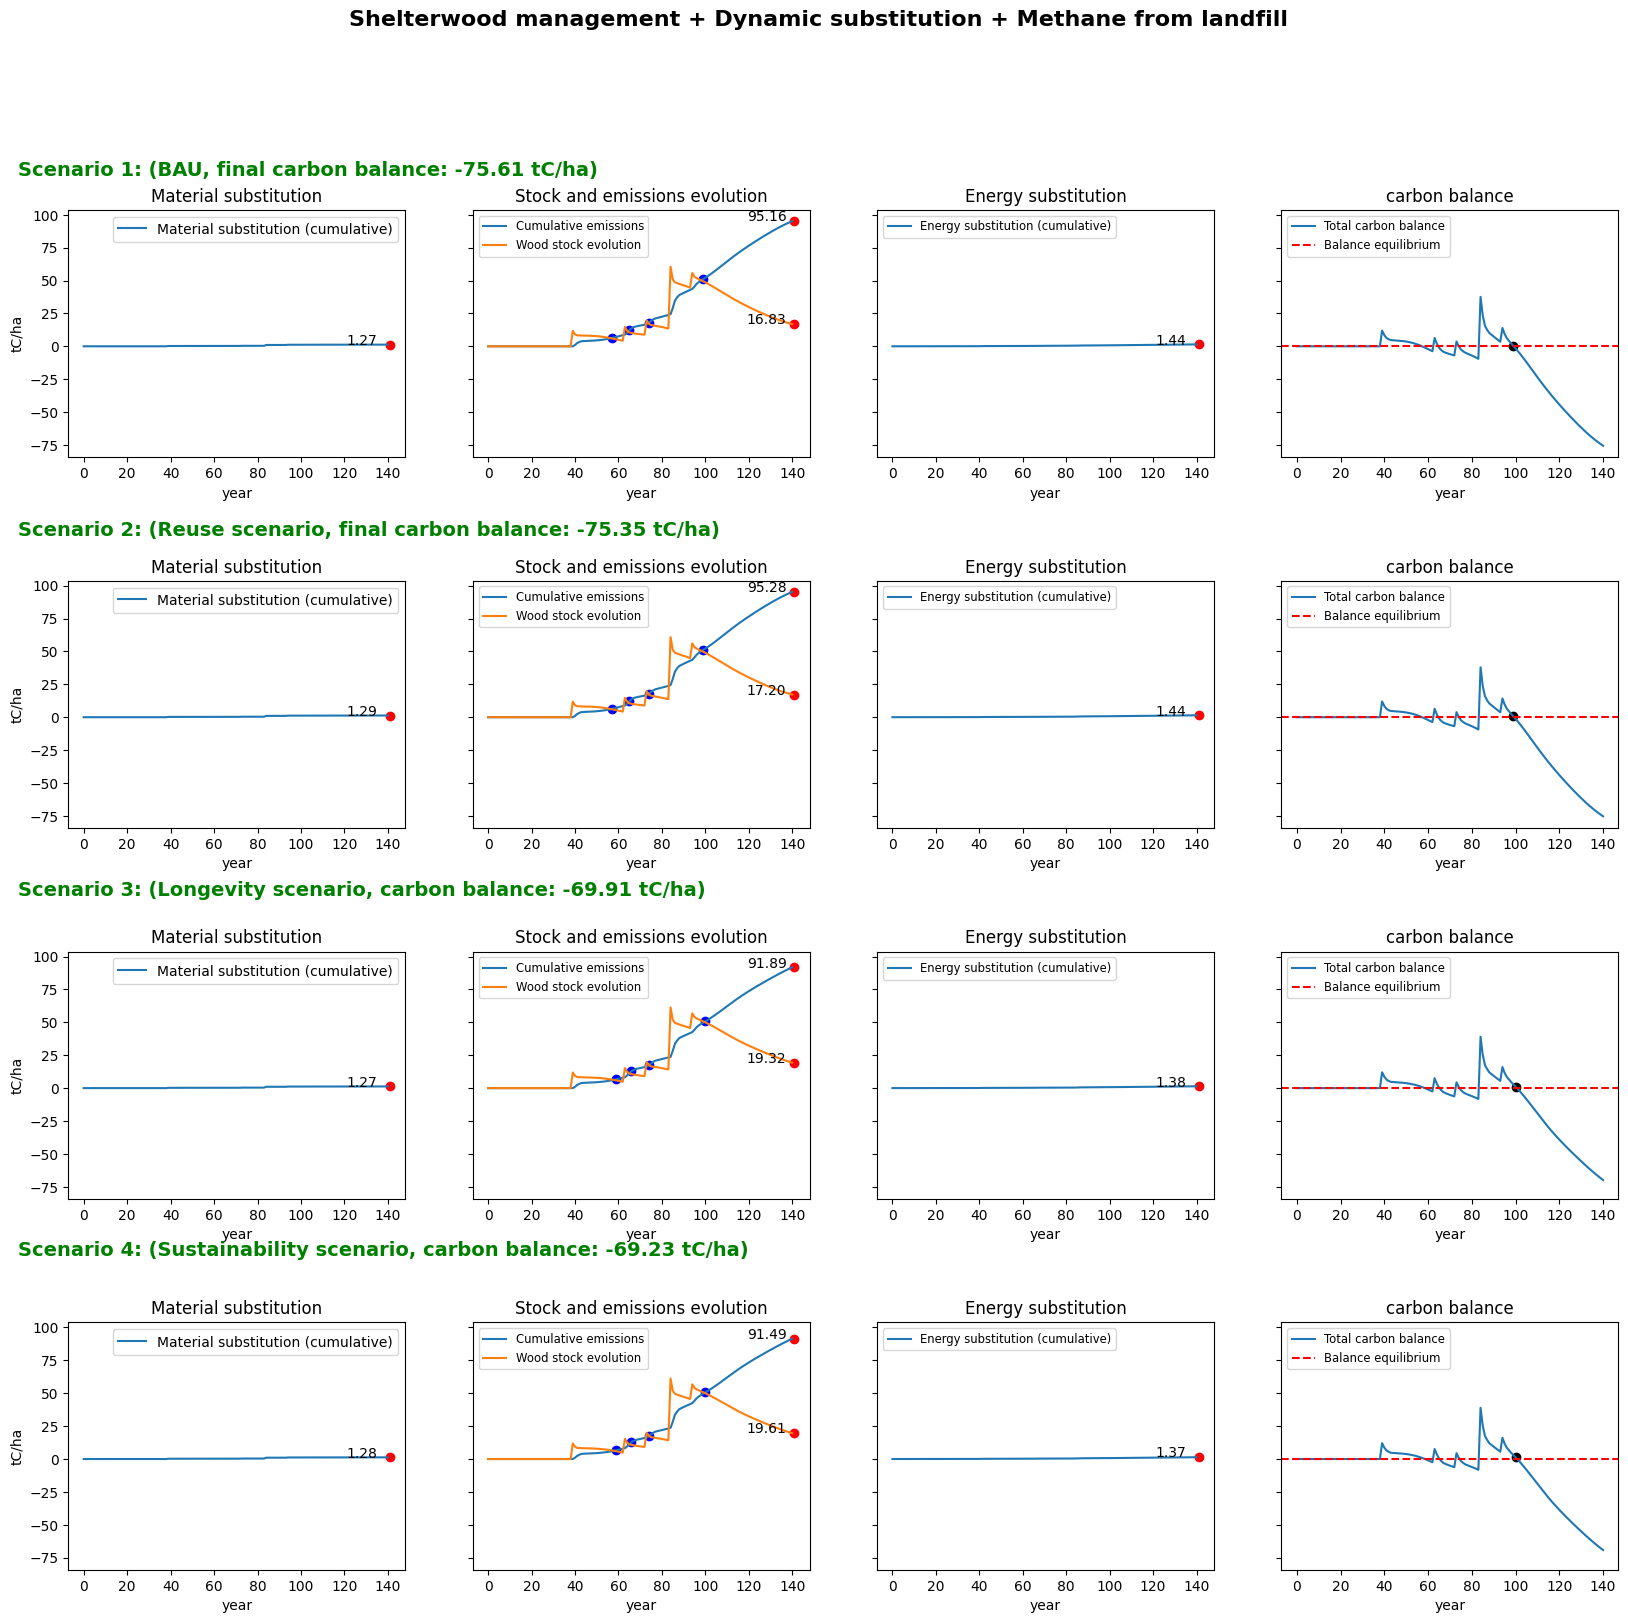

In [ ]:
# Create a figure and 16 subplots (4 for each dataframe)
fig, axes = plt.subplots(4, 4, figsize=(20, 20), sharey=True)

# Titles for each row
row_titles = [
    "Scenario 1: (BAU, final carbon balance: -75.61 tC/ha)",
    "Scenario 2: (Reuse scenario, final carbon balance: -75.35 tC/ha)",
    "Scenario 3: (Longevity scenario, carbon balance: -69.91 tC/ha)",
    "Scenario 4: (Sustainability scenario, carbon balance: -69.23 tC/ha)"
]

# Loop over dataframes and corresponding subplots
for i, (df, ax_row, row_title) in enumerate(zip(dataframes_SW, axes, row_titles)):
    # Set the row title using fig.text
    fig.text(0.1, 0.9 - i * 0.18, row_title, fontsize=14, ha='left', va='center', color='green', weight='bold')

    for j, ax in enumerate(ax_row):
        # Determine the type of plot to be shown in each column
        if j % 4 == 0:
            #ax.plot(range(1, 142), df['C_MSUB'], label="Material substitution (cumulative)")
            ax.plot(list(range(0, 141)), df['C_MSUB'], label="Material substitution (cumulative)")
            ax.scatter(141, df['C_MSUB'].iloc[-1], color='red')  # Highlight the last value
            ax.annotate(f"{df['C_MSUB'].iloc[-1]:.2f}", (141, df['C_MSUB'].iloc[-1]), textcoords="offset points", xytext=(-20, 0), ha='center')
            ax.set_title('Material substitution')  # You can customize the title as needed
            ax.set_xlabel('year')
            ax.set_ylabel('tC/ha')
            ax.legend()
        elif j % 4 == 1:
            #ax.plot(range(1, 142), df['C_Emissions'], label="Cumulative emissions")
            #ax.plot(range(1, 142), df['C_Stock'], label="Wood stock evolution")
            ax.plot(list(range(0, 141)), df['C_Emissions'], label="Cumulative emissions")
            ax.plot(list(range(0, 141)), df['C_Stock'], label="Wood stock evolution")
            ax.scatter(141, df['C_Emissions'].iloc[-1], color='red')  # Highlight the last value
            ax.scatter(141, df['C_Stock'].iloc[-1], color='red')  # Highlight the last value
            if i<2:
              #ax.scatter(59, df['C_Emissions'].iloc[58], color='blue')
              ax.scatter(57, df['C_Emissions'].iloc[57], color='blue')
              #ax.scatter(66, df['C_Emissions'].iloc[65], color='blue')
              ax.scatter(65, df['C_Emissions'].iloc[65], color='blue')
              #ax.scatter(76, df['C_Emissions'].iloc[75], color='blue')
              ax.scatter(74, df['C_Emissions'].iloc[74], color='blue')
              #ax.scatter(103, df['C_Emissions'].iloc[102], color='blue')
              ax.scatter(99, df['C_Emissions'].iloc[99], color='blue')


            else:
              #ax.scatter(60, df['C_Emissions'].iloc[59], color='blue')
              ax.scatter(59, df['C_Emissions'].iloc[59], color='blue')
              #ax.scatter(67, df['C_Emissions'].iloc[66], color='blue')
              ax.scatter(66, df['C_Emissions'].iloc[66], color='blue')
              #ax.scatter(76, df['C_Emissions'].iloc[75], color='blue')
              ax.scatter(74, df['C_Emissions'].iloc[74], color='blue')
              #ax.scatter(104, df['C_Emissions'].iloc[103], color='blue')
              ax.scatter(100, df['C_Emissions'].iloc[100], color='blue')
            ax.annotate(f"{df['C_Emissions'].iloc[-1]:.2f}", (141, df['C_Emissions'].iloc[-1]), textcoords="offset points", xytext=(-20, 0), ha='center')
            ax.annotate(f"{df['C_Stock'].iloc[-1]:.2f}", (141, df['C_Stock'].iloc[-1]), textcoords="offset points", xytext=(-20, 0), ha='center')
            ax.set_title('Stock and emissions evolution')  # You can customize the title as needed
            ax.set_xlabel('year')
            #ax.set_ylabel('tC/ha')
            ax.legend(loc='upper left', fontsize='small')
        elif j % 4 == 2:
            ax.plot(list(range(0, 141)), df['C_ESUB'], label='Energy substitution (cumulative)')
            ax.scatter(141, df['C_ESUB'].iloc[-1], color='red')  # Highlight the last value
            ax.annotate(f"{df['C_ESUB'].iloc[-1]:.2f}", (141, df['C_ESUB'].iloc[-1]), textcoords="offset points", xytext=(-20, 0), ha='center')
            ax.set_title('Energy substitution')  # You can customize the title as needed
            ax.set_xlabel('year')
            #ax.set_ylabel('tC/ha')
            ax.legend(loc='upper left', fontsize='small')
        elif j % 4 == 3:
            ax.plot(list(range(0, 141)), df['balance'], label='Total carbon balance')
            ax.axhline(y=0, color='red', linestyle='--', label='Balance equilibrium')
            if i==0:
              ax.scatter(99, df['balance'].iloc[99], color='black')
            elif i == 1:
                ax.scatter(99, df['balance'].iloc[99], color='black')

            else:
              ax.scatter(100, df['balance'].iloc[100], color='black')
            #ax.scatter(142, df['C_ESUB'].iloc[-1], color='red')  # Highlight the last value
            #ax.annotate(f"{df['C_ESUB'].iloc[-1]:.2f}", (142, df['C_ESUB'].iloc[-1]), textcoords="offset points", xytext=(-20, 0), ha='center')
            ax.set_title('carbon balance')  # You can customize the title as needed
            ax.set_xlabel('year')
            #ax.set_ylabel('tC/ha')
            ax.legend(loc='upper left', fontsize='small')

# Adjust the subplot layout
plt.subplots_adjust(bottom=0.2, hspace=0.5)
fig.suptitle("Shelterwood management + Dynamic substitution + Methane from landfill", fontsize=16, weight='bold')
#plt.savefig("shelter_latest_year.png")
# Return the figure
plt.show()


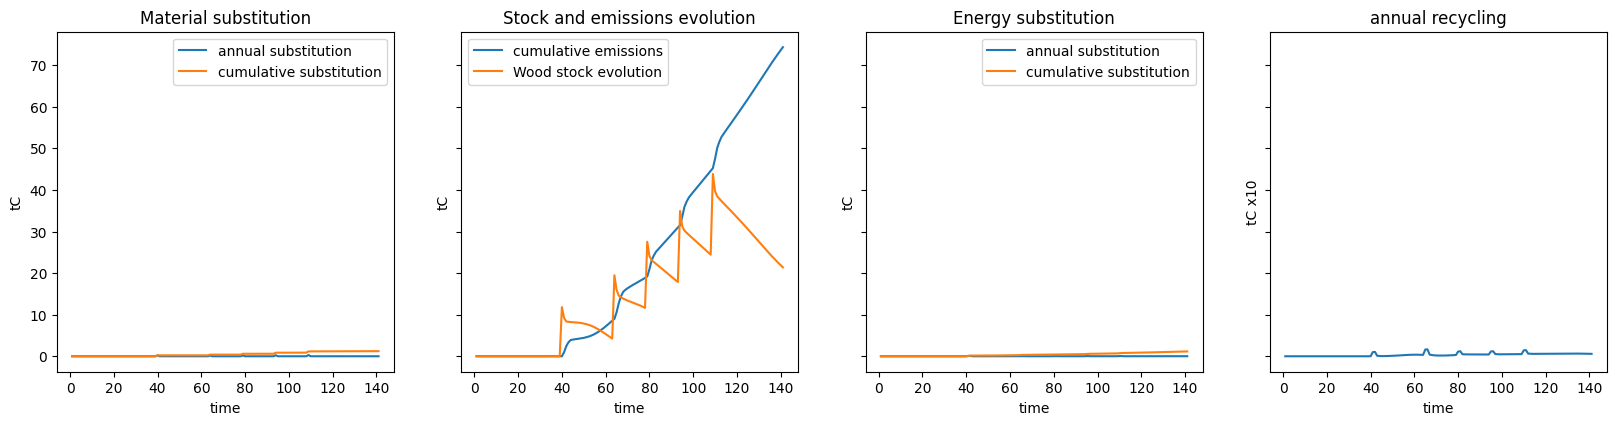

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and three subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

# Plot the first plot in the first subplot
axes[0].plot(range(1, 142), output1['Y_MSUB'], label="annual substitution")
axes[0].plot(range(1, 142), output1['C_MSUB'], label="cumulative substitution")
axes[0].set_title('Material substitution')# \n(Initial stock ~{} m3)'.format(elapsed_time))
axes[0].set_xlabel('time')
axes[0].set_ylabel('tC')
axes[0].legend()

# Plot the second plot in the second subplot
axes[1].plot(range(1, 142), output1['C_Emissions'], label="cumulative emissions")
axes[1].plot(range(1, 142), output1['C_Stock'], label="Wood stock evolution")
axes[1].set_title('Stock and emissions evolution')# \n(Initial stock ~{} m3)'.format(elapsed_time))
axes[1].set_xlabel('time')
axes[1].set_ylabel('tC')
axes[1].legend()

# Plot the third plot in the third subplot
axes[2].plot(range(1, 142), output1['Y_ESUB'], label='annual substitution')
axes[2].plot(range(1, 142), output1['C_ESUB'], label='cumulative substitution')
axes[2].set_title('Energy substitution')# \n(Initial stock ~{} m3)'.format(elapsed_time))
axes[2].set_xlabel('time')
axes[2].set_ylabel('tC')
axes[2].legend()

# Plot the fourth plot in the fourth subplot
axes[3].plot(range(1, 142), output1['Y_REC'])
axes[3].set_title('annual recycling') #\n(Initial stock ~{} m3)'.format(elapsed_time))
axes[3].set_xlabel('time')
axes[3].set_ylabel('tC x10')

# Adjust the subplot layout
plt.subplots_adjust(bottom=0.2)

# Return the fi

In [ ]:
sim_jardin_BAU = run_model(scale = 20.33, shape= 5.65, class_width = 1 , tolerance_g = 0.3, a1 = 0.6626, a2 = 0.8769, b1= 0.9712, b2 = -0.2774, b3 = 1.1107, b4 = 26.4390,
          a = 0.7, c = 1, alpha = 0.04, beta = 2.10, tolerance_hfind = 0.0001, efficiency = efficiency , loss_allocation = loss_allocation , recycling = recycling_BAU,
          substitution_matrix = substitution_matrix, decay = decay, PH = 141, R = 0, management_dic = management_jardin)

In [ ]:
import time
startime = time.time()
reslt1 = run_model(scale = 20.33, shape= 5.65, class_width = 1 , tolerance_g = 0.3, a1 = 0.6626, a2 = 0.8769, b1= 0.9712, b2 = -0.2774, b3 = 1.1107, b4 = 26.4390,
          a = 0.7, c = 1, alpha = 0.04, beta = 2.10, tolerance_hfind = 0.0001, efficiency = efficiency , loss_allocation = loss_allocation , recycling = recycling,
          substitution_matrix = substitution_matrix, decay = decay, PH = 300, R = 100, management_dic = management_sim)
endtime = time.time()
elapsed_time = (endtime - startime)/60
print(elapsed_time)

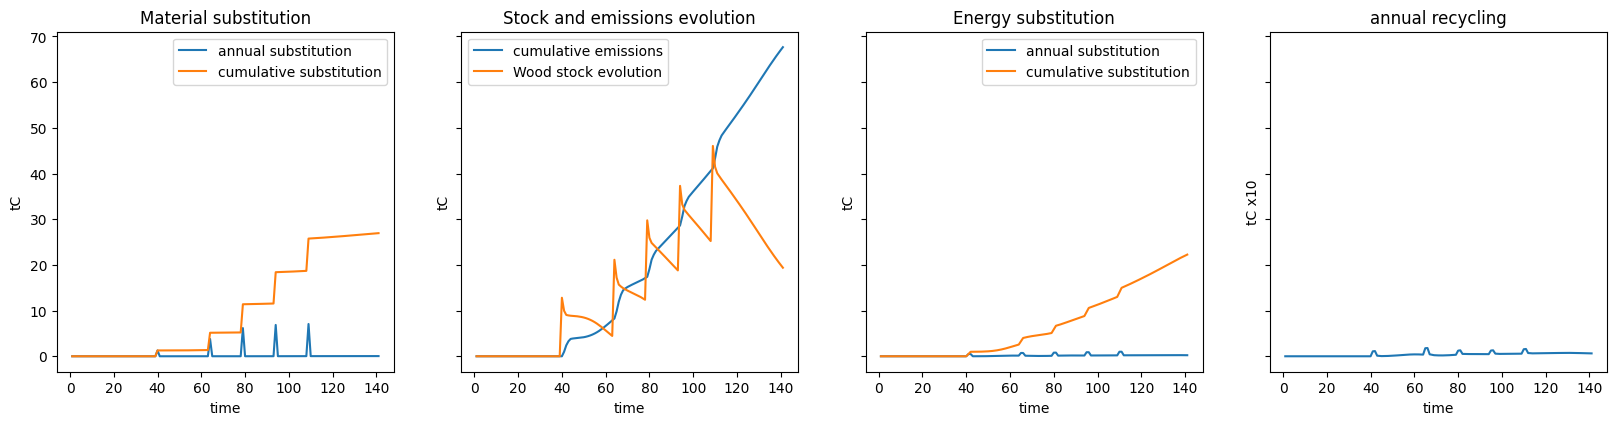

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and three subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

# Plot the first plot in the first subplot
axes[0].plot(range(1, 142), sim_jardin_BAU['Y_MSUB'], label="annual substitution")
axes[0].plot(range(1, 142), sim_jardin_BAU['C_MSUB'], label="cumulative substitution")
axes[0].set_title('Material substitution')# \n(Initial stock ~{} m3)'.format(elapsed_time))
axes[0].set_xlabel('time')
axes[0].set_ylabel('tC')
axes[0].legend()

# Plot the second plot in the second subplot
axes[1].plot(range(1, 142), sim_jardin_BAU['C_Emissions'], label="cumulative emissions")
axes[1].plot(range(1, 142), sim_jardin_BAU['C_Stock'], label="Wood stock evolution")
axes[1].set_title('Stock and emissions evolution')# \n(Initial stock ~{} m3)'.format(elapsed_time))
axes[1].set_xlabel('time')
axes[1].set_ylabel('tC')
axes[1].legend()

# Plot the third plot in the third subplot
axes[2].plot(range(1, 142), sim_jardin_BAU['Y_ESUB'], label='annual substitution')
axes[2].plot(range(1, 142), sim_jardin_BAU['C_ESUB'], label='cumulative substitution')
axes[2].set_title('Energy substitution')# \n(Initial stock ~{} m3)'.format(elapsed_time))
axes[2].set_xlabel('time')
axes[2].set_ylabel('tC')
axes[2].legend()

# Plot the fourth plot in the fourth subplot
axes[3].plot(range(1, 142), sim_jardin_BAU['Y_REC'])
axes[3].set_title('annual recycling') #\n(Initial stock ~{} m3)'.format(elapsed_time))
axes[3].set_xlabel('time')
axes[3].set_ylabel('tC x10')

# Adjust the subplot layout
plt.subplots_adjust(bottom=0.2)

# Return the figure
plt.show()


In [ ]:
reslt1

C_Stock  Y_Emissions  C_Emissions    Y_ESUB     C_ESUB    Y_MSUB  \
0    0.000000     0.000000     0.000000  0.000000   0.000000  0.000000   
1    0.000000     0.000000     0.000000  0.000000   0.000000  0.000000   
2    0.000000     0.000000     0.000000  0.000000   0.000000  0.000000   
3    0.000000     0.000000     0.000000  0.000000   0.000000  0.000000   
4    0.000000     0.000000     0.000000  0.000000   0.000000  0.000000   
..        ...          ...          ...       ...        ...       ...   
295  0.217590     0.009603    90.387840  0.001774  31.206673  0.000144   
296  0.208560     0.009213    90.397054  0.001716  31.208389  0.000137   
297  0.199901     0.008838    90.405892  0.001659  31.210048  0.000132   
298  0.191598     0.008477    90.414369  0.001604  31.211652  0.000126   
299  0.183637     0.008130    90.422499  0.001551  31.213203  0.000120   

        C_MSUB     Y_REC  
0     0.000000  0.000000  
1     0.000000  0.000000  
2     0.000000  0.000000  
3     0.000000  0.000000  
4     0.000000  0.000000  
..         ...       ...  
295  33.924138  0.004747  
296  33.924275  0.004590  
297  33.924407  0.004438  
298  33.924533  0.004289  
299  33.924653  0.004144  

[300 rows x 8 columns]

In [ ]:
"""import pandas as pd

def run_model(scale, shape, class_width, tolerance_g, a1, a2, b1, b2, b3, b4, a, c, alpha, beta, tolerance_hfind, efficiency,
              loss_allocation, recycling, substitution_matrix, decay, PH, R, management_dic):

    result_df = pd.DataFrame()

    for i in range(len(next(iter(management_dic.values())))):
        dico = {key: value[i] for key, value in management_dic.items()}
        PP = PH - (dico.get('N_rotation') - 1)* R - dico.get('age')
        RP = PH - PP

        first_step = dendrometer(scale=scale, shape=shape, total_population=dico['total_pop'], class_width=class_width, DBH=dico['DBH'])
        second_step = perform_thinning(trees_df=first_step, thinning_type=dico['thinning_type'], target_sum=dico['target_sum'], tolerance=tolerance_g)
        second_step = first_step[first_step['ID'].isin(second_step)]
        third_step = second_step.apply(lambda row: bucking_allocation(dbh=row['Diameter_Center'], ht=row['Height_Center'], a1=a1, a2=a2, b1=b1, b2=b2, b3=b3, b4=b4, bark=dico['bark'], a=a, c=c, alpha=alpha, beta=beta, DBH=dico['DBH'], sap_area=dico['sap_area'], heart_area=dico['heart_area'], tolerance=tolerance_hfind), axis=1)

        resultat = pd.concat(third_step.tolist())
        resultat = resultat.groupby('product')['volume'].sum().reset_index()

        resultat_reallocation = processor(resultat, efficiency=efficiency, loss_allocation=loss_allocation)

        list0 = [0] * (PH - PP)
        f = list0 + total_stock_calculator(resultat_reallocation, recycling, decay, PP)
        f1 = list0 + total_emission_calculator(resultat_reallocation, recycling, decay, PP)
        s1 = list0 + energy_sub(resultat_reallocation, recycling, substitution_matrix, decay, C_CO2, PP)
        s3 = list0 + material_sub(resultat_reallocation, recycling, substitution_matrix, decay, C_CO2, PP)
        rec = list0 + total_recycling_calculator(resultat_reallocation, recycling, decay, PP)

        f2 = [0]
        s2 = [s3[0]]
        s4 = [s1[0]]

        for j in range(2, PP + 1):
            f2.append(f2[j - 2] + f1[j - 1])
            s2.append(s2[j - 2] + s3[j - 1])
            s4.append(s4[j - 2] + s1[j - 1])

        f2 = list0 + f2
        s2 = list0 + s2
        s4 = list0 + s4

        df = pd.DataFrame({'C_Stock': f, 'Y_Emissions': f1, 'C_Emissions': f2, 'Y_ESUB': s1, 'C_ESUB': s4, 'Y_MSUB': s3, 'C_MSUB': s2, 'Y_REC': rec})
        result_df = result_df.add(df, fill_value=0)

    return result_df


run_model(scale = 20.33, shape= 5.65, class_width = 1 , tolerance_g = 0.3, a1 = 0.6626, a2 = 0.8769, b1= 0.9712, b2 = -0.2774, b3 = 1.1107, b4 = 26.4390,
          a = 0.7, c = 1, alpha = 0.04, beta = 2.10, tolerance_hfind = 0.0001, efficiency = efficiency , loss_allocation = loss_allocation , recycling = recycling,
          substitution_matrix = substitution_matrix, decay = decay, PH = 300, R = 100, management_dic = management_sim)
"""

"import pandas as pd\n\ndef run_model(scale, shape, class_width, tolerance_g, a1, a2, b1, b2, b3, b4, a, c, alpha, beta, tolerance_hfind, efficiency,\n              loss_allocation, recycling, substitution_matrix, decay, PH, R, management_dic):\n  \n    result_df = pd.DataFrame()\n\n    for i in range(len(next(iter(management_dic.values())))):\n        dico = {key: value[i] for key, value in management_dic.items()}\n        PP = PH - (dico.get('N_rotation') - 1)* R - dico.get('age')\n        RP = PH - PP\n\n        first_step = dendrometer(scale=scale, shape=shape, total_population=dico['total_pop'], class_width=class_width, DBH=dico['DBH'])\n        second_step = perform_thinning(trees_df=first_step, thinning_type=dico['thinning_type'], target_sum=dico['target_sum'], tolerance=tolerance_g)\n        second_step = first_step[first_step['ID'].isin(second_step)]\n        third_step = second_step.apply(lambda row: bucking_allocation(dbh=row['Diameter_Center'], ht=row['Height_Center'], a1=a

## Study case for the research paper on the conception of TimberTracer v.0.1

Management scenarios (3)

In [ ]:
management_jardin = {"N_rotation": [1, 1, 1, 1, 1],
               "age": [39, 63, 78, 93, 108],
               "total_pop" : [1396, 532, 314, 192, 123],
               "target_sum": [10.47, 11.70, 11.68, 11.69, 11.53],
               "DBH": [19.54, 31.61, 41.12, 52.61, 65.3],
               "bark": [1.5, 1.5, 1.5, 1.5, 1.5],
               "sap_area": [199.72, 412.95, 634, 979, 1415],
               "heart_area": [100.31, 372.21, 693, 1195, 1933],
               "thinning_type": ['above', 'above', 'above', 'above', 'above']}

management_clearcut = {"N_rotation": [1, 1],
               "age": [39, 84],
               "total_pop" : [1396, 275],
               "target_sum": [10.47, 41.83],
               "DBH": [19.54, 44.01],
               "bark": [1.5, 1.5],
               "sap_area": [199.72, 698.16],
               "heart_area": [100.31, 823.18],
               "thinning_type": ['above', 'neutral']}


management_shelter = {"N_rotation": [1, 1, 1, 1, 1],
               "age": [39, 63, 73, 84, 94],
               "total_pop" : [1396, 532, 376, 261, 52],
               "target_sum": [10.47, 8.35, 8.38, 33.44, 14.51],
               "DBH": [19.54, 31.62, 37.67, 45.16, 59.61],
               "bark": [1.5, 1.5, 1.5, 1.5, 1.5],
               "sap_area": [199.72, 412.95, 550.07,750.85, 1552.51],
               "heart_area": [100.31, 372.21, 564.51, 851.08, 1238.62],
               "thinning_type": ['above', 'bottom', 'bottom', 'neutral', 'neutral']}

Wood use scenarios (4)

In [ ]:
recycling_BAU = {"furniture": {'r': 0.1, 'ls': 40 , 'fire': 0.8 , 'landfill': 0.1},
             "lumber": {'r': 0.1, 'ls': 60, 'fire': 0.8, 'landfill': 0.1},
             "paper": {'r': 0.1, 'ls': 1, 'fire': 0.8, 'landfill': 0.1},
             "sawing": {'r': 0.1, 'ls': 50, 'fire': 0.8, 'landfill': 0.1},
             "particle": {'r': 0.1, 'ls': 20, 'fire': 0.8 , 'landfill': 0.1}}

recycling_RR10 = {"furniture": {'r': 0.11, 'ls': 40 , 'fire': 0.79 , 'landfill': 0.1},
             "lumber": {'r': 0.11, 'ls': 60, 'fire': 0.79, 'landfill': 0.1},
             "paper": {'r': 0.11, 'ls': 1, 'fire': 0.79, 'landfill': 0.1},
             "sawing": {'r': 0.11, 'ls': 50, 'fire': 0.79, 'landfill': 0.1},
             "particle": {'r': 0.11, 'ls': 20, 'fire': 0.79 , 'landfill': 0.1}}

recycling_LS10 = {"furniture": {'r': 0.1, 'ls': 44 , 'fire': 0.8 , 'landfill': 0.1},
             "lumber": {'r': 0.1, 'ls': 66, 'fire': 0.8, 'landfill': 0.1},
             "paper": {'r': 0.1, 'ls': 1.1, 'fire': 0.8, 'landfill': 0.1},
             "sawing": {'r': 0.1, 'ls': 55, 'fire': 0.8, 'landfill': 0.1},
             "particle": {'r': 0.1, 'ls': 22, 'fire': 0.8 , 'landfill': 0.1}}

recycling_RRLS10 = {"furniture": {'r': 0.11, 'ls': 44 , 'fire': 0.79 , 'landfill': 0.1},
             "lumber": {'r': 0.11, 'ls': 66, 'fire': 0.79, 'landfill': 0.1},
             "paper": {'r': 0.11, 'ls': 1.1, 'fire': 0.79, 'landfill': 0.1},
             "sawing": {'r': 0.11, 'ls': 55, 'fire': 0.79, 'landfill': 0.1},
             "particle": {'r': 0.11, 'ls': 22, 'fire': 0.79, 'landfill': 0.1}}

Simulations (3x4)

In [ ]:
sim_jardin_BAU = run_model(scale = 20.33, shape= 5.65, class_width = 1 , tolerance_g = 0.3, a1 = 0.6626, a2 = 0.8769, b1= 0.9712, b2 = -0.2774, b3 = 1.1107, b4 = 26.4390,
          a = 0.7, c = 1, alpha = 0.04, beta = 2.10, tolerance_hfind = 0.0001, efficiency = efficiency , loss_allocation = loss_allocation , recycling = recycling_BAU,
          substitution_matrix = substitution_matrix, decay = decay, PH = 141, R = 0, management_dic = management_jardin)

In [ ]:
sim_jardin_BAU['balance'] = sim_jardin_BAU["C_Stock"] + sim_jardin_BAU["C_ESUB"] + sim_jardin_BAU["C_MSUB"] - sim_jardin_BAU["C_Emissions"]

In [ ]:
sim_jardin_RR10 = run_model(scale = 20.33, shape= 5.65, class_width = 1 , tolerance_g = 0.3, a1 = 0.6626, a2 = 0.8769, b1= 0.9712, b2 = -0.2774, b3 = 1.1107, b4 = 26.4390,
          a = 0.7, c = 1, alpha = 0.04, beta = 2.10, tolerance_hfind = 0.0001, efficiency = efficiency , loss_allocation = loss_allocation , recycling = recycling_RR10,
          substitution_matrix = substitution_matrix, decay = decay, PH = 141, R = 0, management_dic = management_jardin)

In [ ]:
sim_jardin_RR10['balance'] = sim_jardin_RR10["C_Stock"] + sim_jardin_RR10["C_ESUB"] + sim_jardin_RR10["C_MSUB"] - sim_jardin_RR10["C_Emissions"]

In [ ]:
sim_jardin_LS10 = run_model(scale = 20.33, shape= 5.65, class_width = 1 , tolerance_g = 0.3, a1 = 0.6626, a2 = 0.8769, b1= 0.9712, b2 = -0.2774, b3 = 1.1107, b4 = 26.4390,
          a = 0.7, c = 1, alpha = 0.04, beta = 2.10, tolerance_hfind = 0.0001, efficiency = efficiency , loss_allocation = loss_allocation , recycling = recycling_LS10,
          substitution_matrix = substitution_matrix, decay = decay, PH = 141, R = 0, management_dic = management_jardin)

In [ ]:
sim_jardin_LS10['balance'] = sim_jardin_LS10["C_Stock"] + sim_jardin_LS10["C_ESUB"] + sim_jardin_LS10["C_MSUB"] - sim_jardin_LS10["C_Emissions"]

In [ ]:
sim_jardin_RRLS10 = run_model(scale = 20.33, shape= 5.65, class_width = 1 , tolerance_g = 0.3, a1 = 0.6626, a2 = 0.8769, b1= 0.9712, b2 = -0.2774, b3 = 1.1107, b4 = 26.4390,
          a = 0.7, c = 1, alpha = 0.04, beta = 2.10, tolerance_hfind = 0.0001, efficiency = efficiency , loss_allocation = loss_allocation , recycling = recycling_RRLS10,
          substitution_matrix = substitution_matrix, decay = decay, PH = 141, R = 0, management_dic = management_jardin)

In [ ]:
sim_jardin_RRLS10['balance'] = sim_jardin_RRLS10["C_Stock"] + sim_jardin_RRLS10["C_ESUB"] + sim_jardin_RRLS10["C_MSUB"] - sim_jardin_RRLS10["C_Emissions"]

In [ ]:
dataframes = [sim_jardin_BAU, sim_jardin_RR10, sim_jardin_LS10, sim_jardin_RRLS10]

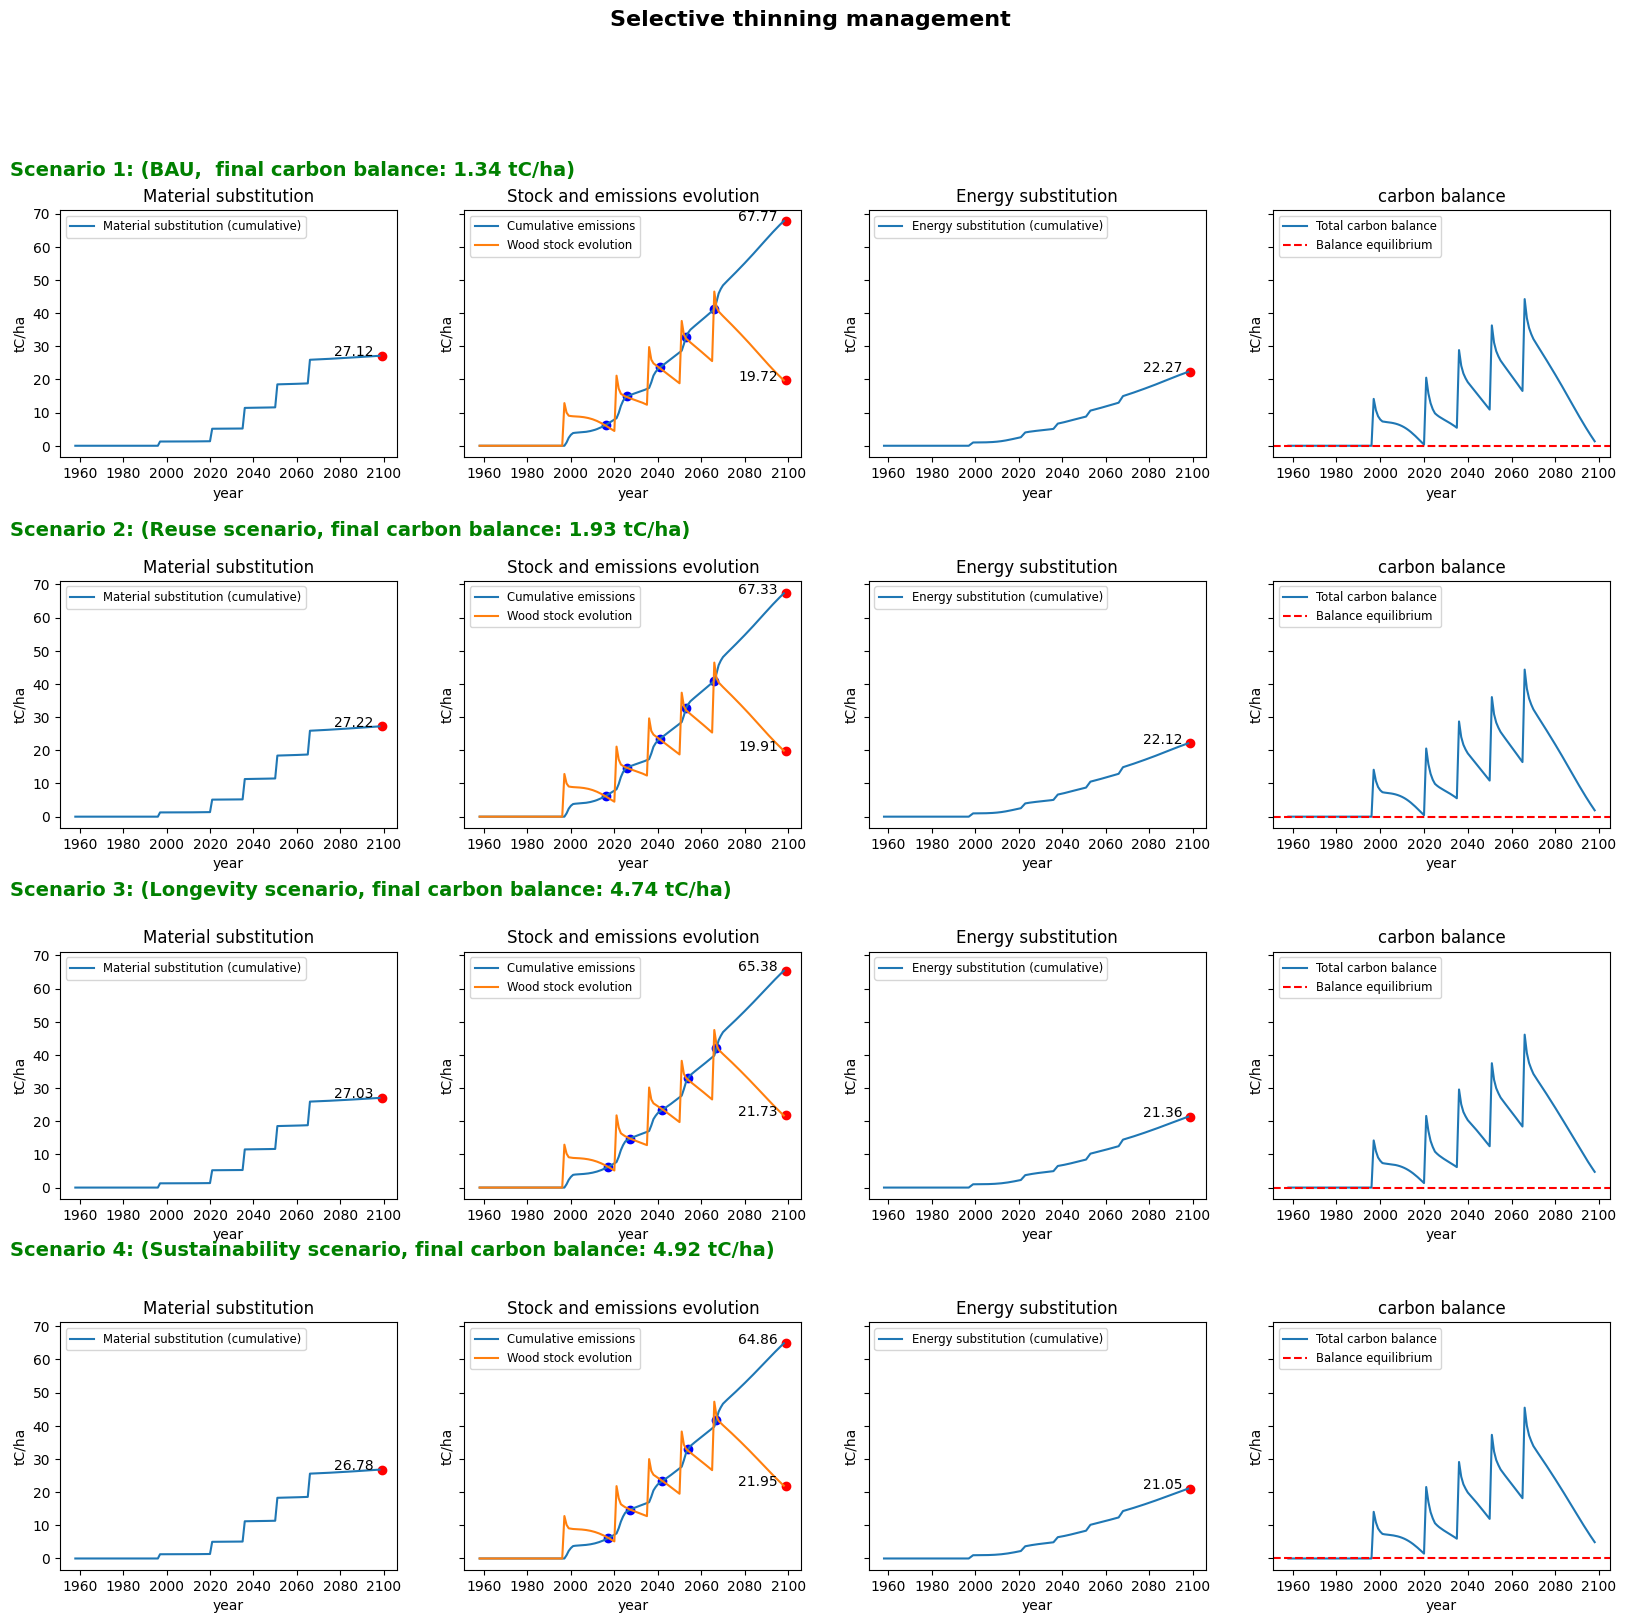

In [ ]:
# Create a figure and 16 subplots (4 for each dataframe)
fig, axes = plt.subplots(4, 4, figsize=(20, 20), sharey=True)

# Titles for each row
row_titles = [
    "Scenario 1: (BAU,  final carbon balance: 1.34 tC/ha)",
    "Scenario 2: (Reuse scenario, final carbon balance: 1.93 tC/ha)",
    "Scenario 3: (Longevity scenario, final carbon balance: 4.74 tC/ha)",
    "Scenario 4: (Sustainability scenario, final carbon balance: 4.92 tC/ha)"
]

# Loop over dataframes and corresponding subplots
for i, (df, ax_row, row_title) in enumerate(zip(dataframes, axes, row_titles)):
    # Set the row title using fig.text
    fig.text(0.1, 0.9 - i * 0.18, row_title, fontsize=14, ha='left', va='center', color='green', weight='bold')

    for j, ax in enumerate(ax_row):
        # Determine the type of plot to be shown in each column
        if j % 4 == 0:
            ax.plot(list(range(1958, 2099)), df['C_MSUB'], label="Material substitution (cumulative)")
            ax.scatter(2099, df['C_MSUB'].iloc[-1], color='red')  # Highlight the last value
            ax.annotate(f"{df['C_MSUB'].iloc[-1]:.2f}", (2099, df['C_MSUB'].iloc[-1]), textcoords="offset points", xytext=(-20, 0), ha='center')
            ax.set_title('Material substitution')  # You can customize the title as needed
            ax.set_xlabel('year')
            ax.set_ylabel('tC/ha')
            ax.legend(loc='upper left', fontsize='small')
        elif j % 4 == 1:
            ax.plot(list(range(1958, 2099)), df['C_Emissions'], label="Cumulative emissions")
            ax.plot(list(range(1958, 2099)), df['C_Stock'], label="Wood stock evolution")
            ax.scatter(2099, df['C_Emissions'].iloc[-1], color='red')  # Highlight the last value
            ax.scatter(2099, df['C_Stock'].iloc[-1], color='red')  # Highlight the last value

            if i<2:
              ax.scatter(2016, df['C_Emissions'].iloc[58], color='blue')
              ax.scatter(2026, df['C_Emissions'].iloc[68], color='blue')
              ax.scatter(2041, df['C_Emissions'].iloc[83], color='blue')
              ax.scatter(2053, df['C_Emissions'].iloc[95], color='blue')
              ax.scatter(2066, df['C_Emissions'].iloc[108], color='blue')
            else:
              ax.scatter(2017, df['C_Emissions'].iloc[59], color='blue')
              ax.scatter(2027, df['C_Emissions'].iloc[69], color='blue')
              ax.scatter(2042, df['C_Emissions'].iloc[84], color='blue')
              ax.scatter(2054, df['C_Emissions'].iloc[96], color='blue')
              ax.scatter(2067, df['C_Emissions'].iloc[109], color='blue')

            ax.annotate(f"{df['C_Emissions'].iloc[-1]:.2f}", (2099, df['C_Emissions'].iloc[-1]), textcoords="offset points", xytext=(-20, 0), ha='center')
            ax.annotate(f"{df['C_Stock'].iloc[-1]:.2f}", (2099, df['C_Stock'].iloc[-1]), textcoords="offset points", xytext=(-20, 0), ha='center')
            ax.set_title('Stock and emissions evolution')  # You can customize the title as needed
            ax.set_xlabel('year')
            ax.set_ylabel('tC/ha')
            ax.legend(loc='upper left', fontsize='small')
        elif j % 4 == 2:
            ax.plot(list(range(1958, 2099)), df['C_ESUB'], label='Energy substitution (cumulative)')
            ax.scatter(2099, df['C_ESUB'].iloc[-1], color='red')  # Highlight the last value
            ax.annotate(f"{df['C_ESUB'].iloc[-1]:.2f}", (2099, df['C_ESUB'].iloc[-1]), textcoords="offset points", xytext=(-20, 0), ha='center')
            ax.set_title('Energy substitution')  # You can customize the title as needed
            ax.set_xlabel('year')
            ax.set_ylabel('tC/ha')
            ax.legend(loc='upper left', fontsize='small')
        elif j % 4 == 3:
            ax.plot(list(range(1958, 2099)), df['balance'], label='Total carbon balance')
            ax.axhline(y=0, color='red', linestyle='--', label='Balance equilibrium')
            #ax.scatter(142, df['C_ESUB'].iloc[-1], color='red')  # Highlight the last value
            #ax.annotate(f"{df['C_ESUB'].iloc[-1]:.2f}", (142, df['C_ESUB'].iloc[-1]), textcoords="offset points", xytext=(-20, 0), ha='center')
            ax.set_title('carbon balance')  # You can customize the title as needed
            ax.set_xlabel('year')
            ax.set_ylabel('tC/ha')
            ax.legend(loc='upper left', fontsize='small')

# Adjust the subplot layout
plt.subplots_adjust(bottom=0.2, hspace=0.5)
fig.suptitle("Selective thinning management", fontsize=16, weight='bold')
plt.savefig("Jardin_latest_year.png")
# Return the figure
plt.show()


In [ ]:
# Define a tolerance level (adjust as needed)
tolerance = 0.5

# Find values of 'time' when 'stock' and 'emissions' are approximately equal
equal_time_values = sim_jardin_LS10.index[np.isclose(sim_jardin_LS10['C_Emissions'], sim_jardin_LS10['C_Stock'], atol=tolerance)]
equal_time_values

In [ ]:
sim_cc_BAU = run_model(scale = 20.33, shape= 5.65, class_width = 1 , tolerance_g = 0.3, a1 = 0.6626, a2 = 0.8769, b1= 0.9712, b2 = -0.2774, b3 = 1.1107, b4 = 26.4390,
          a = 0.7, c = 1, alpha = 0.04, beta = 2.10, tolerance_hfind = 0.0001, efficiency = efficiency , loss_allocation = loss_allocation , recycling = recycling_BAU,
          substitution_matrix = substitution_matrix, decay = decay, PH = 141, R = 0, management_dic = management_clearcut)

In [ ]:
(sim_cc_BAU["C_Stock"].iloc[39] - sim_cc_BAU["C_Stock"].iloc[83])/sim_cc_BAU["C_Stock"].iloc[39] /45 * 100

2.022656368668452

In [ ]:
sim_cc_BAU["C_Stock"].iloc[83]

1.1486322000939257

In [ ]:
sim_cc_BAU['balance'] = sim_cc_BAU["C_Stock"] + sim_cc_BAU["C_ESUB"] + sim_cc_BAU["C_MSUB"] - sim_cc_BAU["C_Emissions"]

In [ ]:
sim_cc_RR10 = run_model(scale = 20.33, shape= 5.65, class_width = 1 , tolerance_g = 0.3, a1 = 0.6626, a2 = 0.8769, b1= 0.9712, b2 = -0.2774, b3 = 1.1107, b4 = 26.4390,
          a = 0.7, c = 1, alpha = 0.04, beta = 2.10, tolerance_hfind = 0.0001, efficiency = efficiency , loss_allocation = loss_allocation , recycling = recycling_RR10,
          substitution_matrix = substitution_matrix, decay = decay, PH = 141, R = 0, management_dic = management_clearcut)

In [ ]:
sim_cc_RR10['balance'] = sim_cc_RR10["C_Stock"] + sim_cc_RR10["C_ESUB"] + sim_cc_RR10["C_MSUB"] - sim_cc_RR10["C_Emissions"]

In [ ]:
sim_cc_LS10 = run_model(scale = 20.33, shape= 5.65, class_width = 1 , tolerance_g = 0.3, a1 = 0.6626, a2 = 0.8769, b1= 0.9712, b2 = -0.2774, b3 = 1.1107, b4 = 26.4390,
          a = 0.7, c = 1, alpha = 0.04, beta = 2.10, tolerance_hfind = 0.0001, efficiency = efficiency , loss_allocation = loss_allocation , recycling = recycling_LS10,
          substitution_matrix = substitution_matrix, decay = decay, PH = 141, R = 0, management_dic = management_clearcut)

In [ ]:
sim_cc_LS10['balance'] = sim_cc_LS10["C_Stock"] + sim_cc_LS10["C_ESUB"] + sim_cc_LS10["C_MSUB"] - sim_cc_LS10["C_Emissions"]

In [ ]:
sim_cc_RRLS10 = run_model(scale = 20.33, shape= 5.65, class_width = 1 , tolerance_g = 0.3, a1 = 0.6626, a2 = 0.8769, b1= 0.9712, b2 = -0.2774, b3 = 1.1107, b4 = 26.4390,
          a = 0.7, c = 1, alpha = 0.04, beta = 2.10, tolerance_hfind = 0.0001, efficiency = efficiency , loss_allocation = loss_allocation , recycling = recycling_RRLS10,
          substitution_matrix = substitution_matrix, decay = decay, PH = 141, R = 0, management_dic = management_clearcut)

In [ ]:
sim_cc_RRLS10['balance'] = sim_cc_RRLS10["C_Stock"] + sim_cc_RRLS10["C_ESUB"] + sim_cc_RRLS10["C_MSUB"] - sim_cc_RRLS10["C_Emissions"]

In [ ]:
dataframes1 = [sim_cc_BAU, sim_cc_RR10, sim_cc_LS10, sim_cc_RRLS10]

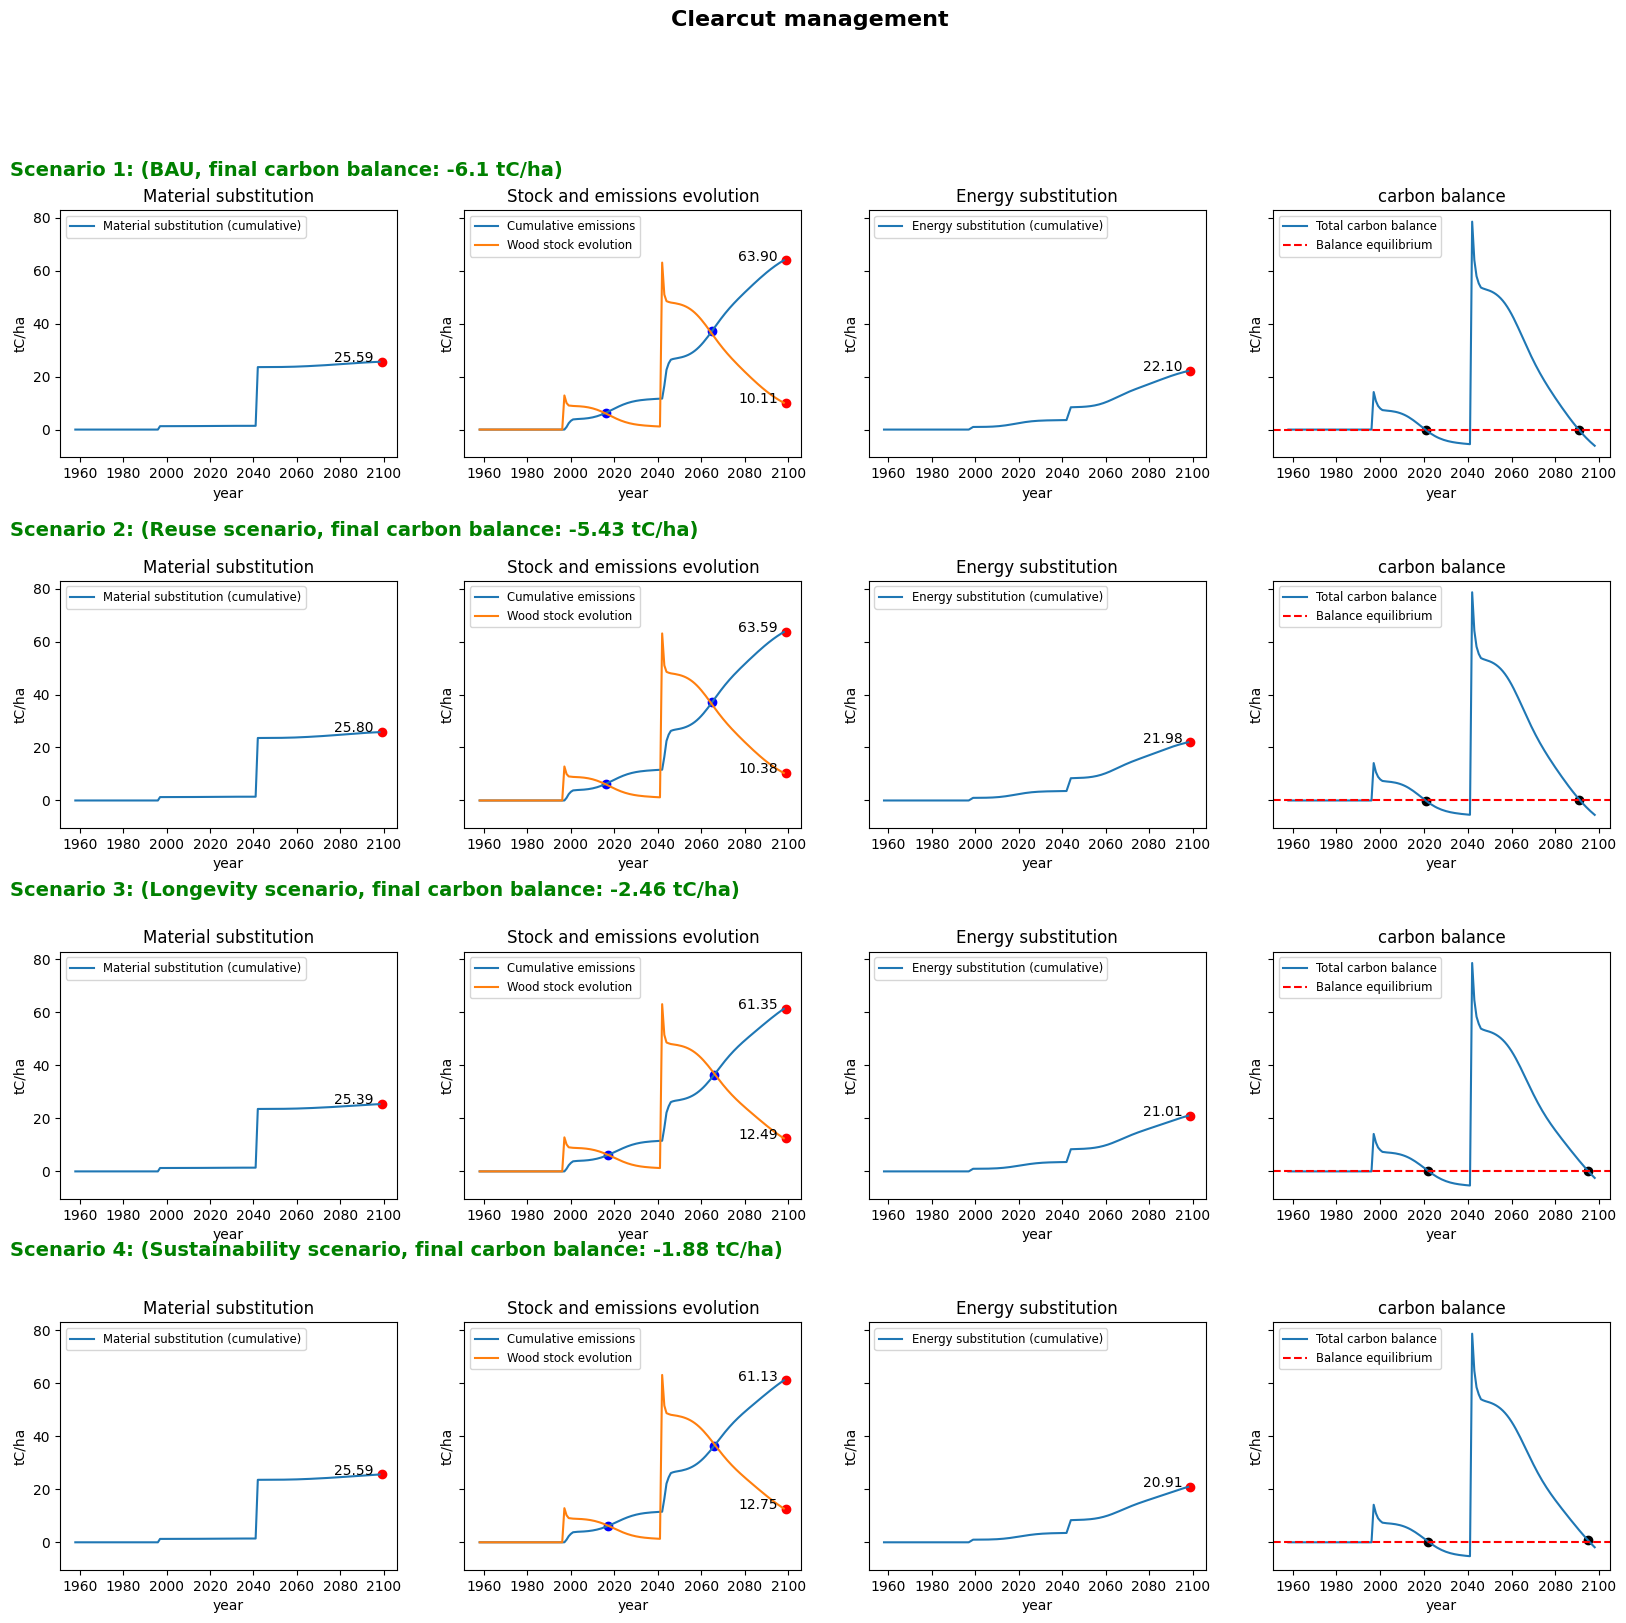

In [ ]:
# Create a figure and 16 subplots (4 for each dataframe)
fig, axes = plt.subplots(4, 4, figsize=(20, 20), sharey=True)

# Titles for each row
row_titles = [
    "Scenario 1: (BAU, final carbon balance: -6.1 tC/ha)",
    "Scenario 2: (Reuse scenario, final carbon balance: -5.43 tC/ha)",
    "Scenario 3: (Longevity scenario, final carbon balance: -2.46 tC/ha)",
    "Scenario 4: (Sustainability scenario, final carbon balance: -1.88 tC/ha)"
]

# Loop over dataframes and corresponding subplots
for i, (df, ax_row, row_title) in enumerate(zip(dataframes1, axes, row_titles)):
    # Set the row title using fig.text
    fig.text(0.1, 0.9 - i * 0.18, row_title, fontsize=14, ha='left', va='center', color='green', weight='bold')

    for j, ax in enumerate(ax_row):
        # Determine the type of plot to be shown in each column
        if j % 4 == 0:
            ax.plot(list(range(1958, 2099)), df['C_MSUB'], label="Material substitution (cumulative)")
            ax.scatter(2099, df['C_MSUB'].iloc[-1], color='red')  # Highlight the last value
            ax.annotate(f"{df['C_MSUB'].iloc[-1]:.2f}", (2099, df['C_MSUB'].iloc[-1]), textcoords="offset points", xytext=(-20, 0), ha='center')
            ax.set_title('Material substitution')  # You can customize the title as needed
            ax.set_xlabel('year')
            ax.set_ylabel('tC/ha')
            ax.legend(loc='upper left', fontsize='small')
        elif j % 4 == 1:
            ax.plot(list(range(1958, 2099)), df['C_Emissions'], label="Cumulative emissions")
            ax.plot(list(range(1958, 2099)), df['C_Stock'], label="Wood stock evolution")
            ax.scatter(2099, df['C_Emissions'].iloc[-1], color='red')  # Highlight the last value
            ax.scatter(2099, df['C_Stock'].iloc[-1], color='red')  # Highlight the last value
            if i<2:
              ax.scatter(2016, df['C_Emissions'].iloc[58], color='blue')
              ax.scatter(2065, df['C_Emissions'].iloc[107], color='blue')

            else:
              ax.scatter(2017, df['C_Emissions'].iloc[59], color='blue')
              ax.scatter(2066, df['C_Emissions'].iloc[108], color='blue')

            ax.annotate(f"{df['C_Emissions'].iloc[-1]:.2f}", (2099, df['C_Emissions'].iloc[-1]), textcoords="offset points", xytext=(-20, 0), ha='center')
            ax.annotate(f"{df['C_Stock'].iloc[-1]:.2f}", (2099, df['C_Stock'].iloc[-1]), textcoords="offset points", xytext=(-20, 0), ha='center')
            ax.set_title('Stock and emissions evolution')  # You can customize the title as needed
            ax.set_xlabel('year')
            ax.set_ylabel('tC/ha')
            ax.legend(loc='upper left', fontsize='small')

        elif j % 4 == 2:
            ax.plot(list(range(1958, 2099)), df['C_ESUB'], label='Energy substitution (cumulative)')
            ax.scatter(2099, df['C_ESUB'].iloc[-1], color='red')  # Highlight the last value
            ax.annotate(f"{df['C_ESUB'].iloc[-1]:.2f}", (2099, df['C_ESUB'].iloc[-1]), textcoords="offset points", xytext=(-20, 0), ha='center')
            ax.set_title('Energy substitution')  # You can customize the title as needed
            ax.set_xlabel('year')
            ax.set_ylabel('tC/ha')
            ax.legend(loc='upper left', fontsize='small')
        elif j % 4 == 3:
            ax.plot(list(range(1958, 2099)), df['balance'], label='Total carbon balance')
            ax.axhline(y=0, color='red', linestyle='--', label='Balance equilibrium')
            if i<2:
              ax.scatter(2021, df['balance'].iloc[63], color='black')
              ax.scatter(2091, df['balance'].iloc[133], color='black')

            else:
              ax.scatter(2022, df['balance'].iloc[64], color='black')
              ax.scatter(2095, df['balance'].iloc[137], color='black')
            #ax.scatter(142, df['C_ESUB'].iloc[-1], color='red')  # Highlight the last value
            #ax.annotate(f"{df['C_ESUB'].iloc[-1]:.2f}", (142, df['C_ESUB'].iloc[-1]), textcoords="offset points", xytext=(-20, 0), ha='center')
            ax.set_title('carbon balance')  # You can customize the title as needed
            ax.set_xlabel('year')
            ax.set_ylabel('tC/ha')
            ax.legend(loc='upper left', fontsize='small')

# Adjust the subplot layout
plt.subplots_adjust(bottom=0.2, hspace=0.5)
fig.suptitle("Clearcut management", fontsize=16, weight='bold')
plt.savefig("CC_latest_year.png")
# Return the figure
plt.show()


#Search for the equilibrium values

In [ ]:
# Define a tolerance level (adjust as needed)
tolerance = 0.4

# Find values of 'time' when 'stock' and 'emissions' are approximately equal
equal_time_values = sim_cc_RRLS10.index[np.isclose(sim_cc_RRLS10['balance'], 0, atol=tolerance)]
equal_time_values

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
             13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
             26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
             64, 138],
           dtype='int64')

In [ ]:
sim_cc_RR10.index

RangeIndex(start=0, stop=141, step=1)

In [ ]:
sim_sw_BAU = run_model(scale = 20.33, shape= 5.65, class_width = 1 , tolerance_g = 0.3, a1 = 0.6626, a2 = 0.8769, b1= 0.9712, b2 = -0.2774, b3 = 1.1107, b4 = 26.4390,
          a = 0.7, c = 1, alpha = 0.04, beta = 2.10, tolerance_hfind = 0.0001, efficiency = efficiency , loss_allocation = loss_allocation , recycling = recycling_BAU,
          substitution_matrix = substitution_matrix, decay = decay, PH = 141, R = 0, management_dic = management_shelter)

In [ ]:
sim_sw_BAU['balance'] = sim_sw_BAU["C_Stock"] + sim_sw_BAU["C_ESUB"] + sim_sw_BAU["C_MSUB"] - sim_sw_BAU["C_Emissions"]

In [ ]:
sim_sw_RR10 = run_model(scale = 20.33, shape= 5.65, class_width = 1 , tolerance_g = 0.3, a1 = 0.6626, a2 = 0.8769, b1= 0.9712, b2 = -0.2774, b3 = 1.1107, b4 = 26.4390,
          a = 0.7, c = 1, alpha = 0.04, beta = 2.10, tolerance_hfind = 0.0001, efficiency = efficiency , loss_allocation = loss_allocation , recycling = recycling_RR10,
          substitution_matrix = substitution_matrix, decay = decay, PH = 141, R = 0, management_dic = management_shelter)

In [ ]:
sim_sw_RR10['balance'] = sim_sw_RR10["C_Stock"] + sim_sw_RR10["C_ESUB"] + sim_sw_RR10["C_MSUB"] - sim_sw_RR10["C_Emissions"]

In [ ]:
sim_sw_LS10 = run_model(scale = 20.33, shape= 5.65, class_width = 1 , tolerance_g = 0.3, a1 = 0.6626, a2 = 0.8769, b1= 0.9712, b2 = -0.2774, b3 = 1.1107, b4 = 26.4390,
          a = 0.7, c = 1, alpha = 0.04, beta = 2.10, tolerance_hfind = 0.0001, efficiency = efficiency , loss_allocation = loss_allocation , recycling = recycling_LS10,
          substitution_matrix = substitution_matrix, decay = decay, PH = 141, R = 0, management_dic = management_shelter)

In [ ]:
sim_sw_LS10['balance'] = sim_sw_LS10["C_Stock"] + sim_sw_LS10["C_ESUB"] + sim_sw_LS10["C_MSUB"] - sim_sw_LS10["C_Emissions"]

In [ ]:
sim_sw_RRLS10 = run_model(scale = 20.33, shape= 5.65, class_width = 1 , tolerance_g = 0.3, a1 = 0.6626, a2 = 0.8769, b1= 0.9712, b2 = -0.2774, b3 = 1.1107, b4 = 26.4390,
          a = 0.7, c = 1, alpha = 0.04, beta = 2.10, tolerance_hfind = 0.0001, efficiency = efficiency , loss_allocation = loss_allocation , recycling = recycling_RRLS10,
          substitution_matrix = substitution_matrix, decay = decay, PH = 141, R = 0, management_dic = management_shelter)

In [ ]:
sim_sw_RRLS10['balance'] = sim_sw_RRLS10["C_Stock"] + sim_sw_RRLS10["C_ESUB"] + sim_sw_RRLS10["C_MSUB"] - sim_sw_RRLS10["C_Emissions"]

In [ ]:
dataframes2 = [sim_sw_BAU, sim_sw_RR10, sim_sw_LS10, sim_sw_RRLS10]

In [ ]:
sim_sw_RRLS10.to_excel("sim_sw_RRLS10.xlsx")

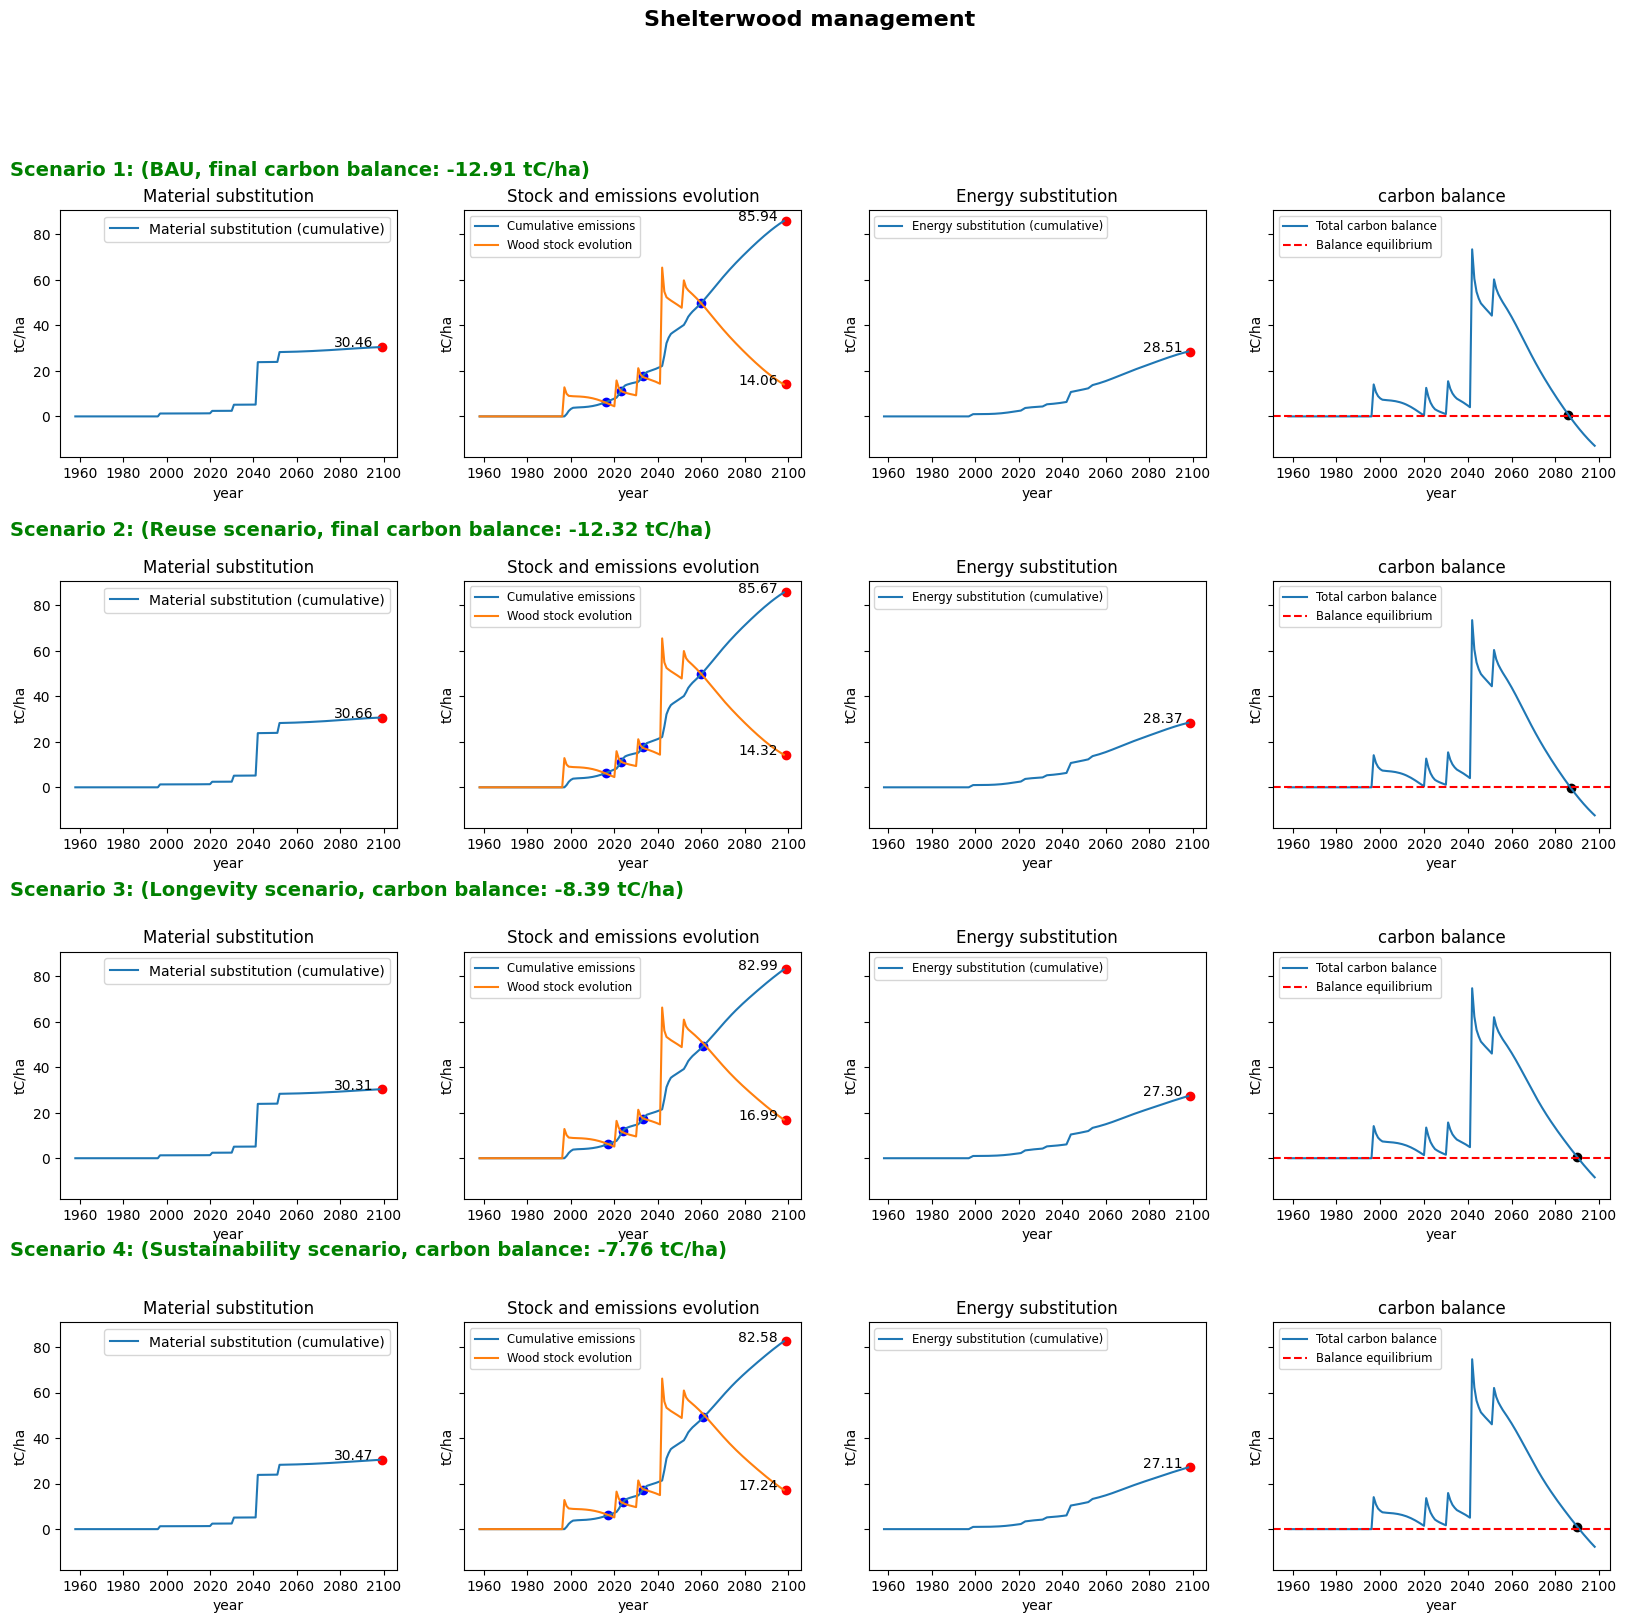

In [ ]:
# Create a figure and 16 subplots (4 for each dataframe)
fig, axes = plt.subplots(4, 4, figsize=(20, 20), sharey=True)

# Titles for each row
row_titles = [
    "Scenario 1: (BAU, final carbon balance: -12.91 tC/ha)",
    "Scenario 2: (Reuse scenario, final carbon balance: -12.32 tC/ha)",
    "Scenario 3: (Longevity scenario, carbon balance: -8.39 tC/ha)",
    "Scenario 4: (Sustainability scenario, carbon balance: -7.76 tC/ha)"
]

# Loop over dataframes and corresponding subplots
for i, (df, ax_row, row_title) in enumerate(zip(dataframes2, axes, row_titles)):
    # Set the row title using fig.text
    fig.text(0.1, 0.9 - i * 0.18, row_title, fontsize=14, ha='left', va='center', color='green', weight='bold')

    for j, ax in enumerate(ax_row):
        # Determine the type of plot to be shown in each column
        if j % 4 == 0:
            #ax.plot(range(1, 142), df['C_MSUB'], label="Material substitution (cumulative)")
            ax.plot(list(range(1958, 2099)), df['C_MSUB'], label="Material substitution (cumulative)")
            ax.scatter(2099, df['C_MSUB'].iloc[-1], color='red')  # Highlight the last value
            ax.annotate(f"{df['C_MSUB'].iloc[-1]:.2f}", (2099, df['C_MSUB'].iloc[-1]), textcoords="offset points", xytext=(-20, 0), ha='center')
            ax.set_title('Material substitution')  # You can customize the title as needed
            ax.set_xlabel('year')
            ax.set_ylabel('tC/ha')
            ax.legend()
        elif j % 4 == 1:
            #ax.plot(range(1, 142), df['C_Emissions'], label="Cumulative emissions")
            #ax.plot(range(1, 142), df['C_Stock'], label="Wood stock evolution")
            ax.plot(list(range(1958, 2099)), df['C_Emissions'], label="Cumulative emissions")
            ax.plot(list(range(1958, 2099)), df['C_Stock'], label="Wood stock evolution")
            ax.scatter(2099, df['C_Emissions'].iloc[-1], color='red')  # Highlight the last value
            ax.scatter(2099, df['C_Stock'].iloc[-1], color='red')  # Highlight the last value
            if i<2:
              #ax.scatter(59, df['C_Emissions'].iloc[58], color='blue')
              ax.scatter(2016, df['C_Emissions'].iloc[58], color='blue')
              #ax.scatter(66, df['C_Emissions'].iloc[65], color='blue')
              ax.scatter(2023, df['C_Emissions'].iloc[65], color='blue')
              #ax.scatter(76, df['C_Emissions'].iloc[75], color='blue')
              ax.scatter(2033, df['C_Emissions'].iloc[75], color='blue')
              #ax.scatter(103, df['C_Emissions'].iloc[102], color='blue')
              ax.scatter(2060, df['C_Emissions'].iloc[102], color='blue')


            else:
              #ax.scatter(60, df['C_Emissions'].iloc[59], color='blue')
              ax.scatter(2017, df['C_Emissions'].iloc[59], color='blue')
              #ax.scatter(67, df['C_Emissions'].iloc[66], color='blue')
              ax.scatter(2024, df['C_Emissions'].iloc[66], color='blue')
              #ax.scatter(76, df['C_Emissions'].iloc[75], color='blue')
              ax.scatter(2033, df['C_Emissions'].iloc[75], color='blue')
              #ax.scatter(104, df['C_Emissions'].iloc[103], color='blue')
              ax.scatter(2061, df['C_Emissions'].iloc[103], color='blue')
            ax.annotate(f"{df['C_Emissions'].iloc[-1]:.2f}", (2099, df['C_Emissions'].iloc[-1]), textcoords="offset points", xytext=(-20, 0), ha='center')
            ax.annotate(f"{df['C_Stock'].iloc[-1]:.2f}", (2099, df['C_Stock'].iloc[-1]), textcoords="offset points", xytext=(-20, 0), ha='center')
            ax.set_title('Stock and emissions evolution')  # You can customize the title as needed
            ax.set_xlabel('year')
            ax.set_ylabel('tC/ha')
            ax.legend(loc='upper left', fontsize='small')
        elif j % 4 == 2:
            ax.plot(list(range(1958, 2099)), df['C_ESUB'], label='Energy substitution (cumulative)')
            ax.scatter(2099, df['C_ESUB'].iloc[-1], color='red')  # Highlight the last value
            ax.annotate(f"{df['C_ESUB'].iloc[-1]:.2f}", (2099, df['C_ESUB'].iloc[-1]), textcoords="offset points", xytext=(-20, 0), ha='center')
            ax.set_title('Energy substitution')  # You can customize the title as needed
            ax.set_xlabel('year')
            ax.set_ylabel('tC/ha')
            ax.legend(loc='upper left', fontsize='small')
        elif j % 4 == 3:
            ax.plot(list(range(1958, 2099)), df['balance'], label='Total carbon balance')
            ax.axhline(y=0, color='red', linestyle='--', label='Balance equilibrium')
            if i==0:
              ax.scatter(2086, df['balance'].iloc[128], color='black')
            elif i == 1:
                ax.scatter(2087, df['balance'].iloc[129], color='black')

            else:
              ax.scatter(2090, df['balance'].iloc[132], color='black')
            #ax.scatter(142, df['C_ESUB'].iloc[-1], color='red')  # Highlight the last value
            #ax.annotate(f"{df['C_ESUB'].iloc[-1]:.2f}", (142, df['C_ESUB'].iloc[-1]), textcoords="offset points", xytext=(-20, 0), ha='center')
            ax.set_title('carbon balance')  # You can customize the title as needed
            ax.set_xlabel('year')
            ax.set_ylabel('tC/ha')
            ax.legend(loc='upper left', fontsize='small')

# Adjust the subplot layout
plt.subplots_adjust(bottom=0.2, hspace=0.5)
fig.suptitle("Shelterwood management", fontsize=16, weight='bold')
plt.savefig("shelter_latest_year.png")
# Return the figure
plt.show()


In [ ]:
# Define a tolerance level (adjust as needed)
tolerance = 0.65

# Find values of 'time' when 'stock' and 'emissions' are approximately equal
equal_time_values = sim_sw_RRLS10.index[np.isclose(sim_sw_BAU['balance'], 0, atol=tolerance)]
equal_time_values

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
             13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
             26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
             62, 128],
           dtype='int64')